In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from scipy.stats import norm, skew, probplot
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, RandomizedSearchCV
from sklearn.linear_model import Ridge, Lasso, ElasticNet, RidgeCV, LassoCV, ElasticNetCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_validate
import time

from sklearn.model_selection import cross_validate, cross_val_predict
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LassoCV
from sklearn.ensemble import HistGradientBoostingRegressor

from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC, SVR

from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

# Lasso

In [2]:
#from Box_cox_test import X1_test, Y_test
housing = pd.read_csv("~/Desktop/Python_Machine_Learning_Project/ML_Kaggle_Project/housing_new.csv")
train =housing.iloc[:,1:]
train

,SalePrice,PID,GrLivArea,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,Electrical__FuseP,Electrical__None,Electrical__SBrkr,GarageFinish__No Garage,GarageFinish__RFn,GarageFinish__Unf,Fence__GdWo,Fence__MnPrv,Fence__MnWw,Fence__No Fence
0,126000,909176150,856,30,0,60.0,7890,1,-0.1,0,...,0,0,1,0,0,1,0,0,0,1
1,139500,905476230,1049,120,0,42.0,4235,1,-0.1,0,...,0,0,1,0,0,0,0,0,0,1
2,124900,911128020,1001,30,0,60.0,6060,1,-0.1,0,...,0,0,1,0,0,1,0,0,0,1
3,114000,535377150,1039,70,0,80.0,8146,1,-0.1,0,...,0,0,1,0,0,1,0,0,0,1
4,227000,534177230,1665,60,0,70.0,8400,1,-0.1,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6789,196500,908128100,1724,60,0,62.0,7162,1,-0.1,0,...,0,0,1,0,0,0,0,0,0,1
6790,139600,905402060,1733,20,0,60.0,13680,1,-0.1,1,...,0,0,0,0,0,1,0,0,0,1
6791,145000,909275030,2002,90,0,82.0,6270,1,-0.1,0,...,0,0,0,0,0,1,0,0,0,1
6792,217500,907192040,1842,60,0,60.0,8826,1,-0.1,0,...,0,0,1,0,0,0,0,0,0,1


In [3]:
# rm_cols = ['MSZoning_RL', 'YearRemodAdd', 'TotalBsmtSF', 'LotFrontage']
# X1.drop(rm_cols, axis = 1, inplace = True)
from sklearn.model_selection import train_test_split
X = housing.iloc[:,2:]
# Fit the data against the log og the price
Y = np.log(housing["SalePrice"]+1)
y=Y
ols = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X,np.log(housing["SalePrice"]+1), test_size=0.5, random_state=32)


In [4]:
# X1_test.drop(rm_cols, axis = 1, inplace = True)


In [5]:
scaler = StandardScaler().fit(X_train)
features = scaler.transform(X_train)
X1_std = pd.DataFrame(features, columns = X_train.columns)

In [6]:
scaler = StandardScaler().fit(X_test)
features = scaler.transform(X_test)
X1_std_test = pd.DataFrame(features, columns = X_train.columns)

In [7]:
alphas = np.logspace(10,-2,500)

alphas

lassocv = LassoCV(alphas = alphas, random_state=0)
lassocv.fit(X1_std, y_train)


LassoCV(alphas=array([1.00000000e+10, 9.46132376e+09, 8.95166472e+09, 8.46945981e+09,
       8.01323013e+09, 7.58157646e+09, 7.17317494e+09, 6.78677305e+09,
       6.42118571e+09, 6.07529169e+09, 5.74803016e+09, 5.43839743e+09,
       5.14544388e+09, 4.86827104e+09, 4.60602884e+09, 4.35791301e+09,
       4.12316259e+09, 3.90105762e+09, 3.69091691e+09, 3.49209598e+09,
       3.30398507e+09, 3.12600724e+0...
       3.57360225e-02, 3.38110078e-02, 3.19896892e-02, 3.02664806e-02,
       2.86360972e-02, 2.70935387e-02, 2.56340741e-02, 2.42532274e-02,
       2.29467637e-02, 2.17106760e-02, 2.05411735e-02, 1.94346693e-02,
       1.83877698e-02, 1.73972643e-02, 1.64601150e-02, 1.55734477e-02,
       1.47345431e-02, 1.39408283e-02, 1.31898690e-02, 1.24793621e-02,
       1.18071285e-02, 1.11711065e-02, 1.05693455e-02, 1.00000000e-02]),
        random_state=0)

In [8]:
lassocv.score(X1_std,y_train)

0.9332065581009356

In [9]:
lassocv_alpha = lassocv.alpha_

In [10]:
lassocv_alpha

0.01

In [11]:
las = Lasso(alpha = lassocv.alpha_, random_state = 0)
las.fit(X1_std,y_train)

Lasso(alpha=0.01, random_state=0)

In [12]:
print('Score for training data:', las.score(X1_std,y_train))

pred = las.predict(X1_std)
RMSE = mean_squared_error(y_train, pred, squared = False)
print('RMSE for training data is:', RMSE)

Score for training data: 0.9332065581009356
RMSE for training data is: 0.10715233979337471


In [13]:
print('Score for test data:', las.score(X1_std_test,y_test))

pred = las.predict(X1_std_test)
RMSE = mean_squared_error(y_test, pred, squared = False)
print('RMSE for test data is:', RMSE)

Score for test data: 0.940294085515858
RMSE for test data is: 0.09909210212494007


In [14]:
lasso_score = las.score(X1_std_test,y_test)
lasso_rmse = mean_squared_error(y_test, pred, squared = False)

In [15]:
import pickle
Pkl_Filename = "Pickle_lasso.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(las, file)

# Decision Tree

In [16]:
# Initializing Decision Tree
tree_reg = DecisionTreeRegressor()
tree = tree_reg.fit(X_train, y_train)

In [17]:
# Predicting Price/Sqft
Y_pred = tree_reg.predict(X_train)

# Printing error and score of overfit decision tree model
RMSE = np.sqrt(mean_squared_error(y_train,Y_pred))
print(RMSE)
R2 = tree_reg.score(X_test,y_test)
print(R2)

4.733475061535865e-15
0.9400306749806733


In [18]:
# Calculating cross validation scores
scores = cross_validate(tree_reg, X_train, y_train, cv = 20, scoring = ('r2','neg_mean_squared_error'))
scores

{'fit_time': array([0.04975605, 0.04554319, 0.045964  , 0.04338193, 0.04138327,
        0.04212594, 0.04169703, 0.04135585, 0.04244995, 0.04182005,
        0.04271984, 0.04235768, 0.04189801, 0.04176474, 0.04281807,
        0.04280806, 0.04241395, 0.04388404, 0.04395986, 0.04175615]),
 'score_time': array([0.00186992, 0.00156784, 0.00145698, 0.0013721 , 0.00135684,
        0.00136304, 0.00138092, 0.0014751 , 0.00133705, 0.00134087,
        0.00134921, 0.00133228, 0.00134206, 0.00133419, 0.00133777,
        0.00135994, 0.00133419, 0.00132704, 0.00133014, 0.00135303]),
 'test_r2': array([0.93633478, 0.91420819, 0.91829251, 0.93652979, 0.92768445,
        0.93750687, 0.95838332, 0.94199766, 0.92805089, 0.9540625 ,
        0.93281225, 0.9504479 , 0.93575278, 0.92120862, 0.94108788,
        0.88248873, 0.96098359, 0.93950523, 0.94525137, 0.95694157]),
 'test_neg_mean_squared_error': array([-0.01214166, -0.01535414, -0.01226472, -0.01294168, -0.01021259,
        -0.00961246, -0.00735996, -0.

In [19]:
np.linspace(start=2, stop=30, num=15, dtype=int)

array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])

In [20]:
# Gridsearch with cross valiadation

grid_para_tree = [{
    "min_samples_leaf": range(1,16),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}]
tree_reg.set_params(random_state=108)
grid_search_tree = GridSearchCV(
    tree_reg, grid_para_tree, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

%time grid_search_tree.fit(X_train, y_train)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


CPU times: user 1.3 s, sys: 447 ms, total: 1.75 s
Wall time: 8.39 s


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=108), n_jobs=-1,
             param_grid=[{'min_samples_leaf': range(1, 16),
                          'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30])}],
             scoring='neg_mean_squared_error')

In [21]:
# RETURNS a DATA FRAME BUT DOES NOT FIT BEST ESTIMATE BACK TO DATA. 
# CANT BE RUN WITH refit = True because there are two scoring methods, and it does not know which one to use.

parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tuning_model = GridSearchCV(tree_reg, param_grid = parameters,
                            scoring = ['r2', 'neg_mean_squared_error'], refit = False, cv = 3, verbose = 3)


tuning_model.fit(X_train, y_train)

Results = pd.DataFrame(tuning_model.cv_results_)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.095) r2: (test=0.450) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.091) r2: (test=0.465) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.090) r2: (test=0.482) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.106) r2: (test=0.381) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.104) r2: (test=0.384) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.110) r2: (test=0.367) total time= 

[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.095) r2: (test=0.450) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.091) r2: (test=0.465) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.090) r2: (test=0.482) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.106) r2: (test=0.381) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.104) r2: (test=0.384) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.110) r2: (test=0.367) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=3, split

[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.110) r2: (test=0.367) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.095) r2: (test=0.450) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.091) r2: (test=0.465) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.090) r2: (test=0.482) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.106) r2: (test=0.381) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.104) r2: (test=0.384) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=4, split

[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.110) r2: (test=0.367) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.095) r2: (test=0.450) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.091) r2: (test=0.465) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.090) r2: (test=0.482) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.106) r2: (test=0.381) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.104) r2: (test=0.384) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=6, split

[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-0.110) r2: (test=0.367) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.095) r2: (test=0.450) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.091) r2: (test=0.465) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.090) r2: (test=0.482) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.106) r2: (test=0.381) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.104) r2: (test=0.384) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=8, split

[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.104) r2: (test=0.384) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.110) r2: (test=0.367) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.095) r2: (test=0.450) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.091) r2: (test=0.465) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.090) r2: (test=0.482) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.106) r2: (test=0.381) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, 

[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.104) r2: (test=0.384) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.110) r2: (test=0.367) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.095) r2: (test=0.450) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.091) r2: (test=0.465) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.090) r2: (test=0.482) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.106) r2: (test=0.381) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=2, split

[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.104) r2: (test=0.384) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.110) r2: (test=0.367) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.095) r2: (test=0.450) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.091) r2: (test=0.465) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.090) r2: (test=0.482) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.106) r2: (test=0.381) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=4, split

[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.104) r2: (test=0.384) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.110) r2: (test=0.367) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.095) r2: (test=0.450) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.091) r2: (test=0.465) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.090) r2: (test=0.482) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.106) r2: (test=0.381) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=90, min_samples_leaf=6, split

[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.031) r2: (test=0.817) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.817) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.048) r2: (test=0.720) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.038) r2: (test=0.777) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.053) r2: (test=0.698) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.039) r2: (test=0.773) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples

[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.048) r2: (test=0.722) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.725) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.733) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.039) r2: (test=0.773) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.031) r2: (test=0.817) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.817) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=7, split

[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.031) r2: (test=0.817) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.817) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.048) r2: (test=0.722) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.725) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.733) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.039) r2: (test=0.773) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=9, split

[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.047) r2: (test=0.727) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.039) r2: (test=0.773) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.031) r2: (test=0.817) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.817) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.048) r2: (test=0.722) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.725) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=10,

[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.031) r2: (test=0.817) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.817) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.048) r2: (test=0.722) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.725) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.733) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.039) r2: (test=0.773) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=2, split

[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.048) r2: (test=0.722) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.725) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.733) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.039) r2: (test=0.773) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.031) r2: (test=0.817) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.817) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=3, split

[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.031) r2: (test=0.817) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.817) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.048) r2: (test=0.722) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.725) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.733) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.039) r2: (test=0.773) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=5, split

[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.031) r2: (test=0.817) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.817) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.048) r2: (test=0.722) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.725) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.733) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.039) r2: (test=0.773) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=7, split

[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.817) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.048) r2: (test=0.722) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.725) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.046) r2: (test=0.733) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.039) r2: (test=0.773) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.031) r2: (test=0.817) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=9, split

[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.021) r2: (test=0.875) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.896) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.831) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.843) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples

[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.839) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-0.040) r2: (test=0.770) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-0.038) r2: (test=0.778) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-0.039) r2: (test=0.776) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.812) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.836) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=8, split

[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.021) r2: (test=0.882) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.842) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.854) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=6, splitter=random; neg_mean_squared_error: (test=-0.030) r2: (test=0.830) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.023) r2: (test=0.864) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, splitter=best; neg_mean_squared_error: (test=-0.020) r2: (test=0.882) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=7, split

[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.893) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.844) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.854) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=5, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.021) r2: (test=0.879) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=6, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.900) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=6, split

[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.026) r2: (test=0.849) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.024) r2: (test=0.856) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=4, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.020) r2: (test=0.881) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=5, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=5, split

[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.026) r2: (test=0.849) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.024) r2: (test=0.855) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=3, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.021) r2: (test=0.879) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.901) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=4, split

[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.901) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.893) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.026) r2: (test=0.850) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.024) r2: (test=0.856) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=best; neg_mean_squared_error: (test=-0.021) r2: (test=0.880) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, split

[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.020) r2: (test=0.882) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.901) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.026) r2: (test=0.850) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.854) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=2, split

[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.021) r2: (test=0.880) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.896) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.843) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.024) r2: (test=0.857) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.028) r2: (test=0.838) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=1,

[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.020) r2: (test=0.883) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.895) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.893) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.843) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.864) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=9, split

[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.022) r2: (test=0.875) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.896) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.027) r2: (test=0.843) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.864) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.834) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=9, split

[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.933) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.933) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.919) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.902) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples

[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.039) r2: (test=0.776) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.812) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.836) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.839) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.040) r2: (test=0.770) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.038) r2: (test=0.778) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=10,

[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.890) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.912) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.905) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.021) r2: (test=0.877) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.882) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.022) r2: (test=0.875) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=2, split

[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.925) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.916) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.886) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.018) r2: (test=0.896) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.884) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=2, split

[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.016) r2: (test=0.908) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.928) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.923) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.900) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.888) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=2, split

[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.913) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.932) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.924) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.906) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.899) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.891) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=2, split

[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.931) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.888) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.909) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.914) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.935) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=1, s

[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.904) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.016) r2: (test=0.907) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.931) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.931) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.888) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=10, 

[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.909) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.914) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.935) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.922) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.902) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=1, spl

[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.904) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.889) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.016) r2: (test=0.907) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.931) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.931) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.888) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=10, 

[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.935) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.910) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.924) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.908) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.916) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.934) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_sampl

[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.836) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.839) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.040) r2: (test=0.770) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.038) r2: (test=0.778) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.039) r2: (test=0.776) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.812) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=9, split

[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.021) r2: (test=0.882) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.833) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.850) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.835) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.022) r2: (test=0.871) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.020) r2: (test=0.883) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=9, split

[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.016) r2: (test=0.907) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.869) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.021) r2: (test=0.876) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.869) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.018) r2: (test=0.895) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.909) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=9, split

[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-0.018) r2: (test=0.895) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=7, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.888) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.900) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.921) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=8, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.921) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.883) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=8, split

[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.018) r2: (test=0.895) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.906) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.018) r2: (test=0.894) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.913) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.930) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.929) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=9, split

[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=8, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.901) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.917) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.934) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.928) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.018) r2: (test=0.896) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.915) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, split

[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.917) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.904) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.918) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.934) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.932) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.903) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, 

[CV 1/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.903) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.918) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.905) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.924) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.939) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.923) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, sp

[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.907) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.917) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.907) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.929) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.930) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.922) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_sample

[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.903) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.920) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.012) r2: (test=0.930) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.919) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.933) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.935) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, m

[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.039) r2: (test=0.776) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.812) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.836) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.839) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.040) r2: (test=0.770) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.038) r2: (test=0.778) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_l

[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.021) r2: (test=0.882) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.029) r2: (test=0.830) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.851) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.028) r2: (test=0.841) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.890) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.912) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_le

[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.016) r2: (test=0.907) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.022) r2: (test=0.869) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.021) r2: (test=0.879) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.870) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.016) r2: (test=0.907) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.925) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_le

[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.016) r2: (test=0.909) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.921) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.923) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.882) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.897) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.021) r2: (test=0.882) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_

[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.914) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.930) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.929) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.890) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.909) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.890) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=1

[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.900) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.915) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.934) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.929) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.018) r2: (test=0.895) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.912) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_l

[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.915) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.902) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.926) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.938) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.922) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.917) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf

[CV 2/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.915) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.905) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.927) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.940) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.924) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.917) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf

[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.917) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.016) r2: (test=0.908) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.928) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.927) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.919) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.923) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_sa

[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.932) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.935) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.904) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.013) r2: (test=0.923) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.916) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.812) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min

[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.839) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.040) r2: (test=0.770) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.038) r2: (test=0.778) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.039) r2: (test=0.776) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.032) r2: (test=0.812) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.028) r2: (test=0.836) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf

[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.025) r2: (test=0.851) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.028) r2: (test=0.841) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.019) r2: (test=0.890) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.912) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.017) r2: (test=0.905) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.021) r2: (test=0.877) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf

[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.021) r2: (test=0.879) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.023) r2: (test=0.870) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.016) r2: (test=0.907) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.925) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.916) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.888) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf

[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.921) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.923) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.020) r2: (test=0.882) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.897) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.021) r2: (test=0.882) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.910) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_l

[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.930) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.929) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.890) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.909) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=9, splitter=random; neg_mean_squared_error: (test=-0.019) r2: (test=0.890) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.911) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=

[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.015) r2: (test=0.915) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.934) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=best; neg_mean_squared_error: (test=-0.012) r2: (test=0.929) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.018) r2: (test=0.895) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.015) r2: (test=0.912) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.018) r2: (test=0.897) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_

[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.902) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.926) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.011) r2: (test=0.938) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.014) r2: (test=0.922) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.917) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.919) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=

[CV 3/3] END max_depth=12, max_leaf_nodes=80, min_samples_leaf=10, splitter=random; neg_mean_squared_error: (test=-0.017) r2: (test=0.905) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.927) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.010) r2: (test=0.940) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=1, splitter=best; neg_mean_squared_error: (test=-0.013) r2: (test=0.924) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.917) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=1, splitter=random; neg_mean_squared_error: (test=-0.014) r2: (test=0.917) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=

In [22]:
# Sorting by best r-squared
Results[['mean_test_r2','rank_test_r2']].sort_values(by = 'rank_test_r2')

,mean_test_r2,rank_test_r2
1004,0.934443,1
1204,0.934103,2
1006,0.934017,3
1206,0.933116,4
1208,0.932456,5
...,...,...
91,0.377199,1301
175,0.377199,1301
93,0.377199,1301
177,0.377199,1301


In [23]:
# Sorting by best r-squared with errors
rr = Results[['mean_test_r2','rank_test_r2',
        'mean_test_neg_mean_squared_error',
        'std_test_neg_mean_squared_error',
        'rank_test_neg_mean_squared_error']].sort_values(by = 'rank_test_neg_mean_squared_error')
rr['mean_test_neg_mean_squared_error'] = np.sqrt(-rr['mean_test_neg_mean_squared_error'])

rr

,mean_test_r2,rank_test_r2,mean_test_neg_mean_squared_error,std_test_neg_mean_squared_error,rank_test_neg_mean_squared_error
1004,0.934443,1,0.106132,0.001360,1
1204,0.934103,2,0.106413,0.001133,2
1006,0.934017,3,0.106486,0.001449,3
1206,0.933116,4,0.107199,0.001350,4
1208,0.932456,5,0.107699,0.000391,5
...,...,...,...,...,...
91,0.377199,1301,0.327027,0.002517,1301
175,0.377199,1301,0.327027,0.002517,1301
93,0.377199,1301,0.327027,0.002517,1301
177,0.377199,1301,0.327027,0.002517,1301


In [24]:
# Working grid search and cross validation


parameters={"splitter":["best","random"],
            "max_depth" : [1,3,5,7,9,11,12],
           "min_samples_leaf":[1,2,3,4,5,6,7,8,9,10],
           #"min_weight_fraction_leaf":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9],
           #"max_features":["auto","log2","sqrt",None],
           "max_leaf_nodes":[None,10,20,30,40,50,60,70,80,90] }
tmtm = GridSearchCV(tree_reg, param_grid = parameters,
                            scoring = 'neg_mean_squared_error', cv = 3, verbose = 3, 
                    return_train_score = True)


tmtm.fit(X_train, y_train)

Fitting 3 folds for each of 1400 candidates, totalling 4200 fits
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-0.089, test=-0.095) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-0.090, test=-0.091) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-0.112, test=-0.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-0.105, test=-0.104) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=1, splitter=random;, score=(train=-0.110, test=-0.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=None, min_samples_leaf=2, splitter=best;, score=(train=-0.089, test=-0.0

[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=(train=-0.112, test=-0.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=(train=-0.105, test=-0.104) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=(train=-0.110, test=-0.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.089, test=-0.095) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.090, test=-0.091) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=10, min_samples

[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=10, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-0.112, test=-0.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-0.105, test=-0.104) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-0.110, test=-0.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-0.089, test=-0.095) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-0.090, test=-0.091) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=30, min_sam

[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, splitter=random;, score=(train=-0.112, test=-0.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, splitter=random;, score=(train=-0.105, test=-0.104) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=5, splitter=random;, score=(train=-0.110, test=-0.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=(train=-0.089, test=-0.095) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=(train=-0.090, test=-0.091) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=40, min_samples

[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, splitter=random;, score=(train=-0.112, test=-0.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, splitter=random;, score=(train=-0.105, test=-0.104) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=50, min_samples_leaf=10, splitter=random;, score=(train=-0.110, test=-0.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-0.089, test=-0.095) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-0.090, test=-0.091) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=60, min_sam

[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=(train=-0.112, test=-0.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=(train=-0.105, test=-0.104) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=5, splitter=random;, score=(train=-0.110, test=-0.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=(train=-0.089, test=-0.095) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=(train=-0.090, test=-0.091) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=70, min_samples_leaf=6, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=70, min_samples

[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=best;, score=(train=-0.089, test=-0.095) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=best;, score=(train=-0.090, test=-0.091) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=best;, score=(train=-0.090, test=-0.090) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=random;, score=(train=-0.112, test=-0.106) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=random;, score=(train=-0.105, test=-0.104) total time=   0.0s
[CV 3/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=9, splitter=random;, score=(train=-0.110, test=-0.110) total time=   0.0s
[CV 1/3] END max_depth=1, max_leaf_nodes=80, min_samples_leaf=10, splitter=best;, score=(train=-0.089, test=-0.095) total time=   0.0s
[CV 2/3] END max_depth=1, max_leaf_nodes=80, min_sample

[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=(train=-0.036, test=-0.038) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=(train=-0.049, test=-0.053) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-0.036, test=-0.038) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes

[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=2, splitter=random;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-0.042, test=-0.046) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=10, min_sampl

[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=(train=-0.042, test=-0.046) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=20, min_samples

[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=(train=-0.042, test=-0.046) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=3, splitter=random;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=30, min_samples_leaf=4, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=30, min_samples

[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=6, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=(train=-0.042, test=-0.046) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=40, min_samples

[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=6, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=(train=-0.042, test=-0.046) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=6, splitter=random;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=7, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=7, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=50, min_samples_leaf=7, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=50, min_samples

[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=6, splitter=random;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=6, splitter=random;, score=(train=-0.042, test=-0.046) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=6, splitter=random;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=7, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=7, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=7, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=60, min_samples_leaf=7, splitter=random;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=60, min_sampl

[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=6, splitter=random;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=7, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=7, splitter=random;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=7, splitter=random;, score=(train=-0.042, test=-0.046) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=70, min_samples_leaf=7, splitter=random;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=70, min_sampl

[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=7, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=7, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=7, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=7, splitter=random;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=7, splitter=random;, score=(train=-0.042, test=-0.046) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=7, splitter=random;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=80, min_samples_leaf=8, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=80, min_samples

[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=7, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=7, splitter=random;, score=(train=-0.046, test=-0.048) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=7, splitter=random;, score=(train=-0.042, test=-0.046) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=7, splitter=random;, score=(train=-0.047, test=-0.046) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=best;, score=(train=-0.031, test=-0.039) total time=   0.0s
[CV 2/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=best;, score=(train=-0.031, test=-0.031) total time=   0.0s
[CV 3/3] END max_depth=3, max_leaf_nodes=90, min_samples_leaf=8, splitter=best;, score=(train=-0.028, test=-0.032) total time=   0.0s
[CV 1/3] END max_depth=3, max_leaf_nodes=90, min_samples

[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9, splitter=best;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9, splitter=best;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9, splitter=best;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9, splitter=random;, score=(train=-0.026, test=-0.029) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9, splitter=random;, score=(train=-0.018, test=-0.019) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=9, splitter=random;, score=(train=-0.024, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=None, min_samples_leaf=10, splitter=best;, score=(train=-0.016, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=

[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, splitter=best;, score=(train=-0.028, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, splitter=best;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, splitter=random;, score=(train=-0.035, test=-0.040) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, splitter=random;, score=(train=-0.035, test=-0.038) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=10, min_samples_leaf=10, splitter=random;, score=(train=-0.035, test=-0.039) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=1, splitter=best;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=20, min_s

[CV 3/3] END max_depth=5, max_leaf_nodes=20, min_samples_leaf=10, splitter=random;, score=(train=-0.025, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-0.015, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=best;, score=(train=-0.013, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-0.019, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=30, min_samples_leaf=1, splitter=random;, score=(train=-0.022, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=30, min_samp

[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=1, splitter=best;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-0.019, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=1, splitter=random;, score=(train=-0.022, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-0.015, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=40, min_samples_leaf=2, splitter=best;, score=(train=-0.013, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=40, min_samples

[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=1, splitter=random;, score=(train=-0.022, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=(train=-0.015, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=2, splitter=best;, score=(train=-0.013, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=50, min_samples_leaf=2, splitter=random;, score=(train=-0.022, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=50, min_sampl

[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-0.015, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=best;, score=(train=-0.013, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=2, splitter=random;, score=(train=-0.022, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=60, min_samples_leaf=3, splitter=best;, score=(train=-0.015, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=60, min_samples

[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-0.013, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-0.022, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=(train=-0.015, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=70, min_samples

[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.022, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.015, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=(train=-0.022, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=80, min_sampl

[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-0.019, test=-0.024) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-0.022, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.015, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=5, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.013, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=5, max_leaf_nodes=90, min_samples

[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=(train=-0.013, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=5, splitter=random;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=(train=-0.008, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=(train=-0.006, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=6, splitter=best;, score=(train=-0.006, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=None, min_samples_leaf=6, splitter=random;, score=(train=-0.013, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes

[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=(train=-0.035, test=-0.039) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.028, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=(train=-0.035, test=-0.040) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=(train=-0.035, test=-0.038) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=10, min_samples_leaf=6, splitter=random;, score=(train=-0.035, test=-0.039) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=10, min_sampl

[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=(train=-0.016, test=-0.021) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=(train=-0.022, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=(train=-0.024, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=7, splitter=best;, score=(train=-0.017, test=-0.024) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=7, splitter=best;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=20, min_samples_leaf=7, splitter=best;, score=(train=-0.016, test=-0.021) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=20, min_samples

[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=8, splitter=best;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=8, splitter=best;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=8, splitter=random;, score=(train=-0.017, test=-0.023) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=8, splitter=random;, score=(train=-0.017, test=-0.021) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=8, splitter=random;, score=(train=-0.018, test=-0.023) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=9, splitter=best;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=30, min_samples_leaf=9, splitter=best;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=30, min_samples

[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=9, splitter=random;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=9, splitter=random;, score=(train=-0.016, test=-0.020) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=10, splitter=best;, score=(train=-0.011, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=10, splitter=best;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=10, splitter=best;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-0.015, test=-0.021) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=40, min_samples_leaf=10, splitter=random;, score=(train=-0.014, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=40, min_

[CV 3/3] END max_depth=7, max_leaf_nodes=50, min_samples_leaf=10, splitter=random;, score=(train=-0.015, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-0.008, test=-0.015) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=best;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-0.010, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-0.010, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=60, min_samples_leaf=1, splitter=random;, score=(train=-0.012, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=60, min_samp

[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-0.007, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-0.006, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=2, splitter=best;, score=(train=-0.006, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-0.010, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-0.010, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=2, splitter=random;, score=(train=-0.012, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=70, min_samples_leaf=3, splitter=best;, score=(train=-0.007, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=70, min_samples

[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.009, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.010, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=2, splitter=random;, score=(train=-0.012, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.007, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.006, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=best;, score=(train=-0.006, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=80, min_samples_leaf=3, splitter=random;, score=(train=-0.010, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=80, min_sampl

[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=3, splitter=best;, score=(train=-0.006, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-0.010, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-0.010, test=-0.017) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=3, splitter=random;, score=(train=-0.012, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.007, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.006, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=7, max_leaf_nodes=90, min_samples_leaf=4, splitter=best;, score=(train=-0.006, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=7, max_leaf_nodes=90, min_samples

[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=(train=-0.004, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=(train=-0.003, test=-0.009) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=(train=-0.003, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=(train=-0.006, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=(train=-0.006, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=4, splitter=random;, score=(train=-0.008, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=None, min_samples_leaf=5, splitter=best;, score=(train=-0.004, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=N

[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=5, splitter=best;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=(train=-0.035, test=-0.040) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=(train=-0.035, test=-0.038) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=5, splitter=random;, score=(train=-0.035, test=-0.039) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.028, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=10, min_samples_leaf=6, splitter=best;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=10, min_samples

[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=5, splitter=random;, score=(train=-0.022, test=-0.023) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=5, splitter=random;, score=(train=-0.024, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=(train=-0.017, test=-0.024) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=6, splitter=best;, score=(train=-0.016, test=-0.021) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=(train=-0.023, test=-0.029) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=20, min_samples_leaf=6, splitter=random;, score=(train=-0.022, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=20, min_sampl

[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=7, splitter=best;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=(train=-0.017, test=-0.023) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=7, splitter=random;, score=(train=-0.018, test=-0.022) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=8, splitter=best;, score=(train=-0.012, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=8, splitter=best;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=30, min_samples_leaf=8, splitter=best;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=30, min_samples

[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=8, splitter=random;, score=(train=-0.014, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=8, splitter=random;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=8, splitter=random;, score=(train=-0.015, test=-0.021) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=9, splitter=best;, score=(train=-0.010, test=-0.015) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=9, splitter=best;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=9, splitter=best;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=40, min_samples_leaf=9, splitter=random;, score=(train=-0.014, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=40, min_sampl

[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=8, splitter=random;, score=(train=-0.013, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=(train=-0.008, test=-0.015) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=9, splitter=best;, score=(train=-0.008, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=9, splitter=random;, score=(train=-0.013, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=9, splitter=random;, score=(train=-0.012, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=50, min_samples_leaf=9, splitter=random;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=50, min_sampl

[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=best;, score=(train=-0.008, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=best;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=best;, score=(train=-0.007, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=random;, score=(train=-0.011, test=-0.018) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=random;, score=(train=-0.011, test=-0.014) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=9, splitter=random;, score=(train=-0.012, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=60, min_samples_leaf=10, splitter=best;, score=(train=-0.008, test=-0.015) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=60, min_sample

[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=9, splitter=best;, score=(train=-0.007, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=9, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=(train=-0.010, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=(train=-0.011, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-0.007, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=70, min_sampl

[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-0.004, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 1/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-0.005, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=9, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-0.005, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=9, max_leaf_nodes=90, min_samples

[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.002, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.002, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.002, test=-0.011) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-0.003, test=-0.012) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-0.003, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-0.004, test=-0.011) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=None, min_samples_leaf=4, splitter=best;, score=(train=-0.002, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf

[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-0.028, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-0.035, test=-0.040) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-0.035, test=-0.038) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-0.035, test=-0.039) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=10, min_samples_leaf=4, splitter=best;, score=(train=-0.028, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=10, min

[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=(train=-0.024, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=(train=-0.017, test=-0.024) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=(train=-0.016, test=-0.021) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=(train=-0.022, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=(train=-0.024, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=20, m

[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=(train=-0.012, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=6, splitter=random;, score=(train=-0.017, test=-0.022) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=6, splitter=random;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=6, splitter=random;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=30, min_samples_leaf=7, splitter=best;, score=(train=-0.012, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=30, min

[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.010, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=7, splitter=random;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=7, splitter=random;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=40, min_samples_leaf=7, splitter=random;, score=(train=-0.014, test=-0.020) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=40, m

[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=7, splitter=best;, score=(train=-0.008, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=7, splitter=random;, score=(train=-0.012, test=-0.018) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=7, splitter=random;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=7, splitter=random;, score=(train=-0.012, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=8, splitter=best;, score=(train=-0.008, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=8, splitter=best;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=50, min_samples_leaf=8, splitter=best;, score=(train=-0.008, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=50, min

[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=7, splitter=random;, score=(train=-0.011, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=7, splitter=random;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=7, splitter=random;, score=(train=-0.011, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=8, splitter=best;, score=(train=-0.007, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=8, splitter=best;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=8, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=60, min_samples_leaf=8, splitter=random;, score=(train=-0.011, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=60, m

[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=9, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=(train=-0.010, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=(train=-0.011, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-0.007, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=70, 

[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-0.004, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-0.006, test=-0.014) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-0.007, test=-0.015) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-0.004, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=11, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-0.004, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=11, max_leaf_nodes=90, min

[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=2, splitter=random;, score=(train=-0.003, test=-0.014) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.002, test=-0.012) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.002, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=best;, score=(train=-0.002, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-0.003, test=-0.013) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-0.003, test=-0.012) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=None, min_samples_leaf=3, splitter=random;, score=(train=-0.004, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=12, max_le

[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=2, splitter=random;, score=(train=-0.035, test=-0.039) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-0.027, test=-0.032) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-0.028, test=-0.028) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=best;, score=(train=-0.025, test=-0.028) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-0.035, test=-0.040) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-0.035, test=-0.038) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=10, min_samples_leaf=3, splitter=random;, score=(train=-0.035, test=-0.039) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=10, m

[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=(train=-0.022, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=3, splitter=random;, score=(train=-0.024, test=-0.029) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=(train=-0.017, test=-0.024) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=4, splitter=best;, score=(train=-0.016, test=-0.021) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=(train=-0.022, test=-0.026) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=20, min_samples_leaf=4, splitter=random;, score=(train=-0.022, test=-0.025) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=20, m

[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=(train=-0.016, test=-0.018) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=5, splitter=random;, score=(train=-0.018, test=-0.021) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=(train=-0.012, test=-0.020) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=(train=-0.013, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=6, splitter=best;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=6, splitter=random;, score=(train=-0.017, test=-0.022) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=30, min_samples_leaf=6, splitter=random;, score=(train=-0.017, test=-0.020) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=30, m

[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=6, splitter=random;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.010, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.010, test=-0.013) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=7, splitter=best;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=7, splitter=random;, score=(train=-0.014, test=-0.019) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=7, splitter=random;, score=(train=-0.014, test=-0.018) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=40, min_samples_leaf=7, splitter=random;, score=(train=-0.014, test=-0.020) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=40, m

[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=7, splitter=random;, score=(train=-0.012, test=-0.018) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=7, splitter=random;, score=(train=-0.012, test=-0.016) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=7, splitter=random;, score=(train=-0.012, test=-0.018) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=best;, score=(train=-0.008, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=best;, score=(train=-0.009, test=-0.012) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=best;, score=(train=-0.008, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=50, min_samples_leaf=8, splitter=random;, score=(train=-0.012, test=-0.018) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=50, m

[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=7, splitter=random;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=7, splitter=random;, score=(train=-0.011, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=8, splitter=best;, score=(train=-0.007, test=-0.016) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=8, splitter=best;, score=(train=-0.008, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=8, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=8, splitter=random;, score=(train=-0.011, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=60, min_samples_leaf=8, splitter=random;, score=(train=-0.011, test=-0.015) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=60, m

[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=9, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=(train=-0.010, test=-0.017) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=(train=-0.010, test=-0.014) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=9, splitter=random;, score=(train=-0.011, test=-0.017) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-0.007, test=-0.011) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=70, min_samples_leaf=10, splitter=best;, score=(train=-0.007, test=-0.012) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=70, 

[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=1, splitter=best;, score=(train=-0.004, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-0.007, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-0.006, test=-0.014) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=1, splitter=random;, score=(train=-0.007, test=-0.015) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-0.004, test=-0.014) total time=   0.0s
[CV 2/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-0.005, test=-0.010) total time=   0.0s
[CV 3/3] END max_depth=12, max_leaf_nodes=90, min_samples_leaf=2, splitter=best;, score=(train=-0.004, test=-0.013) total time=   0.0s
[CV 1/3] END max_depth=12, max_leaf_nodes=90, min

GridSearchCV(cv=3, estimator=DecisionTreeRegressor(random_state=108),
             param_grid={'max_depth': [1, 3, 5, 7, 9, 11, 12],
                         'max_leaf_nodes': [None, 10, 20, 30, 40, 50, 60, 70,
                                            80, 90],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='neg_mean_squared_error',
             verbose=3)

In [25]:
tmtm.best_estimator_

DecisionTreeRegressor(max_depth=11, min_samples_leaf=3, random_state=108)

In [26]:
# Finding best estimator score
tmtm.best_estimator_.score(X_train,y_train)

0.9887596456693337

In [27]:
# Finding best estimator score
tmtm.best_estimator_.score(X_test,y_test)

0.9426050360938026

In [28]:
# Finding most important variables for best model

tmtm.best_params_
feature_list = list(X_train.columns) # Saving feature names for later use
# Get numerical feature importances
importances = list(tmtm.best_estimator_.feature_importances_)

## List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

## Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

## Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: TotalSF              Importance: 0.5497
Variable: OverallQual          Importance: 0.25496
Variable: Price_by_hood        Importance: 0.04819
Variable: GrLivArea_year       Importance: 0.03551
Variable: dist                 Importance: 0.00928
Variable: BsmtQual             Importance: 0.00797
Variable: GarageArea           Importance: 0.00688
Variable: BsmtFinType1         Importance: 0.00622
Variable: CentralAir           Importance: 0.00619
Variable: TotRmsAbvGrd         Importance: 0.00619
Variable: GarageYrBlt          Importance: 0.00495
Variable: bathrm_cnt           Importance: 0.00453
Variable: YearBuilt            Importance: 0.00429
Variable: ScreenPorch          Importance: 0.00429
Variable: BsmtUnfSF            Importance: 0.00379
Variable: patioSF              Importance: 0.00317
Variable: Price_by_month       Importance: 0.00302
Variable: MoSold               Importance: 0.0029
Variable: 1stFlrSF             Importance: 0.00279
Variable: long                 Im

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# RandomForest Model 1

In [29]:
# Parameters 
# min_samples_leaf = 4
# min_samples_split = 4
rf = RandomForestRegressor(bootstrap = True, n_estimators =150, oob_score=True)

params = {"min_samples_leaf": 4,
    "min_samples_split": 4}
rf.set_params = params
rf.fit(X_train,y_train)
rf.score(X_train,y_train) 

0.9961406204933965

In [30]:
rf.score(X_test, y_test)

0.975007866949831

In [31]:
predict = rf.predict(X_train)
RMSE = np.sqrt(mean_squared_error(y_train,predict))
RMSE
rand_rmse = RMSE

In [32]:
rand_score = rf.score(X_test, y_test)





In [33]:
feature_list = list(X_train.columns) # Saving feature names for later use
# Get numerical feature importances
importances = list(rf.feature_importances_)

## List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

## Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

## Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: TotalSF              Importance: 0.55811
Variable: OverallQual          Importance: 0.1867
Variable: Price_by_hood        Importance: 0.0688
Variable: ExterQual            Importance: 0.01782
Variable: GrLivArea_year       Importance: 0.01748
Variable: GrLivArea            Importance: 0.01695
Variable: YearBuilt            Importance: 0.01433
Variable: OverallCond          Importance: 0.01116
Variable: GarageArea           Importance: 0.01003
Variable: YearRemodAdd         Importance: 0.00721
Variable: BsmtUnfSF            Importance: 0.0057
Variable: GarageYrBlt          Importance: 0.00554
Variable: CentralAir           Importance: 0.00533
Variable: LotArea              Importance: 0.00424
Variable: 1stFlrSF             Importance: 0.00394
Variable: dist                 Importance: 0.00372
Variable: patioSF              Importance: 0.00328
Variable: bathrm_cnt           Importance: 0.00321
Variable: TotalBsmtSF          Importance: 0.00314
Variable: MoSold               Imp

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# RandomForest 2

In [34]:
# second random forest model using gridsearch
rf = RandomForestRegressor(bootstrap = True, oob_score = True)
params = {"min_samples_leaf": range(1, 10, 4),
          "min_samples_split": np.linspace(start=2, stop=30, num=5, dtype=int),
          "max_depth": range(1,15,2),
          "n_estimators": [10]
}


grid_rf = GridSearchCV(rf, params, cv = 5, n_jobs=-1)
grid_rf.fit(X_train,y_train)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_forest.py:

GridSearchCV(cv=5, estimator=RandomForestRegressor(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': range(1, 15, 2),
                         'min_samples_leaf': range(1, 10, 4),
                         'min_samples_split': array([ 2,  9, 16, 23, 30]),
                         'n_estimators': [10]})

In [35]:
# best parameters of grid search
grid_rf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [36]:
# best parameters of grid search
grid_rf.best_params_

{'max_depth': 11,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 10}

In [37]:
# best score associated with best parameters of gridsearch
grid_rf.best_estimator_.score(X_train,y_train)

0.9909902694135131

In [38]:
# overall scores on train and test data
print(grid_rf.score(X_train, y_train))
print(grid_rf.score(X_test, y_test))

0.9909902694135131
0.9701294260649402


In [39]:
# run model on test features
Y_pred = grid_rf.predict(X_test[feature_list])

# return RSME of predicted target vs. observed target in test data
RMSE = np.sqrt(mean_squared_error(y_test,Y_pred))
print(RMSE)

# return R-squared of model on test data - same as above
R2 = grid_rf.score(X_test[feature_list],y_test)
print(R2)

0.07008936863784337
0.9701294260649402


In [40]:
rf = RandomForestRegressor(bootstrap = True, n_estimators = 100, oob_score=True)

# best parameter values from gridsearch
params = {"max_depth": 13, 
          "min_samples_leaf": 1, 
          "min_samples_split":  4,
          'n_estimators': 100
         }
rf.set_params = params 

rf.fit(X_train,y_train)

RandomForestRegressor(oob_score=True)

In [41]:
# feature importance
# top 5 features: OverallQual, TotalBsmtSF, YearRemodAdd, Bsmt_ratio, OverallCond
feature_list = list(X_train.columns) # Saving feature names for later use
# Get numerical feature importances
importances = list(rf.feature_importances_)

## List of tuples with variable and importance
feature_importances = [(feature, round(importance, 5)) for feature, importance in zip(feature_list, importances)]

## Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)

## Print out the feature and importances 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in feature_importances]

Variable: TotalSF              Importance: 0.55356
Variable: OverallQual          Importance: 0.18417
Variable: Price_by_hood        Importance: 0.06882
Variable: ExterQual            Importance: 0.02676
Variable: GrLivArea            Importance: 0.0209
Variable: GrLivArea_year       Importance: 0.01585
Variable: OverallCond          Importance: 0.01163
Variable: GarageArea           Importance: 0.01159
Variable: YearBuilt            Importance: 0.00838
Variable: YearRemodAdd         Importance: 0.0067
Variable: GarageYrBlt          Importance: 0.00565
Variable: CentralAir           Importance: 0.00542
Variable: BsmtUnfSF            Importance: 0.00537
Variable: LotArea              Importance: 0.00461
Variable: 1stFlrSF             Importance: 0.00418
Variable: bathrm_cnt           Importance: 0.00387
Variable: dist                 Importance: 0.00374
Variable: TotalBsmtSF          Importance: 0.00336
Variable: patioSF              Importance: 0.00308
Variable: 2ndFlrSF             Im

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

# Combination of the models

In [42]:
#from Box_cox_test import X1_test, Y_test
clean_data = pd.read_csv("~/Desktop/Python_Machine_Learning_Project/ML_Kaggle_Project/clean_housing.csv")

from sklearn.compose import make_column_selector

cat_selector = make_column_selector(dtype_include=object)
num_selector = make_column_selector(dtype_include=np.number)
cat_selector(clean_data)

['LotConfig',
 'LandSlope',
 'Neighborhood',
 'RoofMatl',
 'Electrical',
 'GarageFinish',
 'Fence']

In [43]:

num_selector(clean_data)

['Unnamed: 0',
 'repeat1',
 'repeat',
 'SalePrice',
 'PID',
 'GrLivArea',
 'MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 

# XGBoost

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_ver, Y_train, Y_ver = train_test_split(X, Y, test_size = 0.3)

In [45]:
gbm = GradientBoostingRegressor()
gbm.set_params(learning_rate = 0.01, n_estimators = 500, subsample=0.7)

gbm.fit(X_train,Y_train)

GradientBoostingRegressor(learning_rate=0.01, n_estimators=500, subsample=0.7)

In [46]:
gbm.score(X_train,Y_train)

0.9694154658519037

In [47]:
gbm.score(X_ver,Y_ver)

0.9591089731419921

In [48]:
gbm = GradientBoostingRegressor()

In [49]:
grid_para_tree = [{'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [50,100,250,500,1000],
                  'max_depth'    : [4,6,8,10]
                 }]

boost = RandomizedSearchCV(gbm, grid_para_tree, 
                                cv = 2, 
                                n_jobs=-1, n_iter = 10)

boost.fit(X_train, Y_train)

RandomizedSearchCV(cv=2, estimator=GradientBoostingRegressor(), n_jobs=-1,
                   param_distributions=[{'learning_rate': [0.01, 0.02, 0.03,
                                                           0.04],
                                         'max_depth': [4, 6, 8, 10],
                                         'n_estimators': [50, 100, 250, 500,
                                                          1000],
                                         'subsample': [0.9, 0.5, 0.2, 0.1]}])

In [50]:
boost.best_estimator_

GradientBoostingRegressor(learning_rate=0.03, max_depth=8, n_estimators=500,
                          subsample=0.2)

In [51]:
print(boost.best_score_)
print(boost.score(X_ver,Y_ver))

0.9788783250673065
0.9788665939622987


In [52]:
xg_score = boost.score(X_ver,Y_ver)

In [53]:
boost.best_estimator_.oob_improvement_[0]

0.009692018080493803

In [54]:
from xgboost import XGBRegressor

In [55]:
model = XGBRegressor(random_state=0)
model.fit(X_train, Y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [56]:
predictions = model.predict(X_train)
predictions_test = model.predict(X_ver)


In [57]:
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, Y_ver)))
xg_rmse = np.sqrt(mean_squared_error(predictions_test, Y_ver))

0.011543292727059137
0.06285516144349927


In [58]:
print(model.score(X_train, Y_train))
print(model.score(X_ver, Y_ver))

0.9992278332630488
0.9749841105080814


In [59]:
# Get feature importances
importances = list(model.feature_importances_)
var_list = list(X_train.columns)

var_importances = pd.DataFrame({"Predictor":var_list, "Importance":importances})
print("Importances > 0.005")
var_importances[var_importances.Importance>0.005].sort_values("Importance",ascending=False)

Importances > 0.005


,Predictor,Importance
77,Price_by_hood,0.359101
80,TotalSF,0.167289
14,OverallQual,0.101338
47,KitchenQual,0.089768
58,PavedDrive,0.041538
81,bathrm_cnt,0.031864
50,Fireplaces,0.026664
15,OverallCond,0.021864
75,GrLivArea_year,0.019724
123,Electrical__FuseP,0.014171


In [60]:
# Retain only the top predictors
top_predictors = var_importances[var_importances.Importance>0.01].Predictor

X_train_top = X_train[top_predictors]
X_test_top = X_ver[top_predictors]

# Train XGBoost
model_top = XGBRegressor(random_state=0)
model_top.fit(X_train_top, Y_train)
print(model_top)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)


In [61]:
predictions = model_top.predict(X_train_top)
predictions_test = model_top.predict(X_test_top)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, Y_ver)))
print(model_top.score(X_train_top, Y_train))
print(model_top.score(X_test_top, Y_ver))

0.0258912830658389
0.07102964236817655
0.9961152880925156
0.968054233471558


# GridSearch

In [62]:
hyperparameters = {
    'max_depth':[3,5,7,9,10],
    'min_child_weight': [1,2,3,5],
    'subsample': np.arange(0.5,1,1),
    'gamma':[0,0.1, 0.3, 0.5,  0.7,  0.9]
}
gs_boost = XGBRegressor(n_estimators=100, random_state=0)

In [63]:
clf = GridSearchCV(gs_boost, hyperparameters, cv=5, n_jobs=-1)
 
# Fit and tune model
clf.fit(X_train, Y_train)

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    gamma=None, gpu_id=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat...p=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None, n_estimators=100,
                           

In [64]:
clf.get_params()

{'cv': 5,
 'error_score': nan,
 'estimator__objective': 'reg:squarederror',
 'estimator__base_score': None,
 'estimator__booster': None,
 'estimator__callbacks': None,
 'estimator__colsample_bylevel': None,
 'estimator__colsample_bynode': None,
 'estimator__colsample_bytree': None,
 'estimator__early_stopping_rounds': None,
 'estimator__enable_categorical': False,
 'estimator__eval_metric': None,
 'estimator__gamma': None,
 'estimator__gpu_id': None,
 'estimator__grow_policy': None,
 'estimator__importance_type': None,
 'estimator__interaction_constraints': None,
 'estimator__learning_rate': None,
 'estimator__max_bin': None,
 'estimator__max_cat_to_onehot': None,
 'estimator__max_delta_step': None,
 'estimator__max_depth': None,
 'estimator__max_leaves': None,
 'estimator__min_child_weight': None,
 'estimator__missing': nan,
 'estimator__monotone_constraints': None,
 'estimator__n_estimators': 100,
 'estimator__n_jobs': None,
 'estimator__num_parallel_tree': None,
 'estimator__predict

In [65]:
predictions = clf.predict(X_train)
predictions_test = clf.predict(X_test)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, y_test)))
print(clf.score(X_train, Y_train))
print(clf.score(X_test, y_test))

0.027895763487320695
0.04158086179613673
0.9954905022389419
0.9894870101812149


In [66]:
# Try with more subsamples
model = XGBRegressor(random_state=0, subsample = 0.85, n_estimators = 500,
                    learning_rate = 0.2, colsample_bytree = 0.7,
                    colsample_bylevel = 0.75, max_depth = 4,
                    min_child_weight = 5, max_delta_step = 0,
                    max_leaves = 10, gamma=1)

print(model)
model.fit(X_train, Y_train, eval_set = [(X_test,y_test)], early_stopping_rounds = 20)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.75, colsample_bynode=None,
             colsample_bytree=0.7, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=1, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.2, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=0, max_depth=4,
             max_leaves=10, min_child_weight=5, missing=nan,
             monotone_constraints=None, n_estimators=500, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=0,
             reg_alpha=None, reg_lambda=None, ...)
[0]	validation_0-rmse:9.07697
[1]	validation_0-rmse:7.26412
[2]	validation_0-rmse:5.81389
[3]	validation_0-rmse:4.65496
[4]	validation_0-rmse:3.72672
[5]	validation_0-rmse:2.98461
[6]	validation_0-rmse:2.39032
[7]	validation_0-rmse:1.91471
[8]	validation_0-rmse:1.53445
[9]	validation_0-rm

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.09722
[26]	validation_0-rmse:0.09491
[27]	validation_0-rmse:0.09245
[28]	validation_0-rmse:0.09143
[29]	validation_0-rmse:0.09078
[30]	validation_0-rmse:0.09034
[31]	validation_0-rmse:0.09005
[32]	validation_0-rmse:0.08985
[33]	validation_0-rmse:0.08974
[34]	validation_0-rmse:0.08965
[35]	validation_0-rmse:0.08958
[36]	validation_0-rmse:0.08954
[37]	validation_0-rmse:0.08951
[38]	validation_0-rmse:0.08950
[39]	validation_0-rmse:0.08948
[40]	validation_0-rmse:0.08947
[41]	validation_0-rmse:0.08947
[42]	validation_0-rmse:0.08946
[43]	validation_0-rmse:0.08946
[44]	validation_0-rmse:0.08946
[45]	validation_0-rmse:0.08946
[46]	validation_0-rmse:0.08946
[47]	validation_0-rmse:0.08946
[48]	validation_0-rmse:0.08946
[49]	validation_0-rmse:0.08945
[50]	validation_0-rmse:0.08945
[51]	validation_0-rmse:0.08945
[52]	validation_0-rmse:0.08945
[53]	validation_0-rmse:0.08946
[54]	validation_0-rmse:0.08946
[55]	validation_0-rmse:0.08945
[56]	validation_0-rmse:0.08945
[57]	val

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.75, colsample_bynode=1, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=1, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.2, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=4, max_leaves=10, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=500, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [67]:
predictions = model.predict(X_train)
predictions_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, y_test)))
print(model.score(X_train, Y_train))
print(model.score(X_test, y_test))

0.08874004461955996
0.0881607190083492
0.9543657458634724
0.952740456921056


In [68]:

hyperparameters = {
    'colsample_bylevel': [0.45, 0.55, 0.65, 0.75, 0.85],
    'colsample_bynode': [ 0.2, 0.4, 0.6, 0.8, 1],
    'colsample_bytree': [0.5, 0.6, 0.7, 0.8], 
    'learning_rate': [0.05, 0.1, 0.15, 0.2, 0.25],
    'max_depth': [4, 6, 8, 10],
    'max_leaves': [4, 6, 8, 10, 12],
    'min_child_weight': [4, 5, 6],
    'subsample': [0.7, 0.75, 0.8, 0.85, 0.9],
    'gamma':[0.4, 0.6, 0.8, 1],
    'n_estimators': [300, 400, 500, 600]
}

# hyperparameters = {
#     'colsample_bynode': [0.1, 0.2, 0.4],
#     'max_depth': [4, 6],
#     'max_leaves': [4, 6, 8, 10, 12],
#     'min_child_weight': [4, 5, 6],
#     'gamma':[0.8, 1]
# }
gs_boost = XGBRegressor(random_state=0, reg_lambda = 0)

In [69]:
model = RandomizedSearchCV(gs_boost, hyperparameters, cv = 5, n_jobs=-1, n_iter = 50)


In [70]:
model.fit(X_train, Y_train, eval_set = [(X_ver,Y_ver)], early_stopping_rounds = 20)

[0]	validation_0-rmse:8.50945
[0]	validation_0-rmse:8.51008
[1]	validation_0-rmse:6.38248
[0]	validation_0-rmse:8.51030
[0]	validation_0-rmse:8.50914
[2]	validation_0-rmse:4.78732
[1]	validation_0-rmse:6.38229
[1]	validation_0-rmse:6.38298
[0]	validation_0-rmse:8.50991
[1]	validation_0-rmse:6.38147
[0]	validation_0-rmse:9.07611
[2]	validation_0-rmse:4.78736
[3]	validation_0-rmse:3.59115
[1]	validation_0-rmse:6.38384
[2]	validation_0-rmse:4.78723
[3]	validation_0-rmse:3.59206
[2]	validation_0-rmse:4.78789


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[1]	validation_0-rmse:7.26100
[3]	validation_0-rmse:3.59168
[2]	validation_0-rmse:4.78804
[4]	validation_0-rmse:2.69498
[2]	validation_0-rmse:5.80919
[4]	validation_0-rmse:2.69442
[4]	validation_0-rmse:2.69417
[0]	validation_0-rmse:9.07754
[3]	validation_0-rmse:3.59208
[5]	validation_0-rmse:2.02243
[5]	validation_0-rmse:2.02167
[3]	validation_0-rmse:3.59145
[4]	validation_0-rmse:2.69440
[1]	validation_0-rmse:7.26258
[3]	validation_0-rmse:4.64742
[6]	validation_0-rmse:1.51775
[5]	validation_0-rmse:2.02202
[7]	validation_0-rmse:1.13969
[0]	validation_0-rmse:9.07675
[6]	validation_0-rmse:1.51843
[2]	validation_0-rmse:5.81099
[8]	validation_0-rmse:0.85678
[5]	validation_0-rmse:2.02226
[6]	validation_0-rmse:1.51792
[4]	validation_0-rmse:3.71810
[4]	validation_0-rmse:2.69449
[1]	validation_0-rmse:7.26127
[9]	validation_0-rmse:0.64567
[7]	validation_0-rmse:1.14045
[6]	validation_0-rmse:1.51848
[3]	validation_0-rmse:4.64940
[5]	validation_0-rmse:2.02207
[7]	validation_0-rmse:1.14015
[10]	valid

[42]	validation_0-rmse:0.08019
[34]	validation_0-rmse:0.08184
[35]	validation_0-rmse:0.07886
[44]	validation_0-rmse:0.07921
[44]	validation_0-rmse:0.07784
[36]	validation_0-rmse:0.08141
[43]	validation_0-rmse:0.07921
[45]	validation_0-rmse:0.07784
[35]	validation_0-rmse:0.08178
[54]	validation_0-rmse:0.08078
[45]	validation_0-rmse:0.07921
[36]	validation_0-rmse:0.07882
[37]	validation_0-rmse:0.08138
[43]	validation_0-rmse:0.08019
[44]	validation_0-rmse:0.07921
[55]	validation_0-rmse:0.08079
[36]	validation_0-rmse:0.08172
[44]	validation_0-rmse:0.08019
[46]	validation_0-rmse:0.07921
[46]	validation_0-rmse:0.07784
[37]	validation_0-rmse:0.07881
[45]	validation_0-rmse:0.07922
[56]	validation_0-rmse:0.08079
[37]	validation_0-rmse:0.08170
[47]	validation_0-rmse:0.07921
[38]	validation_0-rmse:0.08137
[47]	validation_0-rmse:0.07784
[46]	validation_0-rmse:0.07921
[45]	validation_0-rmse:0.08019
[57]	validation_0-rmse:0.08078
[38]	validation_0-rmse:0.07879
[48]	validation_0-rmse:0.07921
[47]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[71]	validation_0-rmse:0.07922
[70]	validation_0-rmse:0.07710
[72]	validation_0-rmse:0.07870
[60]	validation_0-rmse:0.07819
[59]	validation_0-rmse:0.08101
[7]	validation_0-rmse:1.90605
[72]	validation_0-rmse:0.07922
[60]	validation_0-rmse:0.08042
[71]	validation_0-rmse:0.07710
[73]	validation_0-rmse:0.07869
[60]	validation_0-rmse:0.08101
[61]	validation_0-rmse:0.07818
[73]	validation_0-rmse:0.07923
[8]	validation_0-rmse:1.52602
[72]	validation_0-rmse:0.07710
[61]	validation_0-rmse:0.08041
[74]	validation_0-rmse:0.07869
[61]	validation_0-rmse:0.08101
[62]	validation_0-rmse:0.07818
[75]	validation_0-rmse:0.07869
[9]	validation_0-rmse:1.22199
[73]	validation_0-rmse:0.07710
[62]	validation_0-rmse:0.08041
[62]	validation_0-rmse:0.08101
[76]	validation_0-rmse:0.07869
[74]	validation_0-rmse:0.07710
[63]	validation_0-rmse:0.07818
[10]	validation_0-rmse:0.97880
[63]	validation_0-rmse:0.08042
[63]	validation_0-rmse:0.08101
[77]	validation_0-rmse:0.07868
[11]	validation_0-rmse:0.78414
[75]	valida

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[69]	validation_0-rmse:0.08101
[69]	validation_0-rmse:0.07989
[1]	validation_0-rmse:10.23994
[82]	validation_0-rmse:0.07711
[5]	validation_0-rmse:2.97557
[17]	validation_0-rmse:0.22068
[70]	validation_0-rmse:0.07989
[70]	validation_0-rmse:0.08101
[83]	validation_0-rmse:0.07710
[18]	validation_0-rmse:0.18313
[6]	validation_0-rmse:2.38109
[71]	validation_0-rmse:0.07989
[2]	validation_0-rmse:9.72807
[71]	validation_0-rmse:0.08101
[19]	validation_0-rmse:0.15406
[84]	validation_0-rmse:0.07711
[7]	validation_0-rmse:1.90563
[72]	validation_0-rmse:0.07990
[72]	validation_0-rmse:0.08102
[85]	validation_0-rmse:0.07710
[8]	validation_0-rmse:1.52537
[20]	validation_0-rmse:0.13238
[73]	validation_0-rmse:0.07991
[86]	validation_0-rmse:0.07710
[73]	validation_0-rmse:0.08102
[3]	validation_0-rmse:9.24167
[21]	validation_0-rmse:0.11609
[74]	validation_0-rmse:0.07990
[0]	validation_0-rmse:10.77893
[9]	validation_0-rmse:1.22159
[87]	validation_0-rmse:0.07711
[74]	validation_0-rmse:0.08101
[22]	validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-rmse:0.08101
[16]	validation_0-rmse:0.26878
[80]	validation_0-rmse:0.07987
[94]	validation_0-rmse:0.07711
[28]	validation_0-rmse:0.08174
[4]	validation_0-rmse:8.77955
[81]	validation_0-rmse:0.08101
[95]	validation_0-rmse:0.07711
[3]	validation_0-rmse:9.24182
[81]	validation_0-rmse:0.07988
[17]	validation_0-rmse:0.22061
[29]	validation_0-rmse:0.08050
[5]	validation_0-rmse:8.34074
[96]	validation_0-rmse:0.07712
[82]	validation_0-rmse:0.07988
[18]	validation_0-rmse:0.18309
[30]	validation_0-rmse:0.08003
[4]	validation_0-rmse:8.77980
[5]	validation_0-rmse:8.34069
[31]	validation_0-rmse:0.07970
[83]	validation_0-rmse:0.07987
[19]	validation_0-rmse:0.15456
[5]	validation_0-rmse:8.34100
[32]	validation_0-rmse:0.07952
[6]	validation_0-rmse:7.92382
[6]	validation_0-rmse:7.92380
[84]	validation_0-rmse:0.07987
[33]	validation_0-rmse:0.07941
[20]	validation_0-rmse:0.13278
[6]	validation_0-rmse:7.92400
[85]	validation_0-rmse:0.07987
[21]	validation_0-rmse:0.11709
[34]	validation_0

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:6.79410
[1]	validation_0-rmse:10.24006
[39]	validation_0-rmse:0.07921
[90]	validation_0-rmse:0.07988
[1]	validation_0-rmse:10.23998
[9]	validation_0-rmse:6.79428
[25]	validation_0-rmse:0.08887
[10]	validation_0-rmse:6.45452
[91]	validation_0-rmse:0.07989
[26]	validation_0-rmse:0.08641
[92]	validation_0-rmse:0.07988
[40]	validation_0-rmse:0.07920
[2]	validation_0-rmse:9.72809
[10]	validation_0-rmse:6.45455
[2]	validation_0-rmse:9.72817
[10]	validation_0-rmse:6.45471
[11]	validation_0-rmse:6.13187
[93]	validation_0-rmse:0.07987
[27]	validation_0-rmse:0.08411
[3]	validation_0-rmse:9.24194
[94]	validation_0-rmse:0.07988
[41]	validation_0-rmse:0.07919
[11]	validation_0-rmse:6.13189
[3]	validation_0-rmse:9.24165
[28]	validation_0-rmse:0.08309
[95]	validation_0-rmse:0.07988
[4]	validation_0-rmse:8.77997
[12]	validation_0-rmse:5.82546
[42]	validation_0-rmse:0.07919
[11]	validation_0-rmse:6.13196
[96]	validation_0-rmse:0.07989
[29]	validation_0-rmse:0.08238
[4]	validation_

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:3.67247
[69]	validation_0-rmse:0.07748
[28]	validation_0-rmse:2.56546
[10]	validation_0-rmse:0.97909
[57]	validation_0-rmse:0.08060
[29]	validation_0-rmse:2.43756
[70]	validation_0-rmse:0.07748
[21]	validation_0-rmse:3.67207
[29]	validation_0-rmse:2.43691
[11]	validation_0-rmse:0.78515
[71]	validation_0-rmse:0.07748
[22]	validation_0-rmse:3.48902
[58]	validation_0-rmse:0.08060
[29]	validation_0-rmse:2.43741
[72]	validation_0-rmse:0.07749
[22]	validation_0-rmse:3.48863
[30]	validation_0-rmse:2.31583
[59]	validation_0-rmse:0.08060
[12]	validation_0-rmse:0.63059
[30]	validation_0-rmse:2.31524
[23]	validation_0-rmse:3.31476
[73]	validation_0-rmse:0.07749
[60]	validation_0-rmse:0.08060
[23]	validation_0-rmse:3.31438
[31]	validation_0-rmse:2.20016
[30]	validation_0-rmse:2.31571
[13]	validation_0-rmse:0.50725
[74]	validation_0-rmse:0.07749
[61]	validation_0-rmse:0.08060
[24]	validation_0-rmse:3.14879
[24]	validation_0-rmse:3.14913
[31]	validation_0-rmse:2.19942
[32]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[41]	validation_0-rmse:1.31900
[43]	validation_0-rmse:1.19119
[33]	validation_0-rmse:0.08528
[35]	validation_0-rmse:1.79283
[3]	validation_0-rmse:4.64875
[37]	validation_0-rmse:1.61835
[42]	validation_0-rmse:1.25256
[42]	validation_0-rmse:1.25339
[34]	validation_0-rmse:0.08521
[44]	validation_0-rmse:1.13198
[36]	validation_0-rmse:1.70335
[35]	validation_0-rmse:0.08517
[43]	validation_0-rmse:1.19016
[43]	validation_0-rmse:1.19101
[38]	validation_0-rmse:1.53773
[0]	validation_0-rmse:9.07699
[4]	validation_0-rmse:3.71975
[36]	validation_0-rmse:0.08514
[45]	validation_0-rmse:1.07565
[37]	validation_0-rmse:1.61846
[44]	validation_0-rmse:1.13180
[44]	validation_0-rmse:1.13096
[1]	validation_0-rmse:7.26187
[37]	validation_0-rmse:0.08512
[39]	validation_0-rmse:1.46105
[38]	validation_0-rmse:0.08510
[46]	validation_0-rmse:1.02214
[40]	validation_0-rmse:1.38822
[45]	validation_0-rmse:1.07463
[2]	validation_0-rmse:5.81044
[38]	validation_0-rmse:1.53782
[45]	validation_0-rmse:1.07553
[39]	validati

[77]	validation_0-rmse:0.08508
[72]	validation_0-rmse:0.27954
[66]	validation_0-rmse:0.37427
[44]	validation_0-rmse:0.08505
[49]	validation_0-rmse:0.08700
[72]	validation_0-rmse:0.28006
[73]	validation_0-rmse:0.26664
[50]	validation_0-rmse:0.08700
[72]	validation_0-rmse:0.28084
[67]	validation_0-rmse:0.35639
[45]	validation_0-rmse:0.08505
[66]	validation_0-rmse:0.37376
[51]	validation_0-rmse:0.08700
[73]	validation_0-rmse:0.26724
[74]	validation_0-rmse:0.25437
[46]	validation_0-rmse:0.08505
[67]	validation_0-rmse:0.35590
[68]	validation_0-rmse:0.33946
[73]	validation_0-rmse:0.26799
[52]	validation_0-rmse:0.08700
[75]	validation_0-rmse:0.24285
[74]	validation_0-rmse:0.25507
[47]	validation_0-rmse:0.08505
[48]	validation_0-rmse:0.08505
[53]	validation_0-rmse:0.08700
[75]	validation_0-rmse:0.24359
[76]	validation_0-rmse:0.23195
[74]	validation_0-rmse:0.25566
[68]	validation_0-rmse:0.33901
[49]	validation_0-rmse:0.08505
[69]	validation_0-rmse:0.32346
[77]	validation_0-rmse:0.22162
[0]	vali

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[57]	validation_0-rmse:0.08504
[8]	validation_0-rmse:1.52732
[61]	validation_0-rmse:0.08640
[75]	validation_0-rmse:0.24365
[83]	validation_0-rmse:0.17096
[81]	validation_0-rmse:0.18668
[58]	validation_0-rmse:0.08505
[80]	validation_0-rmse:0.19531
[9]	validation_0-rmse:1.22347
[74]	validation_0-rmse:0.25476
[62]	validation_0-rmse:0.08640
[84]	validation_0-rmse:0.16411
[59]	validation_0-rmse:0.08505
[10]	validation_0-rmse:0.98038
[76]	validation_0-rmse:0.23273
[81]	validation_0-rmse:0.18719
[63]	validation_0-rmse:0.08640
[82]	validation_0-rmse:0.17900
[75]	validation_0-rmse:0.24321
[60]	validation_0-rmse:0.08504
[11]	validation_0-rmse:0.78586
[77]	validation_0-rmse:0.22243
[85]	validation_0-rmse:0.15763
[64]	validation_0-rmse:0.08640
[82]	validation_0-rmse:0.17951
[76]	validation_0-rmse:0.23231
[61]	validation_0-rmse:0.08504
[12]	validation_0-rmse:0.63127
[83]	validation_0-rmse:0.17172
[65]	validation_0-rmse:0.08640
[13]	validation_0-rmse:0.50813
[78]	validation_0-rmse:0.21269
[62]	valid

[104]	validation_0-rmse:0.09341
[111]	validation_0-rmse:0.08443
[105]	validation_0-rmse:0.09196
[57]	validation_0-rmse:0.08644
[102]	validation_0-rmse:0.08409
[108]	validation_0-rmse:0.08842
[102]	validation_0-rmse:0.09519
[58]	validation_0-rmse:0.08644
[105]	validation_0-rmse:0.09197
[109]	validation_0-rmse:0.08740
[112]	validation_0-rmse:0.08357
[103]	validation_0-rmse:0.08408
[106]	validation_0-rmse:0.09057
[59]	validation_0-rmse:0.08644
[104]	validation_0-rmse:0.08408
[103]	validation_0-rmse:0.09324
[106]	validation_0-rmse:0.09058
[110]	validation_0-rmse:0.08627
[60]	validation_0-rmse:0.08644
[105]	validation_0-rmse:0.08408
[113]	validation_0-rmse:0.08286
[107]	validation_0-rmse:0.08935
[104]	validation_0-rmse:0.09165
[107]	validation_0-rmse:0.08939
[61]	validation_0-rmse:0.08644
[114]	validation_0-rmse:0.08224
[108]	validation_0-rmse:0.08822
[111]	validation_0-rmse:0.08541
[106]	validation_0-rmse:0.08408
[105]	validation_0-rmse:0.09018
[62]	validation_0-rmse:0.08644
[108]	validati

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[118]	validation_0-rmse:0.08026
[115]	validation_0-rmse:0.08265
[113]	validation_0-rmse:0.08395
[69]	validation_0-rmse:0.08644
[112]	validation_0-rmse:0.08434
[6]	validation_0-rmse:2.38289
[70]	validation_0-rmse:0.08644
[119]	validation_0-rmse:0.07988
[0]	validation_0-rmse:10.21139
[113]	validation_0-rmse:0.08349
[7]	validation_0-rmse:1.90763
[116]	validation_0-rmse:0.08213
[114]	validation_0-rmse:0.08329
[109]	validation_0-rmse:0.08545
[71]	validation_0-rmse:0.08644
[1]	validation_0-rmse:9.19011
[120]	validation_0-rmse:0.07953
[8]	validation_0-rmse:1.52745
[72]	validation_0-rmse:0.08644
[117]	validation_0-rmse:0.08163
[115]	validation_0-rmse:0.08272
[2]	validation_0-rmse:8.27144
[114]	validation_0-rmse:0.08285
[110]	validation_0-rmse:0.08453
[9]	validation_0-rmse:1.22345
[73]	validation_0-rmse:0.08644
[3]	validation_0-rmse:7.44493
[121]	validation_0-rmse:0.07922
[118]	validation_0-rmse:0.08117
[115]	validation_0-rmse:0.08226
[10]	validation_0-rmse:0.98033
[4]	validation_0-rmse:6.70067

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-rmse:0.08712
[142]	validation_0-rmse:0.07705
[4]	validation_0-rmse:6.70053
[45]	validation_0-rmse:0.12220
[144]	validation_0-rmse:0.07633
[140]	validation_0-rmse:0.07701
[5]	validation_0-rmse:6.03080
[136]	validation_0-rmse:0.07560
[49]	validation_0-rmse:0.08712
[46]	validation_0-rmse:0.11577
[144]	validation_0-rmse:0.07656
[143]	validation_0-rmse:0.07701
[50]	validation_0-rmse:0.08712
[6]	validation_0-rmse:5.42828
[137]	validation_0-rmse:0.07554
[47]	validation_0-rmse:0.11036
[141]	validation_0-rmse:0.07696
[7]	validation_0-rmse:4.88546
[48]	validation_0-rmse:0.10579
[145]	validation_0-rmse:0.07653
[145]	validation_0-rmse:0.07630
[51]	validation_0-rmse:0.08712
[144]	validation_0-rmse:0.07697
[8]	validation_0-rmse:4.39703
[49]	validation_0-rmse:0.10192
[138]	validation_0-rmse:0.07547
[52]	validation_0-rmse:0.08712
[142]	validation_0-rmse:0.07692
[146]	validation_0-rmse:0.07628
[146]	validation_0-rmse:0.07651
[9]	validation_0-rmse:3.95780
[50]	validation_0-rmse:0.09867

[170]	validation_0-rmse:0.07578
[164]	validation_0-rmse:0.07619
[52]	validation_0-rmse:0.09415
[91]	validation_0-rmse:0.08712
[168]	validation_0-rmse:0.07664
[164]	validation_0-rmse:0.07474
[93]	validation_0-rmse:0.08201
[170]	validation_0-rmse:0.07628
[171]	validation_0-rmse:0.07578
[53]	validation_0-rmse:0.09225
[92]	validation_0-rmse:0.08712
[94]	validation_0-rmse:0.08201
[165]	validation_0-rmse:0.07618
[54]	validation_0-rmse:0.09070
[169]	validation_0-rmse:0.07663
[93]	validation_0-rmse:0.08712
[95]	validation_0-rmse:0.08201
[165]	validation_0-rmse:0.07474
[172]	validation_0-rmse:0.07578
[171]	validation_0-rmse:0.07628
[55]	validation_0-rmse:0.08942
[166]	validation_0-rmse:0.07618
[96]	validation_0-rmse:0.08201
[94]	validation_0-rmse:0.08712
[170]	validation_0-rmse:0.07663
[56]	validation_0-rmse:0.08837
[166]	validation_0-rmse:0.07473
[97]	validation_0-rmse:0.08133
[95]	validation_0-rmse:0.08712
[172]	validation_0-rmse:0.07627
[173]	validation_0-rmse:0.07577
[57]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[117]	validation_0-rmse:0.08132
[180]	validation_0-rmse:0.07614
[13]	validation_0-rmse:2.59753
[81]	validation_0-rmse:0.08263
[186]	validation_0-rmse:0.07577
[118]	validation_0-rmse:0.08132
[183]	validation_0-rmse:0.07661
[187]	validation_0-rmse:0.07626
[179]	validation_0-rmse:0.07470
[14]	validation_0-rmse:2.33828
[82]	validation_0-rmse:0.08262
[181]	validation_0-rmse:0.07614
[119]	validation_0-rmse:0.08132
[83]	validation_0-rmse:0.08261
[188]	validation_0-rmse:0.07626
[184]	validation_0-rmse:0.07660
[15]	validation_0-rmse:2.10459
[180]	validation_0-rmse:0.07470
[120]	validation_0-rmse:0.08132
[187]	validation_0-rmse:0.07577
[84]	validation_0-rmse:0.08261
[16]	validation_0-rmse:1.89467
[182]	validation_0-rmse:0.07614
[121]	validation_0-rmse:0.08132
[85]	validation_0-rmse:0.08260
[185]	validation_0-rmse:0.07660
[17]	validation_0-rmse:1.70588
[181]	validation_0-rmse:0.07470
[189]	validation_0-rmse:0.07626
[188]	validation_0-rmse:0.07577
[122]	validation_0-rmse:0.08132
[86]	validation_0-

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[196]	validation_0-rmse:0.07443
[9]	validation_0-rmse:3.95721
[200]	validation_0-rmse:0.07613
[43]	validation_0-rmse:0.13816
[113]	validation_0-rmse:0.08223
[204]	validation_0-rmse:0.07576
[208]	validation_0-rmse:0.07585
[44]	validation_0-rmse:0.12935
[114]	validation_0-rmse:0.08223
[201]	validation_0-rmse:0.07659
[197]	validation_0-rmse:0.07443
[201]	validation_0-rmse:0.07613
[10]	validation_0-rmse:3.56208
[115]	validation_0-rmse:0.08223
[45]	validation_0-rmse:0.12201
[11]	validation_0-rmse:3.20615
[205]	validation_0-rmse:0.07576
[209]	validation_0-rmse:0.07585
[46]	validation_0-rmse:0.11557
[116]	validation_0-rmse:0.08223
[198]	validation_0-rmse:0.07443
[202]	validation_0-rmse:0.07659
[202]	validation_0-rmse:0.07613
[12]	validation_0-rmse:2.88585
[47]	validation_0-rmse:0.11011
[206]	validation_0-rmse:0.07576
[13]	validation_0-rmse:2.59758
[117]	validation_0-rmse:0.08223
[48]	validation_0-rmse:0.10551
[210]	validation_0-rmse:0.07585
[199]	validation_0-rmse:0.07443
[203]	validation_0-r

[91]	validation_0-rmse:0.08205
[228]	validation_0-rmse:0.07571
[149]	validation_0-rmse:0.08223
[226]	validation_0-rmse:0.07659
[64]	validation_0-rmse:0.08218
[228]	validation_0-rmse:0.07613
[92]	validation_0-rmse:0.08205
[217]	validation_0-rmse:0.07425
[233]	validation_0-rmse:0.07585
[150]	validation_0-rmse:0.08223
[65]	validation_0-rmse:0.08201
[229]	validation_0-rmse:0.07571
[93]	validation_0-rmse:0.08205
[227]	validation_0-rmse:0.07659
[66]	validation_0-rmse:0.08188
[218]	validation_0-rmse:0.07425
[151]	validation_0-rmse:0.08223
[234]	validation_0-rmse:0.07585
[229]	validation_0-rmse:0.07613
[94]	validation_0-rmse:0.08205
[67]	validation_0-rmse:0.08176
[152]	validation_0-rmse:0.08223
[230]	validation_0-rmse:0.07571
[228]	validation_0-rmse:0.07659
[95]	validation_0-rmse:0.08165
[235]	validation_0-rmse:0.07585
[219]	validation_0-rmse:0.07425
[68]	validation_0-rmse:0.08167
[230]	validation_0-rmse:0.07613
[153]	validation_0-rmse:0.08223
[96]	validation_0-rmse:0.08165
[231]	validation_0-

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[242]	validation_0-rmse:0.07555
[88]	validation_0-rmse:0.08124
[116]	validation_0-rmse:0.08110
[3]	validation_0-rmse:7.44551
[3]	validation_0-rmse:7.44499
[242]	validation_0-rmse:0.07613
[89]	validation_0-rmse:0.08124
[248]	validation_0-rmse:0.07585
[117]	validation_0-rmse:0.08110
[4]	validation_0-rmse:6.70093
[231]	validation_0-rmse:0.07425
[243]	validation_0-rmse:0.07555
[4]	validation_0-rmse:6.70076
[90]	validation_0-rmse:0.08124
[118]	validation_0-rmse:0.08110
[5]	validation_0-rmse:6.03101
[5]	validation_0-rmse:6.03073
[119]	validation_0-rmse:0.08110
[91]	validation_0-rmse:0.08124
[249]	validation_0-rmse:0.07585
[6]	validation_0-rmse:5.42821
[243]	validation_0-rmse:0.07613
[6]	validation_0-rmse:5.42804
[120]	validation_0-rmse:0.08110
[232]	validation_0-rmse:0.07425
[244]	validation_0-rmse:0.07555
[92]	validation_0-rmse:0.08124
[7]	validation_0-rmse:4.88544
[244]	validation_0-rmse:0.07613
[121]	validation_0-rmse:0.08110
[250]	validation_0-rmse:0.07571
[93]	validation_0-rmse:0.08123


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-rmse:0.17351
[35]	validation_0-rmse:0.27122
[2]	validation_0-rmse:8.27199
[2]	validation_0-rmse:8.27195
[125]	validation_0-rmse:0.08108
[41]	validation_0-rmse:0.16042
[36]	validation_0-rmse:0.24721
[252]	validation_0-rmse:0.07425
[126]	validation_0-rmse:0.08108
[3]	validation_0-rmse:7.44498
[3]	validation_0-rmse:7.44504
[42]	validation_0-rmse:0.14905
[268]	validation_0-rmse:0.07571
[37]	validation_0-rmse:0.22579
[4]	validation_0-rmse:6.70126
[127]	validation_0-rmse:0.08108
[253]	validation_0-rmse:0.07425
[43]	validation_0-rmse:0.13906
[128]	validation_0-rmse:0.08108
[269]	validation_0-rmse:0.07571
[5]	validation_0-rmse:6.03149
[44]	validation_0-rmse:0.13037
[4]	validation_0-rmse:6.70100
[38]	validation_0-rmse:0.20685
[129]	validation_0-rmse:0.08108
[254]	validation_0-rmse:0.07425
[6]	validation_0-rmse:5.42864
[45]	validation_0-rmse:0.12302
[39]	validation_0-rmse:0.18997
[130]	validation_0-rmse:0.08108
[5]	validation_0-rmse:6.03113
[270]	validation_0-rmse:0.07571
[7]	v

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[55]	validation_0-rmse:0.09391
[22]	validation_0-rmse:1.01100
[9]	validation_0-rmse:3.95800
[10]	validation_0-rmse:3.56266
[64]	validation_0-rmse:0.08412
[147]	validation_0-rmse:0.08108
[10]	validation_0-rmse:3.56281
[56]	validation_0-rmse:0.09292
[280]	validation_0-rmse:0.07571
[65]	validation_0-rmse:0.08386
[23]	validation_0-rmse:0.91087
[11]	validation_0-rmse:3.20668
[11]	validation_0-rmse:3.20676
[148]	validation_0-rmse:0.08108
[57]	validation_0-rmse:0.09208
[16]	validation_0-rmse:1.89658
[12]	validation_0-rmse:2.88651
[12]	validation_0-rmse:2.88638
[24]	validation_0-rmse:0.82087
[281]	validation_0-rmse:0.07571
[66]	validation_0-rmse:0.08372
[58]	validation_0-rmse:0.09143
[25]	validation_0-rmse:0.74000
[13]	validation_0-rmse:2.59830
[17]	validation_0-rmse:1.70764
[13]	validation_0-rmse:2.59859
[67]	validation_0-rmse:0.08360
[14]	validation_0-rmse:2.33894
[59]	validation_0-rmse:0.09090
[26]	validation_0-rmse:0.66734
[14]	validation_0-rmse:2.33916
[18]	validation_0-rmse:1.53768
[68]	

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:1.12291
[5]	validation_0-rmse:2.02256
[77]	validation_0-rmse:0.08314
[21]	validation_0-rmse:1.12299
[26]	validation_0-rmse:0.66806
[34]	validation_0-rmse:0.29888
[6]	validation_0-rmse:1.51849
[78]	validation_0-rmse:0.08312
[22]	validation_0-rmse:1.01177
[67]	validation_0-rmse:0.08870
[27]	validation_0-rmse:0.60268
[22]	validation_0-rmse:1.01162
[287]	validation_0-rmse:0.07571
[7]	validation_0-rmse:1.14091
[79]	validation_0-rmse:0.08311
[68]	validation_0-rmse:0.08861
[35]	validation_0-rmse:0.27196
[23]	validation_0-rmse:0.91137
[28]	validation_0-rmse:0.54410
[23]	validation_0-rmse:0.91152
[8]	validation_0-rmse:0.85785
[288]	validation_0-rmse:0.07571
[80]	validation_0-rmse:0.08310
[69]	validation_0-rmse:0.08855
[36]	validation_0-rmse:0.24776
[29]	validation_0-rmse:0.49150
[24]	validation_0-rmse:0.82149
[9]	validation_0-rmse:0.64608
[24]	validation_0-rmse:0.82152
[81]	validation_0-rmse:0.08310
[70]	validation_0-rmse:0.08849
[30]	validation_0-rmse:0.44438
[37]	valida

[68]	validation_0-rmse:0.09008
[54]	validation_0-rmse:0.07853
[67]	validation_0-rmse:0.08943
[106]	validation_0-rmse:0.08824
[68]	validation_0-rmse:0.09022
[77]	validation_0-rmse:0.08898
[55]	validation_0-rmse:0.07853
[122]	validation_0-rmse:0.08243
[69]	validation_0-rmse:0.09001
[311]	validation_0-rmse:0.07564
[68]	validation_0-rmse:0.08933
[107]	validation_0-rmse:0.08824
[69]	validation_0-rmse:0.09014
[56]	validation_0-rmse:0.07853
[78]	validation_0-rmse:0.08897
[70]	validation_0-rmse:0.08995
[123]	validation_0-rmse:0.08243
[70]	validation_0-rmse:0.09008
[79]	validation_0-rmse:0.08896
[69]	validation_0-rmse:0.08926
[57]	validation_0-rmse:0.07853
[312]	validation_0-rmse:0.07564
[108]	validation_0-rmse:0.08824
[124]	validation_0-rmse:0.08243
[71]	validation_0-rmse:0.08990
[70]	validation_0-rmse:0.08919
[58]	validation_0-rmse:0.07853
[71]	validation_0-rmse:0.09003
[109]	validation_0-rmse:0.08824
[80]	validation_0-rmse:0.08895
[125]	validation_0-rmse:0.08243
[59]	validation_0-rmse:0.0785

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[93]	validation_0-rmse:0.08901
[86]	validation_0-rmse:0.08918
[11]	validation_0-rmse:0.37033
[131]	validation_0-rmse:0.08796
[106]	validation_0-rmse:0.08890
[91]	validation_0-rmse:0.08822
[87]	validation_0-rmse:0.08917
[12]	validation_0-rmse:0.28296
[325]	validation_0-rmse:0.07564
[94]	validation_0-rmse:0.08901
[107]	validation_0-rmse:0.08890
[92]	validation_0-rmse:0.08822
[132]	validation_0-rmse:0.08796
[13]	validation_0-rmse:0.21906
[88]	validation_0-rmse:0.08917
[133]	validation_0-rmse:0.08796
[108]	validation_0-rmse:0.08890
[95]	validation_0-rmse:0.08901
[14]	validation_0-rmse:0.17325
[93]	validation_0-rmse:0.08822
[89]	validation_0-rmse:0.08917
[326]	validation_0-rmse:0.07564
[96]	validation_0-rmse:0.08901
[15]	validation_0-rmse:0.14028
[134]	validation_0-rmse:0.08796
[109]	validation_0-rmse:0.08890
[94]	validation_0-rmse:0.08822
[90]	validation_0-rmse:0.08917
[135]	validation_0-rmse:0.08796
[16]	validation_0-rmse:0.11775
[97]	validation_0-rmse:0.08900
[110]	validation_0-rmse:0.08

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:0.07994
[5]	validation_0-rmse:2.02341
[102]	validation_0-rmse:0.08821
[117]	validation_0-rmse:0.08890
[142]	validation_0-rmse:0.08796
[26]	validation_0-rmse:0.07979
[97]	validation_0-rmse:0.08916
[105]	validation_0-rmse:0.08900
[118]	validation_0-rmse:0.08890
[6]	validation_0-rmse:1.51874
[27]	validation_0-rmse:0.07971
[103]	validation_0-rmse:0.08821
[106]	validation_0-rmse:0.08900
[143]	validation_0-rmse:0.08796
[98]	validation_0-rmse:0.08916
[119]	validation_0-rmse:0.08890
[107]	validation_0-rmse:0.08900
[7]	validation_0-rmse:1.14099
[0]	validation_0-rmse:8.50966
[144]	validation_0-rmse:0.08796
[28]	validation_0-rmse:0.07967
[104]	validation_0-rmse:0.08821
[108]	validation_0-rmse:0.08900
[1]	validation_0-rmse:6.38329
[29]	validation_0-rmse:0.07963
[99]	validation_0-rmse:0.08916
[8]	validation_0-rmse:0.85795
[145]	validation_0-rmse:0.08796
[105]	validation_0-rmse:0.08821
[120]	validation_0-rmse:0.08890
[2]	validation_0-rmse:4.78707
[109]	validation_0-rmse:0.0890

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[64]	validation_0-rmse:0.07926
[36]	validation_0-rmse:0.07887
[133]	validation_0-rmse:0.08821
[131]	validation_0-rmse:0.08915
[132]	validation_0-rmse:0.08900
[7]	validation_0-rmse:1.14055
[37]	validation_0-rmse:0.07887
[46]	validation_0-rmse:0.07901
[65]	validation_0-rmse:0.07926
[0]	validation_0-rmse:9.07727
[38]	validation_0-rmse:0.07887
[132]	validation_0-rmse:0.08915
[1]	validation_0-rmse:7.26189
[47]	validation_0-rmse:0.07901
[39]	validation_0-rmse:0.07887
[133]	validation_0-rmse:0.08900
[8]	validation_0-rmse:0.85746
[2]	validation_0-rmse:5.81032
[66]	validation_0-rmse:0.07926
[134]	validation_0-rmse:0.08821
[40]	validation_0-rmse:0.07887
[3]	validation_0-rmse:4.64885
[48]	validation_0-rmse:0.07901
[9]	validation_0-rmse:0.64626
[67]	validation_0-rmse:0.07926
[133]	validation_0-rmse:0.08915
[4]	validation_0-rmse:3.71993
[41]	validation_0-rmse:0.07887
[10]	validation_0-rmse:0.48828
[5]	validation_0-rmse:2.97631
[49]	validation_0-rmse:0.07901
[42]	validation_0-rmse:0.07887
[134]	vali

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[47]	validation_0-rmse:0.07928
[10]	validation_0-rmse:0.97911
[12]	validation_0-rmse:0.63098
[11]	validation_0-rmse:0.78490
[43]	validation_0-rmse:0.08175
[160]	validation_0-rmse:0.08821
[48]	validation_0-rmse:0.07928
[12]	validation_0-rmse:0.63005
[12]	validation_0-rmse:0.63031
[13]	validation_0-rmse:0.50772
[44]	validation_0-rmse:0.08175
[0]	validation_0-rmse:9.07749
[13]	validation_0-rmse:0.50664
[49]	validation_0-rmse:0.07928
[161]	validation_0-rmse:0.08821
[0]	validation_0-rmse:9.64498
[14]	validation_0-rmse:0.40974
[1]	validation_0-rmse:7.26264
[50]	validation_0-rmse:0.07928
[13]	validation_0-rmse:0.50686
[14]	validation_0-rmse:0.40875
[45]	validation_0-rmse:0.08176
[15]	validation_0-rmse:0.33183
[1]	validation_0-rmse:8.19879
[2]	validation_0-rmse:5.81078
[14]	validation_0-rmse:0.40898
[16]	validation_0-rmse:0.27009
[162]	validation_0-rmse:0.08821
[15]	validation_0-rmse:0.33066
[2]	validation_0-rmse:6.96963
[15]	validation_0-rmse:0.33115
[3]	validation_0-rmse:4.64846
[46]	validat

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.08062
[61]	validation_0-rmse:0.08175
[10]	validation_0-rmse:1.90345
[21]	validation_0-rmse:0.11775
[72]	validation_0-rmse:0.07871
[22]	validation_0-rmse:0.10638
[37]	validation_0-rmse:0.07959
[11]	validation_0-rmse:1.61906
[21]	validation_0-rmse:0.33252
[35]	validation_0-rmse:0.08057
[35]	validation_0-rmse:0.07918
[73]	validation_0-rmse:0.07871
[62]	validation_0-rmse:0.08175
[38]	validation_0-rmse:0.07956
[23]	validation_0-rmse:0.09837
[36]	validation_0-rmse:0.08052
[36]	validation_0-rmse:0.07913
[22]	validation_0-rmse:0.28700
[12]	validation_0-rmse:1.37745
[39]	validation_0-rmse:0.07955
[74]	validation_0-rmse:0.07871
[23]	validation_0-rmse:0.24891
[63]	validation_0-rmse:0.08175
[37]	validation_0-rmse:0.08051
[13]	validation_0-rmse:1.17222
[40]	validation_0-rmse:0.07953
[37]	validation_0-rmse:0.07911
[75]	validation_0-rmse:0.07871
[24]	validation_0-rmse:0.09295
[38]	validation_0-rmse:0.08049
[14]	validation_0-rmse:0.99829
[41]	validation_0-rmse:0.07952
[76]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[57]	validation_0-rmse:0.08017
[48]	validation_0-rmse:0.08517
[67]	validation_0-rmse:0.08046
[16]	validation_0-rmse:0.72381
[71]	validation_0-rmse:0.07852
[56]	validation_0-rmse:0.08705
[58]	validation_0-rmse:0.08017
[15]	validation_0-rmse:0.84987
[68]	validation_0-rmse:0.08046
[49]	validation_0-rmse:0.08513
[72]	validation_0-rmse:0.07852
[59]	validation_0-rmse:0.08017
[57]	validation_0-rmse:0.08703
[17]	validation_0-rmse:0.61769
[16]	validation_0-rmse:0.72414
[73]	validation_0-rmse:0.07852
[69]	validation_0-rmse:0.08046
[18]	validation_0-rmse:0.52733
[74]	validation_0-rmse:0.07852
[50]	validation_0-rmse:0.08510
[17]	validation_0-rmse:0.61789
[58]	validation_0-rmse:0.08704
[19]	validation_0-rmse:0.45100
[60]	validation_0-rmse:0.08017
[51]	validation_0-rmse:0.08508
[70]	validation_0-rmse:0.08045
[18]	validation_0-rmse:0.52746
[20]	validation_0-rmse:0.38686
[75]	validation_0-rmse:0.07852
[59]	validation_0-rmse:0.08704
[61]	validation_0-rmse:0.08017
[71]	validation_0-rmse:0.08046
[21]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.10070
[75]	validation_0-rmse:0.07967
[0]	validation_0-rmse:8.50924
[67]	validation_0-rmse:0.08501
[75]	validation_0-rmse:0.08611
[34]	validation_0-rmse:0.09774
[10]	validation_0-rmse:1.90328
[35]	validation_0-rmse:0.09600
[76]	validation_0-rmse:0.07967
[76]	validation_0-rmse:0.08611
[11]	validation_0-rmse:1.61861
[36]	validation_0-rmse:0.09437
[68]	validation_0-rmse:0.08501
[35]	validation_0-rmse:0.09507
[77]	validation_0-rmse:0.08610
[12]	validation_0-rmse:1.37691
[1]	validation_0-rmse:6.38190
[77]	validation_0-rmse:0.07967
[36]	validation_0-rmse:0.09273
[69]	validation_0-rmse:0.08502
[13]	validation_0-rmse:1.17162
[37]	validation_0-rmse:0.09329
[78]	validation_0-rmse:0.08610
[78]	validation_0-rmse:0.07967
[70]	validation_0-rmse:0.08501
[14]	validation_0-rmse:0.99787
[37]	validation_0-rmse:0.09159
[38]	validation_0-rmse:0.09243
[71]	validation_0-rmse:0.08502
[15]	validation_0-rmse:0.85002
[79]	validation_0-rmse:0.07967
[38]	validation_0-rmse:0.09068
[79]	valid

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[19]	validation_0-rmse:0.08838
[103]	validation_0-rmse:0.08470
[68]	validation_0-rmse:0.08831
[45]	validation_0-rmse:0.08726
[70]	validation_0-rmse:0.08697
[1]	validation_0-rmse:6.38181
[104]	validation_0-rmse:0.08470
[69]	validation_0-rmse:0.08831
[113]	validation_0-rmse:0.08558
[71]	validation_0-rmse:0.08697
[46]	validation_0-rmse:0.08717
[70]	validation_0-rmse:0.08831
[114]	validation_0-rmse:0.08558
[72]	validation_0-rmse:0.08697
[17]	validation_0-rmse:0.10107
[20]	validation_0-rmse:0.08475
[47]	validation_0-rmse:0.08709
[105]	validation_0-rmse:0.08470
[2]	validation_0-rmse:4.78682
[73]	validation_0-rmse:0.08697
[48]	validation_0-rmse:0.08705
[71]	validation_0-rmse:0.08831
[115]	validation_0-rmse:0.08558
[74]	validation_0-rmse:0.08697
[49]	validation_0-rmse:0.08700
[3]	validation_0-rmse:3.59071
[116]	validation_0-rmse:0.08559
[21]	validation_0-rmse:0.08291
[106]	validation_0-rmse:0.08470
[50]	validation_0-rmse:0.08696
[18]	validation_0-rmse:0.09118
[72]	validation_0-rmse:0.08831
[75

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[81]	validation_0-rmse:0.08660
[10]	validation_0-rmse:0.48797
[106]	validation_0-rmse:0.08734
[3]	validation_0-rmse:3.59080
[20]	validation_0-rmse:0.08506
[82]	validation_0-rmse:0.08660
[35]	validation_0-rmse:0.07653
[11]	validation_0-rmse:0.37045
[39]	validation_0-rmse:0.07888
[107]	validation_0-rmse:0.08734
[0]	validation_0-rmse:10.77891
[83]	validation_0-rmse:0.08661
[21]	validation_0-rmse:0.08319
[4]	validation_0-rmse:2.69330
[1]	validation_0-rmse:10.24016
[84]	validation_0-rmse:0.08661
[22]	validation_0-rmse:0.08217
[5]	validation_0-rmse:2.02097
[40]	validation_0-rmse:0.07888
[85]	validation_0-rmse:0.08660
[36]	validation_0-rmse:0.07653
[12]	validation_0-rmse:0.28343
[86]	validation_0-rmse:0.08660
[2]	validation_0-rmse:9.72819
[87]	validation_0-rmse:0.08661
[6]	validation_0-rmse:1.51629
[41]	validation_0-rmse:0.07889
[13]	validation_0-rmse:0.21977
[37]	validation_0-rmse:0.07653
[23]	validation_0-rmse:0.08158
[88]	validation_0-rmse:0.08661
[89]	validation_0-rmse:0.08660
[3]	validat

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[29]	validation_0-rmse:0.08028
[54]	validation_0-rmse:0.07653
[17]	validation_0-rmse:4.50805
[24]	validation_0-rmse:0.08001
[4]	validation_0-rmse:8.77982
[55]	validation_0-rmse:0.07653
[39]	validation_0-rmse:0.08042
[0]	validation_0-rmse:10.77874
[30]	validation_0-rmse:0.08026
[11]	validation_0-rmse:6.13154
[18]	validation_0-rmse:4.28282
[25]	validation_0-rmse:0.07981
[56]	validation_0-rmse:0.07653
[5]	validation_0-rmse:8.34090
[31]	validation_0-rmse:0.08024
[40]	validation_0-rmse:0.08042
[1]	validation_0-rmse:10.24000
[12]	validation_0-rmse:5.82515
[26]	validation_0-rmse:0.07970
[19]	validation_0-rmse:4.06887
[32]	validation_0-rmse:0.08024
[41]	validation_0-rmse:0.08042
[57]	validation_0-rmse:0.07653
[6]	validation_0-rmse:7.92402
[2]	validation_0-rmse:9.72809
[13]	validation_0-rmse:5.53396
[27]	validation_0-rmse:0.07964
[20]	validation_0-rmse:3.86557
[58]	validation_0-rmse:0.07653
[42]	validation_0-rmse:0.08042
[33]	validation_0-rmse:0.08023
[7]	validation_0-rmse:7.52820
[3]	validatio

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[25]	validation_0-rmse:2.99137
[47]	validation_0-rmse:0.07987
[6]	validation_0-rmse:7.92408
[15]	validation_0-rmse:4.99461
[19]	validation_0-rmse:4.06905
[26]	validation_0-rmse:2.84206
[40]	validation_0-rmse:0.07955
[33]	validation_0-rmse:1.98574
[48]	validation_0-rmse:0.07987
[7]	validation_0-rmse:7.52798
[20]	validation_0-rmse:3.86581
[16]	validation_0-rmse:4.74484
[41]	validation_0-rmse:0.07955
[34]	validation_0-rmse:1.88665
[49]	validation_0-rmse:0.07988
[27]	validation_0-rmse:2.70018
[8]	validation_0-rmse:7.15162
[21]	validation_0-rmse:3.67265
[17]	validation_0-rmse:4.50771
[42]	validation_0-rmse:0.07906
[50]	validation_0-rmse:0.07987
[18]	validation_0-rmse:4.28235
[28]	validation_0-rmse:2.56533
[35]	validation_0-rmse:1.79250
[9]	validation_0-rmse:6.79418
[43]	validation_0-rmse:0.07906
[22]	validation_0-rmse:3.48919
[51]	validation_0-rmse:0.07988
[36]	validation_0-rmse:1.70310
[44]	validation_0-rmse:0.07906
[19]	validation_0-rmse:4.06837
[23]	validation_0-rmse:3.31490
[29]	validat

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[27]	validation_0-rmse:2.70054
[10]	validation_0-rmse:1.90292
[24]	validation_0-rmse:3.14883
[56]	validation_0-rmse:0.07988
[14]	validation_0-rmse:5.25752
[50]	validation_0-rmse:0.07906
[42]	validation_0-rmse:1.25320
[11]	validation_0-rmse:1.61824
[57]	validation_0-rmse:0.07988
[35]	validation_0-rmse:1.79294
[28]	validation_0-rmse:2.56568
[25]	validation_0-rmse:2.99136
[12]	validation_0-rmse:1.37652
[51]	validation_0-rmse:0.07906
[15]	validation_0-rmse:4.99457
[43]	validation_0-rmse:1.19084
[13]	validation_0-rmse:1.17086
[58]	validation_0-rmse:0.07988
[36]	validation_0-rmse:1.70356
[26]	validation_0-rmse:2.84194
[16]	validation_0-rmse:4.74491
[14]	validation_0-rmse:0.99692
[52]	validation_0-rmse:0.07906
[29]	validation_0-rmse:2.43768
[15]	validation_0-rmse:0.84898
[44]	validation_0-rmse:1.13158
[37]	validation_0-rmse:1.61864
[30]	validation_0-rmse:2.31600
[27]	validation_0-rmse:2.70003
[59]	validation_0-rmse:0.07988
[17]	validation_0-rmse:4.50772
[16]	validation_0-rmse:0.72378
[53]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.85057
[75]	validation_0-rmse:0.07906
[56]	validation_0-rmse:0.61605
[61]	validation_0-rmse:0.09003
[62]	validation_0-rmse:0.09003
[38]	validation_0-rmse:1.53783
[50]	validation_0-rmse:0.83463
[64]	validation_0-rmse:0.41320
[47]	validation_0-rmse:0.97183
[16]	validation_0-rmse:0.72507
[63]	validation_0-rmse:0.09003
[76]	validation_0-rmse:0.07906
[57]	validation_0-rmse:0.58585
[17]	validation_0-rmse:0.61894
[64]	validation_0-rmse:0.09003
[39]	validation_0-rmse:1.46128
[18]	validation_0-rmse:0.52828
[48]	validation_0-rmse:0.92362
[51]	validation_0-rmse:0.79339
[77]	validation_0-rmse:0.07906
[65]	validation_0-rmse:0.39329
[19]	validation_0-rmse:0.45219
[65]	validation_0-rmse:0.08937
[58]	validation_0-rmse:0.55725
[66]	validation_0-rmse:0.08937
[20]	validation_0-rmse:0.38796
[67]	validation_0-rmse:0.08937
[66]	validation_0-rmse:0.37449
[40]	validation_0-rmse:1.38855
[21]	validation_0-rmse:0.33405
[78]	validation_0-rmse:0.07906
[68]	validation_0-rmse:0.08937
[49]	val

[75]	validation_0-rmse:0.24487
[4]	validation_0-rmse:5.03653
[80]	validation_0-rmse:0.09195
[114]	validation_0-rmse:0.08937
[86]	validation_0-rmse:0.15510
[73]	validation_0-rmse:0.26870
[5]	validation_0-rmse:4.28184
[61]	validation_0-rmse:0.48003
[81]	validation_0-rmse:0.09195
[115]	validation_0-rmse:0.08937
[6]	validation_0-rmse:3.64027
[94]	validation_0-rmse:0.11871
[82]	validation_0-rmse:0.09195
[76]	validation_0-rmse:0.23400
[116]	validation_0-rmse:0.08937
[7]	validation_0-rmse:3.09470
[83]	validation_0-rmse:0.09195
[87]	validation_0-rmse:0.14961


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[8]	validation_0-rmse:2.63107
[117]	validation_0-rmse:0.08937
[74]	validation_0-rmse:0.25656
[84]	validation_0-rmse:0.09194
[95]	validation_0-rmse:0.11556
[62]	validation_0-rmse:0.45680
[118]	validation_0-rmse:0.08937
[9]	validation_0-rmse:2.23695
[77]	validation_0-rmse:0.22374
[85]	validation_0-rmse:0.09194
[86]	validation_0-rmse:0.09194
[119]	validation_0-rmse:0.08937
[63]	validation_0-rmse:0.43476
[88]	validation_0-rmse:0.14448
[75]	validation_0-rmse:0.24509
[96]	validation_0-rmse:0.11267
[87]	validation_0-rmse:0.09194
[10]	validation_0-rmse:1.90268
[78]	validation_0-rmse:0.21404
[11]	validation_0-rmse:1.61797
[120]	validation_0-rmse:0.08937
[64]	validation_0-rmse:0.41381
[89]	validation_0-rmse:0.13969
[88]	validation_0-rmse:0.09194
[76]	validation_0-rmse:0.23426
[12]	validation_0-rmse:1.37642
[89]	validation_0-rmse:0.09194
[79]	validation_0-rmse:0.20490
[97]	validation_0-rmse:0.10998
[90]	validation_0-rmse:0.09195
[90]	validation_0-rmse:0.13522
[65]	validation_0-rmse:0.39402
[13]	v

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[49]	validation_0-rmse:0.08926
[107]	validation_0-rmse:0.09374
[9]	validation_0-rmse:2.23658
[50]	validation_0-rmse:0.08924
[97]	validation_0-rmse:0.11056
[51]	validation_0-rmse:0.08922
[10]	validation_0-rmse:1.90240
[95]	validation_0-rmse:0.11643
[52]	validation_0-rmse:0.08921
[83]	validation_0-rmse:0.17410
[1]	validation_0-rmse:8.19839
[115]	validation_0-rmse:0.08606
[53]	validation_0-rmse:0.08920
[108]	validation_0-rmse:0.09268
[98]	validation_0-rmse:0.10807
[2]	validation_0-rmse:6.96872
[11]	validation_0-rmse:1.61769
[54]	validation_0-rmse:0.08919
[96]	validation_0-rmse:0.11354
[12]	validation_0-rmse:1.37609
[55]	validation_0-rmse:0.08919
[84]	validation_0-rmse:0.16743
[116]	validation_0-rmse:0.08557
[13]	validation_0-rmse:1.17070
[56]	validation_0-rmse:0.08919
[3]	validation_0-rmse:5.92342
[109]	validation_0-rmse:0.09172
[14]	validation_0-rmse:0.99674
[99]	validation_0-rmse:0.10578
[97]	validation_0-rmse:0.11085
[57]	validation_0-rmse:0.08919
[85]	validation_0-rmse:0.16118
[4]	val

[107]	validation_0-rmse:0.09387
[121]	validation_0-rmse:0.08403
[106]	validation_0-rmse:0.08918
[65]	validation_0-rmse:0.08985
[141]	validation_0-rmse:0.08092
[133]	validation_0-rmse:0.08285
[53]	validation_0-rmse:0.08984
[66]	validation_0-rmse:0.08985
[121]	validation_0-rmse:0.08415
[108]	validation_0-rmse:0.09282
[54]	validation_0-rmse:0.08983
[67]	validation_0-rmse:0.08985
[122]	validation_0-rmse:0.08375
[134]	validation_0-rmse:0.08276
[142]	validation_0-rmse:0.08088
[55]	validation_0-rmse:0.08983
[68]	validation_0-rmse:0.08985
[109]	validation_0-rmse:0.09178
[122]	validation_0-rmse:0.08386
[56]	validation_0-rmse:0.08983
[69]	validation_0-rmse:0.08985
[123]	validation_0-rmse:0.08349
[57]	validation_0-rmse:0.08983
[135]	validation_0-rmse:0.08251
[143]	validation_0-rmse:0.08085
[70]	validation_0-rmse:0.08985
[110]	validation_0-rmse:0.09091
[71]	validation_0-rmse:0.08985
[123]	validation_0-rmse:0.08347
[58]	validation_0-rmse:0.08983
[124]	validation_0-rmse:0.08325
[144]	validation_0-rm

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[139]	validation_0-rmse:0.08225
[1]	validation_0-rmse:10.23977
[80]	validation_0-rmse:0.08985
[67]	validation_0-rmse:0.08982
[114]	validation_0-rmse:0.08809
[127]	validation_0-rmse:0.08267
[128]	validation_0-rmse:0.08253
[148]	validation_0-rmse:0.08073
[81]	validation_0-rmse:0.08985
[68]	validation_0-rmse:0.08982
[2]	validation_0-rmse:9.72779
[140]	validation_0-rmse:0.08220
[82]	validation_0-rmse:0.08985
[69]	validation_0-rmse:0.08982
[128]	validation_0-rmse:0.08251
[115]	validation_0-rmse:0.08753
[83]	validation_0-rmse:0.08985
[149]	validation_0-rmse:0.08071
[70]	validation_0-rmse:0.08982
[3]	validation_0-rmse:9.24142
[129]	validation_0-rmse:0.08239
[84]	validation_0-rmse:0.08985
[71]	validation_0-rmse:0.08982
[141]	validation_0-rmse:0.08215
[4]	validation_0-rmse:8.77924
[129]	validation_0-rmse:0.08238
[85]	validation_0-rmse:0.08985
[72]	validation_0-rmse:0.08982
[150]	validation_0-rmse:0.08069
[116]	validation_0-rmse:0.08686
[130]	validation_0-rmse:0.08227
[73]	validation_0-rmse:0.08

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[132]	validation_0-rmse:0.08296
[25]	validation_0-rmse:2.99139
[158]	validation_0-rmse:0.08181
[9]	validation_0-rmse:6.79426
[146]	validation_0-rmse:0.08108
[166]	validation_0-rmse:0.08055
[148]	validation_0-rmse:0.08121
[133]	validation_0-rmse:0.08286
[26]	validation_0-rmse:2.84193
[10]	validation_0-rmse:6.45475
[159]	validation_0-rmse:0.08180
[147]	validation_0-rmse:0.08105
[149]	validation_0-rmse:0.08119
[167]	validation_0-rmse:0.08055
[11]	validation_0-rmse:6.13220
[134]	validation_0-rmse:0.08277
[27]	validation_0-rmse:2.69991
[148]	validation_0-rmse:0.08103
[160]	validation_0-rmse:0.08179
[150]	validation_0-rmse:0.08117
[168]	validation_0-rmse:0.08055
[28]	validation_0-rmse:2.56497
[149]	validation_0-rmse:0.08101
[135]	validation_0-rmse:0.08269
[12]	validation_0-rmse:5.82574
[161]	validation_0-rmse:0.08179
[29]	validation_0-rmse:2.43694
[169]	validation_0-rmse:0.08054
[151]	validation_0-rmse:0.08116
[13]	validation_0-rmse:5.53467
[150]	validation_0-rmse:0.08100
[30]	validation_0-r

[201]	validation_0-rmse:0.08070
[99]	validation_0-rmse:0.10228
[203]	validation_0-rmse:0.08073
[68]	validation_0-rmse:0.33964
[215]	validation_0-rmse:0.08160
[222]	validation_0-rmse:0.08052
[202]	validation_0-rmse:0.08070
[100]	validation_0-rmse:0.10010
[84]	validation_0-rmse:0.16551
[188]	validation_0-rmse:0.08191
[69]	validation_0-rmse:0.32369
[216]	validation_0-rmse:0.08160
[85]	validation_0-rmse:0.15903
[223]	validation_0-rmse:0.08052
[101]	validation_0-rmse:0.09810
[70]	validation_0-rmse:0.30848
[204]	validation_0-rmse:0.08073
[203]	validation_0-rmse:0.08070
[86]	validation_0-rmse:0.15294
[189]	validation_0-rmse:0.08191
[71]	validation_0-rmse:0.29416
[102]	validation_0-rmse:0.09613
[87]	validation_0-rmse:0.14716
[205]	validation_0-rmse:0.08073
[72]	validation_0-rmse:0.28060
[217]	validation_0-rmse:0.08160
[103]	validation_0-rmse:0.09442
[224]	validation_0-rmse:0.08052
[204]	validation_0-rmse:0.08069
[88]	validation_0-rmse:0.14188
[190]	validation_0-rmse:0.08191
[104]	validation_0-

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[116]	validation_0-rmse:0.08204
[137]	validation_0-rmse:0.07714
[7]	validation_0-rmse:7.52786
[226]	validation_0-rmse:0.08062
[239]	validation_0-rmse:0.08160
[210]	validation_0-rmse:0.08160
[99]	validation_0-rmse:0.10264
[138]	validation_0-rmse:0.07707
[8]	validation_0-rmse:7.15168
[117]	validation_0-rmse:0.08153
[100]	validation_0-rmse:0.10048
[139]	validation_0-rmse:0.07702
[228]	validation_0-rmse:0.08073
[9]	validation_0-rmse:6.79422
[227]	validation_0-rmse:0.08062
[240]	validation_0-rmse:0.08160
[211]	validation_0-rmse:0.08160
[118]	validation_0-rmse:0.08107
[140]	validation_0-rmse:0.07697
[229]	validation_0-rmse:0.08073
[101]	validation_0-rmse:0.09847
[241]	validation_0-rmse:0.08160
[10]	validation_0-rmse:6.45451
[141]	validation_0-rmse:0.07693
[119]	validation_0-rmse:0.08066
[230]	validation_0-rmse:0.08073
[228]	validation_0-rmse:0.08062
[212]	validation_0-rmse:0.08160
[142]	validation_0-rmse:0.07689
[11]	validation_0-rmse:6.13164
[102]	validation_0-rmse:0.09662
[120]	validation_

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[148]	validation_0-rmse:0.07656
[262]	validation_0-rmse:0.08160
[130]	validation_0-rmse:0.07787
[38]	validation_0-rmse:1.53728
[254]	validation_0-rmse:0.08052
[234]	validation_0-rmse:0.08160
[149]	validation_0-rmse:0.07653
[174]	validation_0-rmse:0.07653
[251]	validation_0-rmse:0.08062
[263]	validation_0-rmse:0.08160
[39]	validation_0-rmse:1.46072
[150]	validation_0-rmse:0.07651
[175]	validation_0-rmse:0.07653
[255]	validation_0-rmse:0.08052
[131]	validation_0-rmse:0.07776
[235]	validation_0-rmse:0.08160
[40]	validation_0-rmse:1.38797
[151]	validation_0-rmse:0.07650
[176]	validation_0-rmse:0.07653
[252]	validation_0-rmse:0.08062
[264]	validation_0-rmse:0.08160
[132]	validation_0-rmse:0.07765
[256]	validation_0-rmse:0.08052
[236]	validation_0-rmse:0.08160
[41]	validation_0-rmse:1.31883
[152]	validation_0-rmse:0.07648
[133]	validation_0-rmse:0.07755
[177]	validation_0-rmse:0.07653
[178]	validation_0-rmse:0.07653
[265]	validation_0-rmse:0.08160
[153]	validation_0-rmse:0.07646
[134]	valida

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[265]	validation_0-rmse:0.08160
[28]	validation_0-rmse:2.56579
[171]	validation_0-rmse:0.07664
[190]	validation_0-rmse:0.07612
[215]	validation_0-rmse:0.07609
[83]	validation_0-rmse:0.17097
[294]	validation_0-rmse:0.08160
[29]	validation_0-rmse:2.43767
[191]	validation_0-rmse:0.07612
[84]	validation_0-rmse:0.16415
[285]	validation_0-rmse:0.08052
[266]	validation_0-rmse:0.08160
[172]	validation_0-rmse:0.07664
[216]	validation_0-rmse:0.07609
[85]	validation_0-rmse:0.15767
[30]	validation_0-rmse:2.31603
[192]	validation_0-rmse:0.07612
[86]	validation_0-rmse:0.15164
[286]	validation_0-rmse:0.08052
[217]	validation_0-rmse:0.07609
[193]	validation_0-rmse:0.07612
[173]	validation_0-rmse:0.07664
[87]	validation_0-rmse:0.14590
[267]	validation_0-rmse:0.08160
[31]	validation_0-rmse:2.20029
[218]	validation_0-rmse:0.07609
[174]	validation_0-rmse:0.07664
[88]	validation_0-rmse:0.14064
[194]	validation_0-rmse:0.07612
[287]	validation_0-rmse:0.08052
[32]	validation_0-rmse:2.09050
[195]	validation_0-

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[17]	validation_0-rmse:0.21994
[4]	validation_0-rmse:3.71987
[121]	validation_0-rmse:0.07839
[222]	validation_0-rmse:0.07577
[50]	validation_0-rmse:0.83404
[1]	validation_0-rmse:7.26225
[201]	validation_0-rmse:0.07642
[122]	validation_0-rmse:0.07809
[18]	validation_0-rmse:0.18212
[2]	validation_0-rmse:5.81015
[223]	validation_0-rmse:0.07577
[202]	validation_0-rmse:0.07642
[51]	validation_0-rmse:0.79276
[5]	validation_0-rmse:2.97667
[224]	validation_0-rmse:0.07577
[123]	validation_0-rmse:0.07782
[52]	validation_0-rmse:0.75358
[19]	validation_0-rmse:0.15354
[2]	validation_0-rmse:5.80998
[203]	validation_0-rmse:0.07642
[225]	validation_0-rmse:0.07577
[3]	validation_0-rmse:4.64825
[124]	validation_0-rmse:0.07758
[226]	validation_0-rmse:0.07577
[53]	validation_0-rmse:0.71641
[6]	validation_0-rmse:2.38258
[20]	validation_0-rmse:0.13166
[204]	validation_0-rmse:0.07642
[227]	validation_0-rmse:0.07577
[3]	validation_0-rmse:4.64854
[125]	validation_0-rmse:0.07735
[4]	validation_0-rmse:3.71850
[2

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[170]	validation_0-rmse:0.07483
[37]	validation_0-rmse:0.07937
[242]	validation_0-rmse:0.07627
[35]	validation_0-rmse:0.08042
[102]	validation_0-rmse:0.09694
[54]	validation_0-rmse:0.07703
[37]	validation_0-rmse:0.08048
[243]	validation_0-rmse:0.07627
[171]	validation_0-rmse:0.07483
[5]	validation_0-rmse:2.97694
[38]	validation_0-rmse:0.07935
[103]	validation_0-rmse:0.09518
[36]	validation_0-rmse:0.08038
[55]	validation_0-rmse:0.07703
[244]	validation_0-rmse:0.07627
[172]	validation_0-rmse:0.07483
[38]	validation_0-rmse:0.08046
[6]	validation_0-rmse:2.38239
[104]	validation_0-rmse:0.09363
[39]	validation_0-rmse:0.07934
[245]	validation_0-rmse:0.07627
[173]	validation_0-rmse:0.07483
[37]	validation_0-rmse:0.08037
[105]	validation_0-rmse:0.09220
[39]	validation_0-rmse:0.08044
[56]	validation_0-rmse:0.07703
[7]	validation_0-rmse:1.90695
[40]	validation_0-rmse:0.07934
[174]	validation_0-rmse:0.07483
[38]	validation_0-rmse:0.08035
[40]	validation_0-rmse:0.08043
[246]	validation_0-rmse:0.076

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[203]	validation_0-rmse:0.07481
[67]	validation_0-rmse:0.07933
[135]	validation_0-rmse:0.07775
[10]	validation_0-rmse:0.97928
[31]	validation_0-rmse:0.08084
[59]	validation_0-rmse:0.08030
[78]	validation_0-rmse:0.07703
[68]	validation_0-rmse:0.07951
[11]	validation_0-rmse:0.78548
[204]	validation_0-rmse:0.07481
[136]	validation_0-rmse:0.07767
[205]	validation_0-rmse:0.07481
[32]	validation_0-rmse:0.08064
[69]	validation_0-rmse:0.07951
[68]	validation_0-rmse:0.07933
[60]	validation_0-rmse:0.08030
[12]	validation_0-rmse:0.63034
[137]	validation_0-rmse:0.07761
[79]	validation_0-rmse:0.07703
[206]	validation_0-rmse:0.07481
[13]	validation_0-rmse:0.50714
[69]	validation_0-rmse:0.07933
[33]	validation_0-rmse:0.08015
[61]	validation_0-rmse:0.08030
[138]	validation_0-rmse:0.07755
[207]	validation_0-rmse:0.07481
[70]	validation_0-rmse:0.07950
[14]	validation_0-rmse:0.40917
[80]	validation_0-rmse:0.07703
[15]	validation_0-rmse:0.33130
[70]	validation_0-rmse:0.07933
[62]	validation_0-rmse:0.08029

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[40]	validation_0-rmse:0.07993
[227]	validation_0-rmse:0.07481
[7]	validation_0-rmse:1.90658
[85]	validation_0-rmse:0.07872
[48]	validation_0-rmse:0.07984
[84]	validation_0-rmse:0.07933
[75]	validation_0-rmse:0.07940
[41]	validation_0-rmse:0.07992
[8]	validation_0-rmse:1.52647
[159]	validation_0-rmse:0.07673
[42]	validation_0-rmse:0.07992
[228]	validation_0-rmse:0.07481
[86]	validation_0-rmse:0.07872
[9]	validation_0-rmse:1.22285
[49]	validation_0-rmse:0.07983
[160]	validation_0-rmse:0.07672
[76]	validation_0-rmse:0.07939
[43]	validation_0-rmse:0.07992
[229]	validation_0-rmse:0.07481
[10]	validation_0-rmse:0.97959
[85]	validation_0-rmse:0.07875
[161]	validation_0-rmse:0.07671
[44]	validation_0-rmse:0.07991
[87]	validation_0-rmse:0.07872
[230]	validation_0-rmse:0.07481
[50]	validation_0-rmse:0.07983
[77]	validation_0-rmse:0.07939
[11]	validation_0-rmse:0.78562
[45]	validation_0-rmse:0.07991
[162]	validation_0-rmse:0.07671
[86]	validation_0-rmse:0.07875
[12]	validation_0-rmse:0.63088
[23

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[94]	validation_0-rmse:0.07940
[74]	validation_0-rmse:0.07992
[2]	validation_0-rmse:5.80847
[102]	validation_0-rmse:0.07875
[66]	validation_0-rmse:0.07941
[41]	validation_0-rmse:0.08104
[103]	validation_0-rmse:0.07873
[3]	validation_0-rmse:4.64717
[75]	validation_0-rmse:0.07992
[95]	validation_0-rmse:0.07940
[183]	validation_0-rmse:0.07666
[42]	validation_0-rmse:0.08104
[76]	validation_0-rmse:0.07992
[67]	validation_0-rmse:0.07940
[4]	validation_0-rmse:3.71830
[96]	validation_0-rmse:0.07940
[43]	validation_0-rmse:0.08103
[103]	validation_0-rmse:0.07875
[184]	validation_0-rmse:0.07665
[5]	validation_0-rmse:2.97557
[77]	validation_0-rmse:0.07991
[44]	validation_0-rmse:0.08103
[104]	validation_0-rmse:0.07873
[6]	validation_0-rmse:2.38086
[97]	validation_0-rmse:0.07940
[45]	validation_0-rmse:0.08102
[185]	validation_0-rmse:0.07665
[7]	validation_0-rmse:1.90509
[46]	validation_0-rmse:0.08036
[78]	validation_0-rmse:0.07991
[68]	validation_0-rmse:0.07941
[186]	validation_0-rmse:0.07665
[8]	va

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[0]	validation_0-rmse:9.07711
[1]	validation_0-rmse:7.26227
[195]	validation_0-rmse:0.07665
[18]	validation_0-rmse:0.18270
[74]	validation_0-rmse:0.07940
[57]	validation_0-rmse:0.07950
[1]	validation_0-rmse:7.26232
[2]	validation_0-rmse:5.81045
[58]	validation_0-rmse:0.07950
[19]	validation_0-rmse:0.15425
[59]	validation_0-rmse:0.07951
[75]	validation_0-rmse:0.07940
[3]	validation_0-rmse:4.64913
[196]	validation_0-rmse:0.07665
[2]	validation_0-rmse:5.81020
[0]	validation_0-rmse:9.64388
[20]	validation_0-rmse:0.13261
[4]	validation_0-rmse:3.72010
[3]	validation_0-rmse:4.64811
[1]	validation_0-rmse:8.19761
[5]	validation_0-rmse:2.97719
[60]	validation_0-rmse:0.07950
[197]	validation_0-rmse:0.07665
[21]	validation_0-rmse:0.11658
[2]	validation_0-rmse:6.96878
[76]	validation_0-rmse:0.07940
[6]	validation_0-rmse:2.38270
[3]	validation_0-rmse:5.92375
[22]	validation_0-rmse:0.10520
[61]	validation_0-rmse:0.07950
[4]	validation_0-rmse:3.71951
[7]	validation_0-rmse:1.90637
[198]	validation_0-rm

[92]	validation_0-rmse:0.07950
[36]	validation_0-rmse:0.08088
[39]	validation_0-rmse:0.08869
[41]	validation_0-rmse:0.08751
[94]	validation_0-rmse:0.07942
[53]	validation_0-rmse:0.07971
[41]	validation_0-rmse:0.07743
[40]	validation_0-rmse:0.08818
[42]	validation_0-rmse:0.08729
[222]	validation_0-rmse:0.07665
[93]	validation_0-rmse:0.07914
[37]	validation_0-rmse:0.08086
[54]	validation_0-rmse:0.07972
[41]	validation_0-rmse:0.08783
[94]	validation_0-rmse:0.07915
[42]	validation_0-rmse:0.07743
[43]	validation_0-rmse:0.08714
[42]	validation_0-rmse:0.08689
[95]	validation_0-rmse:0.07942
[223]	validation_0-rmse:0.07665
[38]	validation_0-rmse:0.08085
[55]	validation_0-rmse:0.07972
[43]	validation_0-rmse:0.07743
[44]	validation_0-rmse:0.08704
[95]	validation_0-rmse:0.07915
[43]	validation_0-rmse:0.08670
[45]	validation_0-rmse:0.08696
[56]	validation_0-rmse:0.07971
[224]	validation_0-rmse:0.07665
[39]	validation_0-rmse:0.08084
[44]	validation_0-rmse:0.08656
[44]	validation_0-rmse:0.07742
[46]	

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[80]	validation_0-rmse:0.08615
[124]	validation_0-rmse:0.07914
[16]	validation_0-rmse:0.72284
[245]	validation_0-rmse:0.07665
[68]	validation_0-rmse:0.08045
[84]	validation_0-rmse:0.07922
[81]	validation_0-rmse:0.08615
[72]	validation_0-rmse:0.07709
[125]	validation_0-rmse:0.07915
[82]	validation_0-rmse:0.08615
[73]	validation_0-rmse:0.07709
[246]	validation_0-rmse:0.07665
[69]	validation_0-rmse:0.08045
[17]	validation_0-rmse:0.61620
[126]	validation_0-rmse:0.07915
[74]	validation_0-rmse:0.07709
[85]	validation_0-rmse:0.07922
[18]	validation_0-rmse:0.52591
[19]	validation_0-rmse:0.44970
[75]	validation_0-rmse:0.07709
[127]	validation_0-rmse:0.07915
[83]	validation_0-rmse:0.08615
[247]	validation_0-rmse:0.07665
[70]	validation_0-rmse:0.08046
[86]	validation_0-rmse:0.07922
[84]	validation_0-rmse:0.08615
[76]	validation_0-rmse:0.07709
[71]	validation_0-rmse:0.08046
[128]	validation_0-rmse:0.07915
[20]	validation_0-rmse:0.38515
[85]	validation_0-rmse:0.08615
[21]	validation_0-rmse:0.33069


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[6]	validation_0-rmse:3.64059
[80]	validation_0-rmse:0.08014
[98]	validation_0-rmse:0.08615
[34]	validation_0-rmse:0.09369
[255]	validation_0-rmse:0.07665
[138]	validation_0-rmse:0.07914
[85]	validation_0-rmse:0.07709
[97]	validation_0-rmse:0.07922
[35]	validation_0-rmse:0.09148
[99]	validation_0-rmse:0.08615
[139]	validation_0-rmse:0.07914
[81]	validation_0-rmse:0.08014
[256]	validation_0-rmse:0.07665
[100]	validation_0-rmse:0.08615
[7]	validation_0-rmse:3.09548
[36]	validation_0-rmse:0.08955
[8]	validation_0-rmse:2.63181
[37]	validation_0-rmse:0.08836
[98]	validation_0-rmse:0.07922
[82]	validation_0-rmse:0.08014
[140]	validation_0-rmse:0.07914
[38]	validation_0-rmse:0.08747
[101]	validation_0-rmse:0.08615
[99]	validation_0-rmse:0.07922
[9]	validation_0-rmse:2.23769
[257]	validation_0-rmse:0.07665
[83]	validation_0-rmse:0.08014
[141]	validation_0-rmse:0.07914
[39]	validation_0-rmse:0.08681
[10]	validation_0-rmse:1.90288
[102]	validation_0-rmse:0.08615
[100]	validation_0-rmse:0.07922
[

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[53]	validation_0-rmse:0.08428
[0]	validation_0-rmse:10.21161
[25]	validation_0-rmse:0.18957
[152]	validation_0-rmse:0.07915
[96]	validation_0-rmse:0.08014
[268]	validation_0-rmse:0.07665
[54]	validation_0-rmse:0.08427
[4]	validation_0-rmse:5.03585
[26]	validation_0-rmse:0.16795
[153]	validation_0-rmse:0.07915
[5]	validation_0-rmse:4.28155
[55]	validation_0-rmse:0.08427
[27]	validation_0-rmse:0.15026
[269]	validation_0-rmse:0.07665
[154]	validation_0-rmse:0.07915
[1]	validation_0-rmse:9.19053
[56]	validation_0-rmse:0.08426
[6]	validation_0-rmse:3.63960
[57]	validation_0-rmse:0.08426
[28]	validation_0-rmse:0.13638
[7]	validation_0-rmse:3.09420
[0]	validation_0-rmse:10.21185
[58]	validation_0-rmse:0.08426
[29]	validation_0-rmse:0.12522
[155]	validation_0-rmse:0.07915
[270]	validation_0-rmse:0.07665
[2]	validation_0-rmse:8.27166
[8]	validation_0-rmse:2.63073
[59]	validation_0-rmse:0.08426
[30]	validation_0-rmse:0.11602
[156]	validation_0-rmse:0.07915
[9]	validation_0-rmse:2.23680
[60]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[71]	validation_0-rmse:0.08425
[7]	validation_0-rmse:4.88554
[21]	validation_0-rmse:0.33205
[44]	validation_0-rmse:0.08748
[72]	validation_0-rmse:0.08425
[0]	validation_0-rmse:10.21132
[22]	validation_0-rmse:0.28656
[45]	validation_0-rmse:0.08738
[23]	validation_0-rmse:0.24823
[73]	validation_0-rmse:0.08425
[0]	validation_0-rmse:10.21173
[7]	validation_0-rmse:4.88546
[1]	validation_0-rmse:9.19033
[74]	validation_0-rmse:0.08425
[24]	validation_0-rmse:0.21628
[46]	validation_0-rmse:0.08730
[25]	validation_0-rmse:0.18964
[8]	validation_0-rmse:4.39728
[47]	validation_0-rmse:0.08654
[75]	validation_0-rmse:0.08425
[2]	validation_0-rmse:8.27156
[8]	validation_0-rmse:4.39711
[1]	validation_0-rmse:9.19093
[26]	validation_0-rmse:0.16774
[76]	validation_0-rmse:0.08425
[48]	validation_0-rmse:0.08649
[77]	validation_0-rmse:0.08425
[49]	validation_0-rmse:0.08645
[27]	validation_0-rmse:0.15002
[9]	validation_0-rmse:3.95790
[78]	validation_0-rmse:0.08425
[28]	validation_0-rmse:0.13610
[3]	validation_0

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[88]	validation_0-rmse:0.08579
[65]	validation_0-rmse:0.08695
[13]	validation_0-rmse:2.59760
[24]	validation_0-rmse:0.81944
[89]	validation_0-rmse:0.08579
[66]	validation_0-rmse:0.08695
[18]	validation_0-rmse:1.53608
[25]	validation_0-rmse:0.73898
[90]	validation_0-rmse:0.08580
[67]	validation_0-rmse:0.08694
[17]	validation_0-rmse:1.70671
[0]	validation_0-rmse:9.64420
[91]	validation_0-rmse:0.08580
[1]	validation_0-rmse:8.19801
[25]	validation_0-rmse:0.73854
[68]	validation_0-rmse:0.08694
[14]	validation_0-rmse:2.33845
[92]	validation_0-rmse:0.08580
[69]	validation_0-rmse:0.08694
[2]	validation_0-rmse:6.96875
[19]	validation_0-rmse:1.38308
[18]	validation_0-rmse:1.53637
[93]	validation_0-rmse:0.08580
[26]	validation_0-rmse:0.66620
[70]	validation_0-rmse:0.08694
[3]	validation_0-rmse:5.92391
[94]	validation_0-rmse:0.08580
[4]	validation_0-rmse:5.03638
[95]	validation_0-rmse:0.08580
[71]	validation_0-rmse:0.08694
[26]	validation_0-rmse:0.66552
[5]	validation_0-rmse:4.28183
[15]	validatio

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[32]	validation_0-rmse:0.36136
[24]	validation_0-rmse:0.21333
[44]	validation_0-rmse:0.07810
[25]	validation_0-rmse:0.18670
[45]	validation_0-rmse:0.07798
[28]	validation_0-rmse:0.54218
[39]	validation_0-rmse:0.18648
[46]	validation_0-rmse:0.07788
[37]	validation_0-rmse:0.22354
[0]	validation_0-rmse:9.64423
[26]	validation_0-rmse:0.16463
[31]	validation_0-rmse:0.39984
[33]	validation_0-rmse:0.32719
[27]	validation_0-rmse:0.14611
[1]	validation_0-rmse:8.19817
[47]	validation_0-rmse:0.07782
[48]	validation_0-rmse:0.07777
[28]	validation_0-rmse:0.13158
[29]	validation_0-rmse:0.48954
[40]	validation_0-rmse:0.17138
[2]	validation_0-rmse:6.96855
[49]	validation_0-rmse:0.07736
[38]	validation_0-rmse:0.20426
[29]	validation_0-rmse:0.11983
[34]	validation_0-rmse:0.29668
[3]	validation_0-rmse:5.92372
[30]	validation_0-rmse:0.11057
[50]	validation_0-rmse:0.07733
[32]	validation_0-rmse:0.36190
[31]	validation_0-rmse:0.10337
[51]	validation_0-rmse:0.07731
[4]	validation_0-rmse:5.03552
[32]	validati

[69]	validation_0-rmse:0.07666
[61]	validation_0-rmse:0.08175
[103]	validation_0-rmse:0.07811
[65]	validation_0-rmse:0.08176
[70]	validation_0-rmse:0.07666
[54]	validation_0-rmse:0.08944
[71]	validation_0-rmse:0.07666
[58]	validation_0-rmse:0.08534
[104]	validation_0-rmse:0.07811
[59]	validation_0-rmse:0.08370
[105]	validation_0-rmse:0.07811
[72]	validation_0-rmse:0.07666
[106]	validation_0-rmse:0.07811
[73]	validation_0-rmse:0.07666
[62]	validation_0-rmse:0.08142
[66]	validation_0-rmse:0.08163
[55]	validation_0-rmse:0.08815
[74]	validation_0-rmse:0.07666
[60]	validation_0-rmse:0.08321
[59]	validation_0-rmse:0.08473
[75]	validation_0-rmse:0.07666
[63]	validation_0-rmse:0.08116
[76]	validation_0-rmse:0.07666
[67]	validation_0-rmse:0.08150
[56]	validation_0-rmse:0.08709
[77]	validation_0-rmse:0.07666
[0]	validation_0-rmse:9.64454
[61]	validation_0-rmse:0.08281
[78]	validation_0-rmse:0.07666
[60]	validation_0-rmse:0.08424
[1]	validation_0-rmse:8.19862
[64]	validation_0-rmse:0.08094
[79]	v

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[96]	validation_0-rmse:0.07666
[69]	validation_0-rmse:0.08032
[15]	validation_0-rmse:0.84943
[97]	validation_0-rmse:0.07666
[67]	validation_0-rmse:0.08158
[98]	validation_0-rmse:0.07666
[16]	validation_0-rmse:0.72379
[74]	validation_0-rmse:0.08039
[8]	validation_0-rmse:2.63179
[99]	validation_0-rmse:0.07666
[68]	validation_0-rmse:0.08235
[62]	validation_0-rmse:0.08331
[9]	validation_0-rmse:2.23787
[17]	validation_0-rmse:0.61720
[70]	validation_0-rmse:0.08025
[100]	validation_0-rmse:0.07666
[68]	validation_0-rmse:0.08150
[10]	validation_0-rmse:1.90331
[75]	validation_0-rmse:0.08037
[69]	validation_0-rmse:0.08227
[11]	validation_0-rmse:1.61858
[18]	validation_0-rmse:0.52666
[63]	validation_0-rmse:0.08303
[71]	validation_0-rmse:0.08020
[12]	validation_0-rmse:1.37717
[101]	validation_0-rmse:0.07666
[19]	validation_0-rmse:0.45034
[70]	validation_0-rmse:0.08219
[102]	validation_0-rmse:0.07666
[13]	validation_0-rmse:1.17181
[69]	validation_0-rmse:0.08143
[103]	validation_0-rmse:0.07666
[14]	v

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[78]	validation_0-rmse:0.08170
[37]	validation_0-rmse:0.08556
[77]	validation_0-rmse:0.07976
[75]	validation_0-rmse:0.08118
[38]	validation_0-rmse:0.08457
[28]	validation_0-rmse:0.13206
[1]	validation_0-rmse:8.19641
[82]	validation_0-rmse:0.08001
[70]	validation_0-rmse:0.08213
[2]	validation_0-rmse:6.96720
[79]	validation_0-rmse:0.08169
[39]	validation_0-rmse:0.08383
[29]	validation_0-rmse:0.12033
[30]	validation_0-rmse:0.11095
[40]	validation_0-rmse:0.08286
[76]	validation_0-rmse:0.08115
[83]	validation_0-rmse:0.08001
[31]	validation_0-rmse:0.10362
[78]	validation_0-rmse:0.07953
[80]	validation_0-rmse:0.08167
[41]	validation_0-rmse:0.08244
[3]	validation_0-rmse:5.92222
[32]	validation_0-rmse:0.09799
[71]	validation_0-rmse:0.08208
[77]	validation_0-rmse:0.08114
[33]	validation_0-rmse:0.09344
[42]	validation_0-rmse:0.08214
[81]	validation_0-rmse:0.08167
[43]	validation_0-rmse:0.08175
[79]	validation_0-rmse:0.07952
[34]	validation_0-rmse:0.09011
[4]	validation_0-rmse:5.03415
[84]	validat

[107]	validation_0-rmse:0.07999
[107]	validation_0-rmse:0.07937
[55]	validation_0-rmse:0.09208
[108]	validation_0-rmse:0.08079
[102]	validation_0-rmse:0.07905
[108]	validation_0-rmse:0.07938
[56]	validation_0-rmse:0.09208
[95]	validation_0-rmse:0.08185
[109]	validation_0-rmse:0.07938
[101]	validation_0-rmse:0.08089
[57]	validation_0-rmse:0.09208
[110]	validation_0-rmse:0.07938
[103]	validation_0-rmse:0.07905
[108]	validation_0-rmse:0.07999
[96]	validation_0-rmse:0.08185
[102]	validation_0-rmse:0.08089
[58]	validation_0-rmse:0.09208
[104]	validation_0-rmse:0.07905
[109]	validation_0-rmse:0.08079
[109]	validation_0-rmse:0.07999
[59]	validation_0-rmse:0.09208
[103]	validation_0-rmse:0.08089
[60]	validation_0-rmse:0.09208
[97]	validation_0-rmse:0.08185
[110]	validation_0-rmse:0.08079
[61]	validation_0-rmse:0.09209
[110]	validation_0-rmse:0.07999
[62]	validation_0-rmse:0.09209
[105]	validation_0-rmse:0.07905
[104]	validation_0-rmse:0.08089
[111]	validation_0-rmse:0.08079
[111]	validation_0-

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[109]	validation_0-rmse:0.07905
[8]	validation_0-rmse:2.63121
[4]	validation_0-rmse:5.03538
[109]	validation_0-rmse:0.08089
[74]	validation_0-rmse:0.09158
[116]	validation_0-rmse:0.07999
[116]	validation_0-rmse:0.08079
[75]	validation_0-rmse:0.09158
[9]	validation_0-rmse:2.23751
[5]	validation_0-rmse:4.28072
[103]	validation_0-rmse:0.08184
[10]	validation_0-rmse:1.90347
[110]	validation_0-rmse:0.07905
[76]	validation_0-rmse:0.09158
[6]	validation_0-rmse:3.63914
[110]	validation_0-rmse:0.08089
[117]	validation_0-rmse:0.08079
[11]	validation_0-rmse:1.61882
[77]	validation_0-rmse:0.09158
[7]	validation_0-rmse:3.09415
[117]	validation_0-rmse:0.07999
[12]	validation_0-rmse:1.37748
[78]	validation_0-rmse:0.09158
[111]	validation_0-rmse:0.07905
[104]	validation_0-rmse:0.08184
[8]	validation_0-rmse:2.63016
[13]	validation_0-rmse:1.17211
[111]	validation_0-rmse:0.08089
[118]	validation_0-rmse:0.08079
[79]	validation_0-rmse:0.09158
[9]	validation_0-rmse:2.23628
[118]	validation_0-rmse:0.07999
[1

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[119]	validation_0-rmse:0.08177
[40]	validation_0-rmse:0.09355
[5]	validation_0-rmse:4.28206
[126]	validation_0-rmse:0.08089
[125]	validation_0-rmse:0.07904
[47]	validation_0-rmse:0.09180
[6]	validation_0-rmse:3.64034
[41]	validation_0-rmse:0.09324
[48]	validation_0-rmse:0.09176
[134]	validation_0-rmse:0.08078
[42]	validation_0-rmse:0.09301
[7]	validation_0-rmse:3.09472
[120]	validation_0-rmse:0.08177
[8]	validation_0-rmse:2.63094
[126]	validation_0-rmse:0.07904
[49]	validation_0-rmse:0.09173
[127]	validation_0-rmse:0.08089
[50]	validation_0-rmse:0.09171
[43]	validation_0-rmse:0.09284
[9]	validation_0-rmse:2.23697
[44]	validation_0-rmse:0.09273
[135]	validation_0-rmse:0.08078
[51]	validation_0-rmse:0.09168
[121]	validation_0-rmse:0.08177
[127]	validation_0-rmse:0.07905
[128]	validation_0-rmse:0.08089
[10]	validation_0-rmse:1.90286
[45]	validation_0-rmse:0.09265
[52]	validation_0-rmse:0.09129
[11]	validation_0-rmse:1.61809
[46]	validation_0-rmse:0.09259
[53]	validation_0-rmse:0.09127
[1

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[68]	validation_0-rmse:0.09123
[62]	validation_0-rmse:0.09203
[6]	validation_0-rmse:3.63925
[27]	validation_0-rmse:0.15202
[69]	validation_0-rmse:0.09124
[143]	validation_0-rmse:0.08078
[7]	validation_0-rmse:3.09368
[63]	validation_0-rmse:0.09203
[129]	validation_0-rmse:0.08176
[135]	validation_0-rmse:0.07904
[28]	validation_0-rmse:0.13834
[136]	validation_0-rmse:0.08089
[70]	validation_0-rmse:0.09123
[64]	validation_0-rmse:0.09203
[8]	validation_0-rmse:2.62962
[29]	validation_0-rmse:0.12753
[71]	validation_0-rmse:0.09123
[65]	validation_0-rmse:0.09203
[9]	validation_0-rmse:2.23565
[144]	validation_0-rmse:0.08078
[130]	validation_0-rmse:0.08176
[30]	validation_0-rmse:0.11903
[66]	validation_0-rmse:0.09203
[72]	validation_0-rmse:0.09124
[136]	validation_0-rmse:0.07904
[137]	validation_0-rmse:0.08089
[10]	validation_0-rmse:1.90166
[73]	validation_0-rmse:0.09124
[31]	validation_0-rmse:0.11250
[67]	validation_0-rmse:0.09203
[32]	validation_0-rmse:0.10754
[145]	validation_0-rmse:0.08078
[11

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[44]	validation_0-rmse:0.09299
[11]	validation_0-rmse:0.36922
[66]	validation_0-rmse:0.09249
[147]	validation_0-rmse:0.08176
[12]	validation_0-rmse:0.28250
[45]	validation_0-rmse:0.09293
[67]	validation_0-rmse:0.09249
[46]	validation_0-rmse:0.09286
[153]	validation_0-rmse:0.08089
[154]	validation_0-rmse:0.07905
[47]	validation_0-rmse:0.09280
[68]	validation_0-rmse:0.09249
[13]	validation_0-rmse:0.21913
[154]	validation_0-rmse:0.08089
[155]	validation_0-rmse:0.07905
[48]	validation_0-rmse:0.09277
[69]	validation_0-rmse:0.09249
[14]	validation_0-rmse:0.17359
[49]	validation_0-rmse:0.09275
[70]	validation_0-rmse:0.09249
[71]	validation_0-rmse:0.09249
[50]	validation_0-rmse:0.09273
[155]	validation_0-rmse:0.08089
[15]	validation_0-rmse:0.14163
[51]	validation_0-rmse:0.09273
[72]	validation_0-rmse:0.09249
[156]	validation_0-rmse:0.07904
[0]	validation_0-rmse:8.50923
[52]	validation_0-rmse:0.09272
[73]	validation_0-rmse:0.09249
[156]	validation_0-rmse:0.08089
[16]	validation_0-rmse:0.11989
[

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[24]	validation_0-rmse:0.08375
[83]	validation_0-rmse:0.09152
[63]	validation_0-rmse:0.09221
[6]	validation_0-rmse:1.51808
[9]	validation_0-rmse:0.64507
[5]	validation_0-rmse:2.02279
[84]	validation_0-rmse:0.09152
[64]	validation_0-rmse:0.09221
[25]	validation_0-rmse:0.08355
[7]	validation_0-rmse:1.14094
[65]	validation_0-rmse:0.09221
[85]	validation_0-rmse:0.09152
[10]	validation_0-rmse:0.48695
[66]	validation_0-rmse:0.09221
[0]	validation_0-rmse:8.51014
[26]	validation_0-rmse:0.08344
[86]	validation_0-rmse:0.09152
[11]	validation_0-rmse:0.36954
[6]	validation_0-rmse:1.51837
[8]	validation_0-rmse:0.85762
[27]	validation_0-rmse:0.08295
[67]	validation_0-rmse:0.09221
[87]	validation_0-rmse:0.09152
[1]	validation_0-rmse:6.38343
[12]	validation_0-rmse:0.28292
[68]	validation_0-rmse:0.09221
[7]	validation_0-rmse:1.14088
[9]	validation_0-rmse:0.64627
[88]	validation_0-rmse:0.09152
[28]	validation_0-rmse:0.08292
[13]	validation_0-rmse:0.21940
[69]	validation_0-rmse:0.09221
[10]	validation_0-

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[42]	validation_0-rmse:0.08164
[17]	validation_0-rmse:0.10693
[20]	validation_0-rmse:0.08663
[10]	validation_0-rmse:0.48733
[8]	validation_0-rmse:0.85708
[9]	validation_0-rmse:0.64635
[23]	validation_0-rmse:0.08362
[18]	validation_0-rmse:0.09778
[11]	validation_0-rmse:0.36950
[43]	validation_0-rmse:0.08048
[10]	validation_0-rmse:0.48926
[21]	validation_0-rmse:0.08460
[11]	validation_0-rmse:0.37162
[19]	validation_0-rmse:0.09184
[44]	validation_0-rmse:0.08048
[12]	validation_0-rmse:0.28531
[24]	validation_0-rmse:0.08251
[22]	validation_0-rmse:0.08346
[45]	validation_0-rmse:0.08048
[13]	validation_0-rmse:0.22236
[25]	validation_0-rmse:0.08231
[12]	validation_0-rmse:0.28259
[14]	validation_0-rmse:0.17744
[46]	validation_0-rmse:0.08048
[15]	validation_0-rmse:0.14531
[20]	validation_0-rmse:0.08850
[26]	validation_0-rmse:0.08217
[13]	validation_0-rmse:0.21880
[16]	validation_0-rmse:0.12438
[47]	validation_0-rmse:0.08048
[23]	validation_0-rmse:0.08278
[27]	validation_0-rmse:0.08174
[0]	valida

[51]	validation_0-rmse:0.08137
[47]	validation_0-rmse:0.08111
[55]	validation_0-rmse:0.08826
[36]	validation_0-rmse:0.09052
[76]	validation_0-rmse:0.08047
[39]	validation_0-rmse:0.08728
[43]	validation_0-rmse:0.08206
[56]	validation_0-rmse:0.08826
[52]	validation_0-rmse:0.08137
[38]	validation_0-rmse:0.08011
[37]	validation_0-rmse:0.09053
[40]	validation_0-rmse:0.08728
[48]	validation_0-rmse:0.08111
[57]	validation_0-rmse:0.08826
[41]	validation_0-rmse:0.08728
[44]	validation_0-rmse:0.08206
[38]	validation_0-rmse:0.09053
[39]	validation_0-rmse:0.08011
[58]	validation_0-rmse:0.08826
[39]	validation_0-rmse:0.09052
[53]	validation_0-rmse:0.08137
[59]	validation_0-rmse:0.08826
[42]	validation_0-rmse:0.08728
[49]	validation_0-rmse:0.08111
[40]	validation_0-rmse:0.09052
[60]	validation_0-rmse:0.08826
[40]	validation_0-rmse:0.08011
[45]	validation_0-rmse:0.08206
[43]	validation_0-rmse:0.08728
[54]	validation_0-rmse:0.08137
[61]	validation_0-rmse:0.08826
[50]	validation_0-rmse:0.08111
[41]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-rmse:0.08011
[64]	validation_0-rmse:0.08111
[10]	validation_0-rmse:0.48906
[57]	validation_0-rmse:0.08205
[65]	validation_0-rmse:0.08728
[59]	validation_0-rmse:0.09052
[11]	validation_0-rmse:0.37127
[66]	validation_0-rmse:0.08728
[60]	validation_0-rmse:0.09052
[58]	validation_0-rmse:0.08206
[65]	validation_0-rmse:0.08112
[52]	validation_0-rmse:0.08011
[12]	validation_0-rmse:0.28464
[13]	validation_0-rmse:0.22142
[67]	validation_0-rmse:0.08728
[66]	validation_0-rmse:0.08016
[61]	validation_0-rmse:0.09052
[53]	validation_0-rmse:0.08011
[68]	validation_0-rmse:0.08728
[14]	validation_0-rmse:0.17634
[62]	validation_0-rmse:0.09052
[59]	validation_0-rmse:0.08206
[63]	validation_0-rmse:0.09051
[69]	validation_0-rmse:0.08728
[0]	validation_0-rmse:8.51034
[15]	validation_0-rmse:0.14486
[67]	validation_0-rmse:0.08016
[64]	validation_0-rmse:0.09051
[60]	validation_0-rmse:0.08205
[16]	validation_0-rmse:0.12314
[54]	validation_0-rmse:0.08011
[70]	validation_0-rmse:0.08728
[1]	valid

[45]	validation_0-rmse:0.08473
[98]	validation_0-rmse:0.07969
[83]	validation_0-rmse:0.08082
[60]	validation_0-rmse:0.08536
[79]	validation_0-rmse:0.08011
[61]	validation_0-rmse:0.08536
[46]	validation_0-rmse:0.08473
[23]	validation_0-rmse:0.10351
[80]	validation_0-rmse:0.08011
[84]	validation_0-rmse:0.08082
[99]	validation_0-rmse:0.07969
[47]	validation_0-rmse:0.08473
[62]	validation_0-rmse:0.08536
[81]	validation_0-rmse:0.08011
[48]	validation_0-rmse:0.08473
[63]	validation_0-rmse:0.08536
[24]	validation_0-rmse:0.09845
[82]	validation_0-rmse:0.08011
[64]	validation_0-rmse:0.08536
[85]	validation_0-rmse:0.08081
[65]	validation_0-rmse:0.08536
[100]	validation_0-rmse:0.07970
[49]	validation_0-rmse:0.08473
[83]	validation_0-rmse:0.08011
[66]	validation_0-rmse:0.08536
[25]	validation_0-rmse:0.09508
[67]	validation_0-rmse:0.08536
[86]	validation_0-rmse:0.08081
[68]	validation_0-rmse:0.08536
[50]	validation_0-rmse:0.08473
[101]	validation_0-rmse:0.07969
[84]	validation_0-rmse:0.08011
[0]	va

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[96]	validation_0-rmse:0.08017
[7]	validation_0-rmse:1.90829
[34]	validation_0-rmse:0.08831
[111]	validation_0-rmse:0.07969
[95]	validation_0-rmse:0.08012
[68]	validation_0-rmse:0.08473
[2]	validation_0-rmse:5.81083
[10]	validation_0-rmse:0.98112
[97]	validation_0-rmse:0.08017
[112]	validation_0-rmse:0.07968
[8]	validation_0-rmse:1.52847
[35]	validation_0-rmse:0.08827
[96]	validation_0-rmse:0.08012
[3]	validation_0-rmse:4.64963
[11]	validation_0-rmse:0.78697
[98]	validation_0-rmse:0.08017
[113]	validation_0-rmse:0.07969
[36]	validation_0-rmse:0.08824
[9]	validation_0-rmse:1.22506
[4]	validation_0-rmse:3.72022
[12]	validation_0-rmse:0.63242
[99]	validation_0-rmse:0.08017
[5]	validation_0-rmse:2.97681
[13]	validation_0-rmse:0.50936
[37]	validation_0-rmse:0.08822
[10]	validation_0-rmse:0.98185
[114]	validation_0-rmse:0.07969
[14]	validation_0-rmse:0.41213
[6]	validation_0-rmse:2.38236
[115]	validation_0-rmse:0.07969
[100]	validation_0-rmse:0.08017
[11]	validation_0-rmse:0.78809
[38]	valid

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:0.12458
[1]	validation_0-rmse:8.19815
[5]	validation_0-rmse:2.97769
[46]	validation_0-rmse:0.08758
[125]	validation_0-rmse:0.07969
[19]	validation_0-rmse:0.16062
[14]	validation_0-rmse:0.41142
[110]	validation_0-rmse:0.08016
[22]	validation_0-rmse:0.11372
[47]	validation_0-rmse:0.08758
[6]	validation_0-rmse:2.38300
[111]	validation_0-rmse:0.08016
[15]	validation_0-rmse:0.33367
[20]	validation_0-rmse:0.13980
[126]	validation_0-rmse:0.07969
[2]	validation_0-rmse:6.96864
[23]	validation_0-rmse:0.10612
[16]	validation_0-rmse:0.27291
[127]	validation_0-rmse:0.07968
[7]	validation_0-rmse:1.90751
[112]	validation_0-rmse:0.08016
[21]	validation_0-rmse:0.12467
[48]	validation_0-rmse:0.08758
[24]	validation_0-rmse:0.10032
[3]	validation_0-rmse:5.92354
[8]	validation_0-rmse:1.52717
[128]	validation_0-rmse:0.07968
[17]	validation_0-rmse:0.22559
[113]	validation_0-rmse:0.08016
[49]	validation_0-rmse:0.08758
[22]	validation_0-rmse:0.11378
[129]	validation_0-rmse:0.07968
[50]	v

[60]	validation_0-rmse:0.08834
[29]	validation_0-rmse:0.11651
[41]	validation_0-rmse:0.08965
[169]	validation_0-rmse:0.07909
[56]	validation_0-rmse:0.08954
[51]	validation_0-rmse:0.08844
[61]	validation_0-rmse:0.08833
[42]	validation_0-rmse:0.08965
[57]	validation_0-rmse:0.08953
[52]	validation_0-rmse:0.08844
[62]	validation_0-rmse:0.08833
[170]	validation_0-rmse:0.07909
[30]	validation_0-rmse:0.10713
[43]	validation_0-rmse:0.08964
[63]	validation_0-rmse:0.08833
[171]	validation_0-rmse:0.07909
[58]	validation_0-rmse:0.08954
[53]	validation_0-rmse:0.08844
[44]	validation_0-rmse:0.08964
[31]	validation_0-rmse:0.09976
[64]	validation_0-rmse:0.08833
[59]	validation_0-rmse:0.08953
[172]	validation_0-rmse:0.07909
[54]	validation_0-rmse:0.08844
[45]	validation_0-rmse:0.08964
[32]	validation_0-rmse:0.09409
[65]	validation_0-rmse:0.08834
[173]	validation_0-rmse:0.07909
[60]	validation_0-rmse:0.08953
[0]	validation_0-rmse:9.64440
[55]	validation_0-rmse:0.08844
[33]	validation_0-rmse:0.08978
[174

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[67]	validation_0-rmse:0.08953
[5]	validation_0-rmse:4.28036
[51]	validation_0-rmse:0.08963
[74]	validation_0-rmse:0.08834
[64]	validation_0-rmse:0.08844
[183]	validation_0-rmse:0.07910
[7]	validation_0-rmse:3.09311
[40]	validation_0-rmse:0.07803
[68]	validation_0-rmse:0.08953
[52]	validation_0-rmse:0.08963
[6]	validation_0-rmse:3.63853
[65]	validation_0-rmse:0.08844
[75]	validation_0-rmse:0.08834
[184]	validation_0-rmse:0.07909
[69]	validation_0-rmse:0.08954
[41]	validation_0-rmse:0.07763
[185]	validation_0-rmse:0.07910
[66]	validation_0-rmse:0.08844
[8]	validation_0-rmse:2.62949
[70]	validation_0-rmse:0.08954
[7]	validation_0-rmse:3.09317
[53]	validation_0-rmse:0.08962
[76]	validation_0-rmse:0.08834
[42]	validation_0-rmse:0.07736
[186]	validation_0-rmse:0.07910
[77]	validation_0-rmse:0.08834
[71]	validation_0-rmse:0.08954
[54]	validation_0-rmse:0.08962
[67]	validation_0-rmse:0.08844
[9]	validation_0-rmse:2.23548
[8]	validation_0-rmse:2.62966
[187]	validation_0-rmse:0.07909
[72]	valid

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[50]	validation_0-rmse:0.07612
[62]	validation_0-rmse:0.08963
[81]	validation_0-rmse:0.08954
[63]	validation_0-rmse:0.08963
[51]	validation_0-rmse:0.07610
[0]	validation_0-rmse:9.64431
[0]	validation_0-rmse:9.64451
[15]	validation_0-rmse:0.84715
[16]	validation_0-rmse:0.72138
[82]	validation_0-rmse:0.08953
[52]	validation_0-rmse:0.07609
[64]	validation_0-rmse:0.08962
[17]	validation_0-rmse:0.61496
[16]	validation_0-rmse:0.72137
[1]	validation_0-rmse:8.19858
[53]	validation_0-rmse:0.07608
[1]	validation_0-rmse:8.19830
[65]	validation_0-rmse:0.08962
[18]	validation_0-rmse:0.52440
[17]	validation_0-rmse:0.61476
[54]	validation_0-rmse:0.07607
[2]	validation_0-rmse:6.96941
[66]	validation_0-rmse:0.08963
[2]	validation_0-rmse:6.96887
[55]	validation_0-rmse:0.07607
[67]	validation_0-rmse:0.08963
[18]	validation_0-rmse:0.52445
[0]	validation_0-rmse:10.21154
[3]	validation_0-rmse:5.92461
[19]	validation_0-rmse:0.44794
[3]	validation_0-rmse:5.92388
[56]	validation_0-rmse:0.07606
[1]	validation_0

[59]	validation_0-rmse:0.09612
[68]	validation_0-rmse:0.09314
[60]	validation_0-rmse:0.09565
[86]	validation_0-rmse:0.07490
[26]	validation_0-rmse:0.16505
[61]	validation_0-rmse:0.09526
[69]	validation_0-rmse:0.09308
[27]	validation_0-rmse:0.14427
[98]	validation_0-rmse:0.08755
[70]	validation_0-rmse:0.09303
[43]	validation_0-rmse:0.07758
[44]	validation_0-rmse:0.07780
[71]	validation_0-rmse:0.09299
[62]	validation_0-rmse:0.09496
[87]	validation_0-rmse:0.07490
[63]	validation_0-rmse:0.09473
[72]	validation_0-rmse:0.09296
[27]	validation_0-rmse:0.14701
[28]	validation_0-rmse:0.12944
[64]	validation_0-rmse:0.09454
[44]	validation_0-rmse:0.07743
[73]	validation_0-rmse:0.09293
[88]	validation_0-rmse:0.07490
[45]	validation_0-rmse:0.07768
[65]	validation_0-rmse:0.09437
[66]	validation_0-rmse:0.09424
[74]	validation_0-rmse:0.09290
[89]	validation_0-rmse:0.07490
[45]	validation_0-rmse:0.07732
[28]	validation_0-rmse:0.13206
[75]	validation_0-rmse:0.09288
[29]	validation_0-rmse:0.11718
[67]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[35]	validation_0-rmse:0.08760
[96]	validation_0-rmse:0.07490
[88]	validation_0-rmse:0.09217
[53]	validation_0-rmse:0.07740
[12]	validation_0-rmse:2.88655
[97]	validation_0-rmse:0.09263
[89]	validation_0-rmse:0.09216
[13]	validation_0-rmse:2.59838
[53]	validation_0-rmse:0.07664
[37]	validation_0-rmse:0.08104
[98]	validation_0-rmse:0.09263
[90]	validation_0-rmse:0.09216
[14]	validation_0-rmse:2.33951
[99]	validation_0-rmse:0.09263
[36]	validation_0-rmse:0.08573
[91]	validation_0-rmse:0.09216
[97]	validation_0-rmse:0.07490
[54]	validation_0-rmse:0.07740
[15]	validation_0-rmse:2.10582
[100]	validation_0-rmse:0.09263
[92]	validation_0-rmse:0.09216
[16]	validation_0-rmse:1.89603
[38]	validation_0-rmse:0.08001
[101]	validation_0-rmse:0.09263
[54]	validation_0-rmse:0.07663
[102]	validation_0-rmse:0.09263
[17]	validation_0-rmse:1.70721
[93]	validation_0-rmse:0.09216
[55]	validation_0-rmse:0.07739
[98]	validation_0-rmse:0.07490
[37]	validation_0-rmse:0.08439
[94]	validation_0-rmse:0.09216
[55]	

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[18]	validation_0-rmse:1.53670
[66]	validation_0-rmse:0.09350
[115]	validation_0-rmse:0.07490
[72]	validation_0-rmse:0.07689
[19]	validation_0-rmse:1.38402
[148]	validation_0-rmse:0.09148
[67]	validation_0-rmse:0.09339
[53]	validation_0-rmse:0.08003
[20]	validation_0-rmse:1.24630
[149]	validation_0-rmse:0.09148
[21]	validation_0-rmse:1.12262
[68]	validation_0-rmse:0.09332
[22]	validation_0-rmse:1.01141
[150]	validation_0-rmse:0.09148
[57]	validation_0-rmse:0.07634
[73]	validation_0-rmse:0.07689
[73]	validation_0-rmse:0.07661
[23]	validation_0-rmse:0.91131
[69]	validation_0-rmse:0.09326
[151]	validation_0-rmse:0.09148
[24]	validation_0-rmse:0.82117
[70]	validation_0-rmse:0.09320
[54]	validation_0-rmse:0.08002
[152]	validation_0-rmse:0.09148
[116]	validation_0-rmse:0.07490
[71]	validation_0-rmse:0.09316
[25]	validation_0-rmse:0.74020
[58]	validation_0-rmse:0.07634
[153]	validation_0-rmse:0.09148
[74]	validation_0-rmse:0.07636
[26]	validation_0-rmse:0.66731
[154]	validation_0-rmse:0.09148

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[122]	validation_0-rmse:0.09294
[75]	validation_0-rmse:0.07632
[81]	validation_0-rmse:0.09122
[90]	validation_0-rmse:0.07600
[22]	validation_0-rmse:1.01140
[72]	validation_0-rmse:0.07929
[82]	validation_0-rmse:0.09121
[123]	validation_0-rmse:0.09294
[124]	validation_0-rmse:0.09294
[23]	validation_0-rmse:0.91129
[91]	validation_0-rmse:0.07540
[83]	validation_0-rmse:0.09121
[125]	validation_0-rmse:0.09294
[24]	validation_0-rmse:0.82127
[126]	validation_0-rmse:0.09294
[25]	validation_0-rmse:0.74027
[76]	validation_0-rmse:0.07632
[91]	validation_0-rmse:0.07600
[26]	validation_0-rmse:0.66766
[92]	validation_0-rmse:0.07540
[73]	validation_0-rmse:0.07929
[127]	validation_0-rmse:0.09294
[84]	validation_0-rmse:0.09120
[27]	validation_0-rmse:0.60224
[128]	validation_0-rmse:0.09294
[85]	validation_0-rmse:0.09120
[92]	validation_0-rmse:0.07600
[129]	validation_0-rmse:0.09294
[93]	validation_0-rmse:0.07540
[86]	validation_0-rmse:0.09120
[28]	validation_0-rmse:0.54365
[77]	validation_0-rmse:0.07632


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-rmse:0.11882
[151]	validation_0-rmse:0.09294
[113]	validation_0-rmse:0.09004
[84]	validation_0-rmse:0.07631
[5]	validation_0-rmse:2.97648
[152]	validation_0-rmse:0.09294
[81]	validation_0-rmse:0.07865
[48]	validation_0-rmse:0.11452
[99]	validation_0-rmse:0.07600
[114]	validation_0-rmse:0.09004
[49]	validation_0-rmse:0.11092
[153]	validation_0-rmse:0.09294
[115]	validation_0-rmse:0.09004
[100]	validation_0-rmse:0.07540
[6]	validation_0-rmse:2.38257
[116]	validation_0-rmse:0.09004
[154]	validation_0-rmse:0.09294
[50]	validation_0-rmse:0.10789
[82]	validation_0-rmse:0.07865
[155]	validation_0-rmse:0.09294
[85]	validation_0-rmse:0.07631
[100]	validation_0-rmse:0.07600
[51]	validation_0-rmse:0.10548
[156]	validation_0-rmse:0.09294
[117]	validation_0-rmse:0.09004
[7]	validation_0-rmse:1.90734
[101]	validation_0-rmse:0.07540
[157]	validation_0-rmse:0.09294
[52]	validation_0-rmse:0.10344
[158]	validation_0-rmse:0.09294
[118]	validation_0-rmse:0.09004
[83]	validation_0-rmse:0.

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[74]	validation_0-rmse:0.09359
[144]	validation_0-rmse:0.09004
[91]	validation_0-rmse:0.07866
[75]	validation_0-rmse:0.09357
[1]	validation_0-rmse:7.26211
[76]	validation_0-rmse:0.09356
[94]	validation_0-rmse:0.07632
[145]	validation_0-rmse:0.09004
[19]	validation_0-rmse:0.15520
[146]	validation_0-rmse:0.09004
[77]	validation_0-rmse:0.09355
[147]	validation_0-rmse:0.09004
[92]	validation_0-rmse:0.07866
[2]	validation_0-rmse:5.80947
[78]	validation_0-rmse:0.09354
[0]	validation_0-rmse:9.07740
[20]	validation_0-rmse:0.13356
[79]	validation_0-rmse:0.09353
[95]	validation_0-rmse:0.07632
[148]	validation_0-rmse:0.08944
[149]	validation_0-rmse:0.08944
[80]	validation_0-rmse:0.09352
[3]	validation_0-rmse:4.64709
[21]	validation_0-rmse:0.11761
[150]	validation_0-rmse:0.08944
[1]	validation_0-rmse:7.26265
[81]	validation_0-rmse:0.09352
[0]	validation_0-rmse:9.07685
[93]	validation_0-rmse:0.07866
[151]	validation_0-rmse:0.08944
[96]	validation_0-rmse:0.07632
[82]	validation_0-rmse:0.09352
[4]	va

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[9]	validation_0-rmse:1.22240
[132]	validation_0-rmse:0.09253
[25]	validation_0-rmse:0.08735
[26]	validation_0-rmse:0.08557
[8]	validation_0-rmse:1.52642
[133]	validation_0-rmse:0.09253
[10]	validation_0-rmse:0.97950
[45]	validation_0-rmse:0.07951
[134]	validation_0-rmse:0.09253
[0]	validation_0-rmse:9.07821
[135]	validation_0-rmse:0.09253
[23]	validation_0-rmse:0.09771
[11]	validation_0-rmse:0.78553
[46]	validation_0-rmse:0.07951
[12]	validation_0-rmse:0.63119
[136]	validation_0-rmse:0.09253
[1]	validation_0-rmse:7.26464
[27]	validation_0-rmse:0.08392
[26]	validation_0-rmse:0.08487
[13]	validation_0-rmse:0.50806
[137]	validation_0-rmse:0.09253
[2]	validation_0-rmse:5.81281
[138]	validation_0-rmse:0.09253
[47]	validation_0-rmse:0.07951
[9]	validation_0-rmse:1.22254
[3]	validation_0-rmse:4.65083
[24]	validation_0-rmse:0.09223
[14]	validation_0-rmse:0.41016
[27]	validation_0-rmse:0.08327
[15]	validation_0-rmse:0.33260
[28]	validation_0-rmse:0.08289
[48]	validation_0-rmse:0.07928
[16]	val

[72]	validation_0-rmse:0.07843
[48]	validation_0-rmse:0.07985
[0]	validation_0-rmse:9.07824
[66]	validation_0-rmse:0.08696
[0]	validation_0-rmse:9.07820
[52]	validation_0-rmse:0.07945
[1]	validation_0-rmse:7.26380
[67]	validation_0-rmse:0.08696
[2]	validation_0-rmse:5.81178
[51]	validation_0-rmse:0.07905
[1]	validation_0-rmse:7.26404
[73]	validation_0-rmse:0.07843
[49]	validation_0-rmse:0.07985
[33]	validation_0-rmse:0.08101
[2]	validation_0-rmse:5.81159
[68]	validation_0-rmse:0.08696
[69]	validation_0-rmse:0.08696
[3]	validation_0-rmse:4.65016
[53]	validation_0-rmse:0.07945
[70]	validation_0-rmse:0.08696
[4]	validation_0-rmse:3.72091
[3]	validation_0-rmse:4.64968
[5]	validation_0-rmse:2.97752
[74]	validation_0-rmse:0.07843
[50]	validation_0-rmse:0.07985
[34]	validation_0-rmse:0.08091
[54]	validation_0-rmse:0.07945
[71]	validation_0-rmse:0.08696
[6]	validation_0-rmse:2.38314
[7]	validation_0-rmse:1.90765
[72]	validation_0-rmse:0.08696
[75]	validation_0-rmse:0.07843
[52]	validation_0-rm

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[62]	validation_0-rmse:0.07905
[37]	validation_0-rmse:0.08874
[33]	validation_0-rmse:0.08767
[63]	validation_0-rmse:0.07945
[101]	validation_0-rmse:0.08626
[38]	validation_0-rmse:0.08873
[88]	validation_0-rmse:0.07842
[39]	validation_0-rmse:0.08872
[61]	validation_0-rmse:0.07963
[102]	validation_0-rmse:0.08626
[34]	validation_0-rmse:0.08758
[45]	validation_0-rmse:0.08070
[103]	validation_0-rmse:0.08626
[63]	validation_0-rmse:0.07905
[35]	validation_0-rmse:0.08753
[40]	validation_0-rmse:0.08871
[36]	validation_0-rmse:0.08747
[64]	validation_0-rmse:0.07945
[104]	validation_0-rmse:0.08626
[89]	validation_0-rmse:0.07842
[41]	validation_0-rmse:0.08870
[62]	validation_0-rmse:0.07963
[42]	validation_0-rmse:0.08870
[46]	validation_0-rmse:0.08070
[105]	validation_0-rmse:0.08626
[64]	validation_0-rmse:0.07905
[43]	validation_0-rmse:0.08869
[37]	validation_0-rmse:0.08649
[106]	validation_0-rmse:0.08626
[107]	validation_0-rmse:0.08626
[65]	validation_0-rmse:0.07945
[90]	validation_0-rmse:0.07842
[

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[16]	validation_0-rmse:0.27232
[2]	validation_0-rmse:9.72814
[17]	validation_0-rmse:0.22504
[122]	validation_0-rmse:0.07842
[73]	validation_0-rmse:0.07903
[103]	validation_0-rmse:0.08522
[18]	validation_0-rmse:0.18801
[109]	validation_0-rmse:0.08686
[6]	validation_0-rmse:7.92399
[104]	validation_0-rmse:0.08523
[110]	validation_0-rmse:0.08686
[19]	validation_0-rmse:0.16052
[105]	validation_0-rmse:0.08523
[7]	validation_0-rmse:7.52784
[3]	validation_0-rmse:9.24165
[20]	validation_0-rmse:0.13899
[106]	validation_0-rmse:0.08523
[21]	validation_0-rmse:0.12398
[111]	validation_0-rmse:0.08686
[74]	validation_0-rmse:0.07902
[107]	validation_0-rmse:0.08522
[8]	validation_0-rmse:7.15152
[123]	validation_0-rmse:0.07842
[22]	validation_0-rmse:0.11337
[112]	validation_0-rmse:0.08686
[113]	validation_0-rmse:0.08686
[23]	validation_0-rmse:0.10602
[4]	validation_0-rmse:8.77967
[124]	validation_0-rmse:0.07842
[9]	validation_0-rmse:6.79388
[5]	validation_0-rmse:8.34051
[24]	validation_0-rmse:0.10110
[11

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[46]	validation_0-rmse:0.08777
[3]	validation_0-rmse:9.24199
[47]	validation_0-rmse:0.08777
[22]	validation_0-rmse:3.48838
[19]	validation_0-rmse:4.06901
[7]	validation_0-rmse:7.52815
[85]	validation_0-rmse:0.07903
[20]	validation_0-rmse:3.86569
[48]	validation_0-rmse:0.08777
[4]	validation_0-rmse:8.77997
[49]	validation_0-rmse:0.08777
[21]	validation_0-rmse:3.67270
[86]	validation_0-rmse:0.07903
[8]	validation_0-rmse:7.15181
[5]	validation_0-rmse:8.34111
[50]	validation_0-rmse:0.08660
[23]	validation_0-rmse:3.31425
[51]	validation_0-rmse:0.08660
[24]	validation_0-rmse:3.14871
[9]	validation_0-rmse:6.79426
[52]	validation_0-rmse:0.08660
[22]	validation_0-rmse:3.48924
[87]	validation_0-rmse:0.07903
[6]	validation_0-rmse:7.92418
[53]	validation_0-rmse:0.08660
[10]	validation_0-rmse:6.45459
[25]	validation_0-rmse:2.99146
[23]	validation_0-rmse:3.31504
[54]	validation_0-rmse:0.08660
[7]	validation_0-rmse:7.52796
[24]	validation_0-rmse:3.14947
[88]	validation_0-rmse:0.07903
[11]	validation_

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[52]	validation_0-rmse:0.75418
[31]	validation_0-rmse:2.20047
[35]	validation_0-rmse:1.79363
[15]	validation_0-rmse:4.99545
[25]	validation_0-rmse:0.18863
[47]	validation_0-rmse:0.97287
[53]	validation_0-rmse:0.71701
[36]	validation_0-rmse:1.70415
[26]	validation_0-rmse:0.16687
[0]	validation_0-rmse:9.64484
[48]	validation_0-rmse:0.92474
[16]	validation_0-rmse:4.74597
[32]	validation_0-rmse:2.09078
[54]	validation_0-rmse:0.68173
[1]	validation_0-rmse:8.19919
[49]	validation_0-rmse:0.87893
[37]	validation_0-rmse:1.61946
[33]	validation_0-rmse:1.98647
[27]	validation_0-rmse:0.14918
[2]	validation_0-rmse:6.96983
[17]	validation_0-rmse:4.50877
[55]	validation_0-rmse:0.64835
[50]	validation_0-rmse:0.83557
[28]	validation_0-rmse:0.13511
[38]	validation_0-rmse:1.53879
[56]	validation_0-rmse:0.61654
[3]	validation_0-rmse:5.92593
[29]	validation_0-rmse:0.12382
[18]	validation_0-rmse:4.28350
[39]	validation_0-rmse:1.46217
[34]	validation_0-rmse:1.88733
[51]	validation_0-rmse:0.79436
[4]	validati

[49]	validation_0-rmse:0.87921
[42]	validation_0-rmse:0.08689
[73]	validation_0-rmse:0.27121
[38]	validation_0-rmse:0.08923
[99]	validation_0-rmse:0.10961
[50]	validation_0-rmse:0.83579
[67]	validation_0-rmse:0.35895
[43]	validation_0-rmse:0.08666
[39]	validation_0-rmse:0.08856
[69]	validation_0-rmse:0.08665
[100]	validation_0-rmse:0.10763
[82]	validation_0-rmse:0.18437
[44]	validation_0-rmse:0.08651
[74]	validation_0-rmse:0.25914
[40]	validation_0-rmse:0.08806
[51]	validation_0-rmse:0.79472
[83]	validation_0-rmse:0.17736
[70]	validation_0-rmse:0.08665
[68]	validation_0-rmse:0.34220
[75]	validation_0-rmse:0.24779
[101]	validation_0-rmse:0.10577
[84]	validation_0-rmse:0.17075
[41]	validation_0-rmse:0.08768
[69]	validation_0-rmse:0.32626
[71]	validation_0-rmse:0.08665
[45]	validation_0-rmse:0.08638
[52]	validation_0-rmse:0.75554
[42]	validation_0-rmse:0.08743
[102]	validation_0-rmse:0.10406
[70]	validation_0-rmse:0.31112
[76]	validation_0-rmse:0.23711
[46]	validation_0-rmse:0.08627
[85]	

[103]	validation_0-rmse:0.10399
[114]	validation_0-rmse:0.08640
[139]	validation_0-rmse:0.08532
[91]	validation_0-rmse:0.08538
[86]	validation_0-rmse:0.15925
[122]	validation_0-rmse:0.09015
[108]	validation_0-rmse:0.09839
[85]	validation_0-rmse:0.08643
[140]	validation_0-rmse:0.08527
[123]	validation_0-rmse:0.08990
[86]	validation_0-rmse:0.08643
[92]	validation_0-rmse:0.08538
[115]	validation_0-rmse:0.08640
[141]	validation_0-rmse:0.08523
[104]	validation_0-rmse:0.10255
[109]	validation_0-rmse:0.09745
[87]	validation_0-rmse:0.15392
[87]	validation_0-rmse:0.08643
[116]	validation_0-rmse:0.08641
[124]	validation_0-rmse:0.08969
[105]	validation_0-rmse:0.10124
[142]	validation_0-rmse:0.08520
[93]	validation_0-rmse:0.08538
[88]	validation_0-rmse:0.08643
[110]	validation_0-rmse:0.09664
[88]	validation_0-rmse:0.14892
[106]	validation_0-rmse:0.10009
[89]	validation_0-rmse:0.08643
[117]	validation_0-rmse:0.08641
[94]	validation_0-rmse:0.08538
[89]	validation_0-rmse:0.14419
[143]	validation_0-rm

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[145]	validation_0-rmse:0.08803
[159]	validation_0-rmse:0.08694
[143]	validation_0-rmse:0.08762
[131]	validation_0-rmse:0.08579
[180]	validation_0-rmse:0.08488
[146]	validation_0-rmse:0.08801
[5]	validation_0-rmse:4.28121
[132]	validation_0-rmse:0.08579
[144]	validation_0-rmse:0.08759
[17]	validation_0-rmse:0.61724
[6]	validation_0-rmse:3.63958
[147]	validation_0-rmse:0.08799
[126]	validation_0-rmse:0.09082
[160]	validation_0-rmse:0.08693
[181]	validation_0-rmse:0.08487
[133]	validation_0-rmse:0.08579
[148]	validation_0-rmse:0.08797
[127]	validation_0-rmse:0.09064
[134]	validation_0-rmse:0.08579
[182]	validation_0-rmse:0.08487
[18]	validation_0-rmse:0.52700
[149]	validation_0-rmse:0.08795
[128]	validation_0-rmse:0.09049
[7]	validation_0-rmse:3.09345
[145]	validation_0-rmse:0.08756
[135]	validation_0-rmse:0.08579
[183]	validation_0-rmse:0.08487
[161]	validation_0-rmse:0.08692
[8]	validation_0-rmse:2.63012
[129]	validation_0-rmse:0.09036
[19]	validation_0-rmse:0.45063
[162]	validation_0-

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[180]	validation_0-rmse:0.08732
[197]	validation_0-rmse:0.08686
[162]	validation_0-rmse:0.08874
[215]	validation_0-rmse:0.08487
[183]	validation_0-rmse:0.08731
[61]	validation_0-rmse:0.08647
[184]	validation_0-rmse:0.08731
[48]	validation_0-rmse:0.08665
[5]	validation_0-rmse:2.97576
[198]	validation_0-rmse:0.08686
[181]	validation_0-rmse:0.08732
[49]	validation_0-rmse:0.08662
[185]	validation_0-rmse:0.08731
[62]	validation_0-rmse:0.08647
[50]	validation_0-rmse:0.08659
[6]	validation_0-rmse:2.38179
[163]	validation_0-rmse:0.08874
[186]	validation_0-rmse:0.08731
[216]	validation_0-rmse:0.08487
[199]	validation_0-rmse:0.08686
[164]	validation_0-rmse:0.08873
[182]	validation_0-rmse:0.08732
[200]	validation_0-rmse:0.08685
[187]	validation_0-rmse:0.08731
[51]	validation_0-rmse:0.08659
[7]	validation_0-rmse:1.90626
[217]	validation_0-rmse:0.08487
[183]	validation_0-rmse:0.08732
[63]	validation_0-rmse:0.08647
[201]	validation_0-rmse:0.08685
[52]	validation_0-rmse:0.08657
[165]	validation_0-rms

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[224]	validation_0-rmse:0.08714
[8]	validation_0-rmse:1.52597
[90]	validation_0-rmse:0.08615
[221]	validation_0-rmse:0.08697
[238]	validation_0-rmse:0.08649
[202]	validation_0-rmse:0.08855
[225]	validation_0-rmse:0.08714
[38]	validation_0-rmse:0.07966
[91]	validation_0-rmse:0.08615
[203]	validation_0-rmse:0.08855
[9]	validation_0-rmse:1.22231
[239]	validation_0-rmse:0.08649
[222]	validation_0-rmse:0.08697
[92]	validation_0-rmse:0.08615
[226]	validation_0-rmse:0.08714
[39]	validation_0-rmse:0.07965
[223]	validation_0-rmse:0.08697
[240]	validation_0-rmse:0.08649
[10]	validation_0-rmse:0.97943
[227]	validation_0-rmse:0.08714
[204]	validation_0-rmse:0.08855
[93]	validation_0-rmse:0.08615
[241]	validation_0-rmse:0.08649
[40]	validation_0-rmse:0.07965
[205]	validation_0-rmse:0.08855
[94]	validation_0-rmse:0.08524
[224]	validation_0-rmse:0.08697
[228]	validation_0-rmse:0.08714
[11]	validation_0-rmse:0.78529
[242]	validation_0-rmse:0.08649
[95]	validation_0-rmse:0.08524
[41]	validation_0-rmse:

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[258]	validation_0-rmse:0.08622
[8]	validation_0-rmse:1.52628
[221]	validation_0-rmse:0.08805
[243]	validation_0-rmse:0.08691
[24]	validation_0-rmse:0.09333
[240]	validation_0-rmse:0.08657
[244]	validation_0-rmse:0.08691
[222]	validation_0-rmse:0.08805
[54]	validation_0-rmse:0.07902
[259]	validation_0-rmse:0.08622
[110]	validation_0-rmse:0.08442
[9]	validation_0-rmse:1.22252
[241]	validation_0-rmse:0.08657
[25]	validation_0-rmse:0.08970
[245]	validation_0-rmse:0.08691
[223]	validation_0-rmse:0.08805
[242]	validation_0-rmse:0.08657
[55]	validation_0-rmse:0.07902
[246]	validation_0-rmse:0.08691
[260]	validation_0-rmse:0.08622
[111]	validation_0-rmse:0.08442
[26]	validation_0-rmse:0.08680
[10]	validation_0-rmse:0.97940
[112]	validation_0-rmse:0.08442
[243]	validation_0-rmse:0.08657
[261]	validation_0-rmse:0.08622
[224]	validation_0-rmse:0.08805
[247]	validation_0-rmse:0.08691
[56]	validation_0-rmse:0.07902
[11]	validation_0-rmse:0.78467
[113]	validation_0-rmse:0.08442
[27]	validation_0-rm

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[14]	validation_0-rmse:0.40988
[56]	validation_0-rmse:0.08015
[86]	validation_0-rmse:0.07839
[281]	validation_0-rmse:0.08657
[57]	validation_0-rmse:0.08015
[87]	validation_0-rmse:0.07839
[41]	validation_0-rmse:0.07904
[15]	validation_0-rmse:0.33218
[1]	validation_0-rmse:7.26266
[58]	validation_0-rmse:0.08015
[88]	validation_0-rmse:0.07839
[42]	validation_0-rmse:0.07904
[89]	validation_0-rmse:0.07839
[0]	validation_0-rmse:9.64408
[43]	validation_0-rmse:0.07904
[0]	validation_0-rmse:9.64450
[2]	validation_0-rmse:5.81096
[59]	validation_0-rmse:0.08015
[16]	validation_0-rmse:0.27039
[44]	validation_0-rmse:0.07904
[60]	validation_0-rmse:0.08015
[17]	validation_0-rmse:0.22233
[1]	validation_0-rmse:8.19735
[1]	validation_0-rmse:8.19823
[3]	validation_0-rmse:4.64922
[45]	validation_0-rmse:0.07904
[2]	validation_0-rmse:6.96829
[61]	validation_0-rmse:0.08015
[18]	validation_0-rmse:0.18450
[46]	validation_0-rmse:0.07829
[2]	validation_0-rmse:6.96909
[4]	validation_0-rmse:3.72001
[62]	validation_0

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[13]	validation_0-rmse:0.50781
[28]	validation_0-rmse:0.08200
[57]	validation_0-rmse:0.07829
[11]	validation_0-rmse:1.61812
[3]	validation_0-rmse:5.92384
[29]	validation_0-rmse:0.08123
[73]	validation_0-rmse:0.08016
[14]	validation_0-rmse:0.40987
[58]	validation_0-rmse:0.07829
[11]	validation_0-rmse:1.61594
[1]	validation_0-rmse:8.19883
[4]	validation_0-rmse:5.03564
[74]	validation_0-rmse:0.08015
[30]	validation_0-rmse:0.08070
[12]	validation_0-rmse:1.37680
[15]	validation_0-rmse:0.33180
[59]	validation_0-rmse:0.07829
[12]	validation_0-rmse:1.37427
[75]	validation_0-rmse:0.08016
[31]	validation_0-rmse:0.08034
[13]	validation_0-rmse:1.17166
[2]	validation_0-rmse:6.96898
[60]	validation_0-rmse:0.07829
[16]	validation_0-rmse:0.27057
[76]	validation_0-rmse:0.08015
[5]	validation_0-rmse:4.28099
[32]	validation_0-rmse:0.08012
[13]	validation_0-rmse:1.16910
[61]	validation_0-rmse:0.07829
[3]	validation_0-rmse:5.92424
[14]	validation_0-rmse:0.99717
[17]	validation_0-rmse:0.22237
[33]	validatio

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[104]	validation_0-rmse:0.08015
[3]	validation_0-rmse:5.92449
[21]	validation_0-rmse:0.33136
[26]	validation_0-rmse:0.16588
[45]	validation_0-rmse:0.08016
[35]	validation_0-rmse:0.09124
[62]	validation_0-rmse:0.07905
[105]	validation_0-rmse:0.08015
[4]	validation_0-rmse:5.03622
[27]	validation_0-rmse:0.14800
[22]	validation_0-rmse:0.28551
[36]	validation_0-rmse:0.08966
[46]	validation_0-rmse:0.08015
[63]	validation_0-rmse:0.07905
[38]	validation_0-rmse:0.08613
[23]	validation_0-rmse:0.24732
[37]	validation_0-rmse:0.08849
[47]	validation_0-rmse:0.07993
[28]	validation_0-rmse:0.13351
[5]	validation_0-rmse:4.28164
[64]	validation_0-rmse:0.07905
[39]	validation_0-rmse:0.08540
[29]	validation_0-rmse:0.12209
[24]	validation_0-rmse:0.21558
[48]	validation_0-rmse:0.07993
[38]	validation_0-rmse:0.08765
[65]	validation_0-rmse:0.07905
[6]	validation_0-rmse:3.63973
[49]	validation_0-rmse:0.07993
[40]	validation_0-rmse:0.08484
[66]	validation_0-rmse:0.07905
[39]	validation_0-rmse:0.08703
[50]	valid

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-rmse:0.07993
[14]	validation_0-rmse:0.99699
[48]	validation_0-rmse:0.08346
[47]	validation_0-rmse:0.08549
[34]	validation_0-rmse:0.09544
[4]	validation_0-rmse:8.77979
[38]	validation_0-rmse:0.08594
[15]	validation_0-rmse:0.84914
[60]	validation_0-rmse:0.07993
[49]	validation_0-rmse:0.08342
[5]	validation_0-rmse:8.34079
[16]	validation_0-rmse:0.72356
[48]	validation_0-rmse:0.08547
[6]	validation_0-rmse:7.92403
[50]	validation_0-rmse:0.08339
[61]	validation_0-rmse:0.07993
[49]	validation_0-rmse:0.08545
[35]	validation_0-rmse:0.09329
[0]	validation_0-rmse:10.77894
[39]	validation_0-rmse:0.08521
[17]	validation_0-rmse:0.61702
[62]	validation_0-rmse:0.07994
[7]	validation_0-rmse:7.52801
[51]	validation_0-rmse:0.08338
[36]	validation_0-rmse:0.09155
[1]	validation_0-rmse:10.24019
[50]	validation_0-rmse:0.08544
[40]	validation_0-rmse:0.08467
[18]	validation_0-rmse:0.52657
[63]	validation_0-rmse:0.07993
[37]	validation_0-rmse:0.08968
[2]	validation_0-rmse:9.72852
[52]	validati

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[39]	validation_0-rmse:0.08638
[71]	validation_0-rmse:0.08330
[59]	validation_0-rmse:0.08595
[29]	validation_0-rmse:2.43764
[6]	validation_0-rmse:7.92423
[59]	validation_0-rmse:0.08317
[71]	validation_0-rmse:0.08455
[21]	validation_0-rmse:3.67347
[30]	validation_0-rmse:2.31597
[7]	validation_0-rmse:7.52816
[60]	validation_0-rmse:0.08595
[40]	validation_0-rmse:0.08586
[72]	validation_0-rmse:0.08331
[60]	validation_0-rmse:0.08317
[72]	validation_0-rmse:0.08455
[22]	validation_0-rmse:3.49009
[31]	validation_0-rmse:2.20043
[8]	validation_0-rmse:7.15189
[61]	validation_0-rmse:0.08595
[41]	validation_0-rmse:0.08547
[73]	validation_0-rmse:0.08331
[61]	validation_0-rmse:0.08317
[73]	validation_0-rmse:0.08432
[32]	validation_0-rmse:2.09060
[23]	validation_0-rmse:3.31587
[9]	validation_0-rmse:6.79460
[62]	validation_0-rmse:0.08595
[62]	validation_0-rmse:0.08317
[42]	validation_0-rmse:0.08522
[74]	validation_0-rmse:0.08330
[24]	validation_0-rmse:3.15019
[74]	validation_0-rmse:0.08432
[33]	validat

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-rmse:0.79427
[99]	validation_0-rmse:0.08509
[79]	validation_0-rmse:0.08406
[7]	validation_0-rmse:7.52789
[62]	validation_0-rmse:0.45931
[99]	validation_0-rmse:0.08187
[52]	validation_0-rmse:0.75514
[73]	validation_0-rmse:0.27077
[63]	validation_0-rmse:0.43739
[8]	validation_0-rmse:7.15165
[80]	validation_0-rmse:0.08406
[100]	validation_0-rmse:0.08187
[53]	validation_0-rmse:0.71802
[64]	validation_0-rmse:0.41655
[74]	validation_0-rmse:0.25854
[100]	validation_0-rmse:0.08510
[9]	validation_0-rmse:6.79405
[65]	validation_0-rmse:0.39683
[101]	validation_0-rmse:0.08187
[54]	validation_0-rmse:0.68264
[81]	validation_0-rmse:0.08407
[10]	validation_0-rmse:6.45444
[101]	validation_0-rmse:0.08509
[102]	validation_0-rmse:0.08187
[75]	validation_0-rmse:0.24717
[82]	validation_0-rmse:0.08406
[11]	validation_0-rmse:6.13166
[66]	validation_0-rmse:0.37820
[102]	validation_0-rmse:0.08509
[55]	validation_0-rmse:0.64924
[76]	validation_0-rmse:0.23630
[103]	validation_0-rmse:0.08187
[83]

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[21]	validation_0-rmse:3.67250
[91]	validation_0-rmse:0.13622
[100]	validation_0-rmse:0.10822
[78]	validation_0-rmse:0.21704
[123]	validation_0-rmse:0.08399
[9]	validation_0-rmse:2.23626
[92]	validation_0-rmse:0.13241
[34]	validation_0-rmse:1.88742
[22]	validation_0-rmse:3.48909
[124]	validation_0-rmse:0.08399
[79]	validation_0-rmse:0.20813
[101]	validation_0-rmse:0.10637
[35]	validation_0-rmse:1.79341
[10]	validation_0-rmse:1.90160
[80]	validation_0-rmse:0.19968
[93]	validation_0-rmse:0.12882
[36]	validation_0-rmse:1.70403
[125]	validation_0-rmse:0.08399
[81]	validation_0-rmse:0.19181
[102]	validation_0-rmse:0.10466
[23]	validation_0-rmse:3.31484
[94]	validation_0-rmse:0.12561
[0]	validation_0-rmse:9.64439
[82]	validation_0-rmse:0.18426
[103]	validation_0-rmse:0.10307
[37]	validation_0-rmse:1.61923
[11]	validation_0-rmse:1.61664
[24]	validation_0-rmse:3.14936
[95]	validation_0-rmse:0.12259
[83]	validation_0-rmse:0.17725
[126]	validation_0-rmse:0.08399
[104]	validation_0-rmse:0.10162
[

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[115]	validation_0-rmse:0.09166
[93]	validation_0-rmse:0.12717
[33]	validation_0-rmse:1.98680
[104]	validation_0-rmse:0.10363
[47]	validation_0-rmse:0.97282
[135]	validation_0-rmse:0.08399
[8]	validation_0-rmse:2.63070
[20]	validation_0-rmse:0.38416
[48]	validation_0-rmse:0.92471
[34]	validation_0-rmse:1.88776
[105]	validation_0-rmse:0.10233
[116]	validation_0-rmse:0.09123
[94]	validation_0-rmse:0.12395
[9]	validation_0-rmse:2.23682
[136]	validation_0-rmse:0.08399
[49]	validation_0-rmse:0.87888
[35]	validation_0-rmse:1.79369
[117]	validation_0-rmse:0.09080
[21]	validation_0-rmse:0.32941
[106]	validation_0-rmse:0.10097
[137]	validation_0-rmse:0.08399
[50]	validation_0-rmse:0.83532
[10]	validation_0-rmse:1.90202
[107]	validation_0-rmse:0.09989
[95]	validation_0-rmse:0.12094
[36]	validation_0-rmse:1.70425
[118]	validation_0-rmse:0.09041
[108]	validation_0-rmse:0.09888
[22]	validation_0-rmse:0.28362
[51]	validation_0-rmse:0.79414
[119]	validation_0-rmse:0.09007
[37]	validation_0-rmse:1.619

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[77]	validation_0-rmse:0.22646
[158]	validation_0-rmse:0.08663
[133]	validation_0-rmse:0.08839
[38]	validation_0-rmse:0.08731
[86]	validation_0-rmse:0.15808
[78]	validation_0-rmse:0.21683
[145]	validation_0-rmse:0.08836
[1]	validation_0-rmse:8.19778
[159]	validation_0-rmse:0.08662
[51]	validation_0-rmse:0.08221
[79]	validation_0-rmse:0.20787
[87]	validation_0-rmse:0.15272
[134]	validation_0-rmse:0.08831
[146]	validation_0-rmse:0.08834
[39]	validation_0-rmse:0.08664
[80]	validation_0-rmse:0.19949
[2]	validation_0-rmse:6.96856
[147]	validation_0-rmse:0.08832
[88]	validation_0-rmse:0.14766
[135]	validation_0-rmse:0.08823
[52]	validation_0-rmse:0.08220
[160]	validation_0-rmse:0.08662
[148]	validation_0-rmse:0.08830
[40]	validation_0-rmse:0.08588
[81]	validation_0-rmse:0.19167
[89]	validation_0-rmse:0.14292
[136]	validation_0-rmse:0.08817
[3]	validation_0-rmse:5.92342
[161]	validation_0-rmse:0.08661
[82]	validation_0-rmse:0.18415
[149]	validation_0-rmse:0.08828
[90]	validation_0-rmse:0.1384

[70]	validation_0-rmse:0.08449
[197]	validation_0-rmse:0.08655
[173]	validation_0-rmse:0.08719
[82]	validation_0-rmse:0.08156
[32]	validation_0-rmse:0.09977
[71]	validation_0-rmse:0.08449
[128]	validation_0-rmse:0.08878
[198]	validation_0-rmse:0.08655
[128]	validation_0-rmse:0.08974
[174]	validation_0-rmse:0.08719
[181]	validation_0-rmse:0.08804
[33]	validation_0-rmse:0.09571
[129]	validation_0-rmse:0.08961
[72]	validation_0-rmse:0.08449
[129]	validation_0-rmse:0.08865
[83]	validation_0-rmse:0.08156
[182]	validation_0-rmse:0.08804
[175]	validation_0-rmse:0.08719
[199]	validation_0-rmse:0.08655
[34]	validation_0-rmse:0.09263
[130]	validation_0-rmse:0.08950
[130]	validation_0-rmse:0.08854
[73]	validation_0-rmse:0.08449
[183]	validation_0-rmse:0.08804
[84]	validation_0-rmse:0.08156
[200]	validation_0-rmse:0.08655
[131]	validation_0-rmse:0.08940
[176]	validation_0-rmse:0.08718
[131]	validation_0-rmse:0.08844
[35]	validation_0-rmse:0.09040
[201]	validation_0-rmse:0.08655
[132]	validation_0-

[239]	validation_0-rmse:0.08616
[168]	validation_0-rmse:0.08805
[172]	validation_0-rmse:0.08691
[219]	validation_0-rmse:0.08745
[62]	validation_0-rmse:0.08389
[112]	validation_0-rmse:0.08156
[169]	validation_0-rmse:0.08805
[213]	validation_0-rmse:0.08705
[240]	validation_0-rmse:0.08616
[101]	validation_0-rmse:0.08369
[220]	validation_0-rmse:0.08745
[63]	validation_0-rmse:0.08389
[173]	validation_0-rmse:0.08691
[113]	validation_0-rmse:0.08156
[241]	validation_0-rmse:0.08616
[102]	validation_0-rmse:0.08288
[170]	validation_0-rmse:0.08805
[221]	validation_0-rmse:0.08745
[214]	validation_0-rmse:0.08705
[174]	validation_0-rmse:0.08690
[242]	validation_0-rmse:0.08616
[222]	validation_0-rmse:0.08745
[114]	validation_0-rmse:0.08156
[171]	validation_0-rmse:0.08804
[103]	validation_0-rmse:0.08288
[64]	validation_0-rmse:0.08389
[175]	validation_0-rmse:0.08690
[215]	validation_0-rmse:0.08705
[243]	validation_0-rmse:0.08616
[223]	validation_0-rmse:0.08745
[172]	validation_0-rmse:0.08804
[115]	valid

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[197]	validation_0-rmse:0.08802
[202]	validation_0-rmse:0.08689
[241]	validation_0-rmse:0.08693
[4]	validation_0-rmse:5.03551
[3]	validation_0-rmse:5.92399
[84]	validation_0-rmse:0.08389
[5]	validation_0-rmse:4.28036
[135]	validation_0-rmse:0.08156
[203]	validation_0-rmse:0.08689
[242]	validation_0-rmse:0.08693
[198]	validation_0-rmse:0.08802
[123]	validation_0-rmse:0.08288
[85]	validation_0-rmse:0.08389
[6]	validation_0-rmse:3.63865
[243]	validation_0-rmse:0.08693
[136]	validation_0-rmse:0.08156
[204]	validation_0-rmse:0.08689
[124]	validation_0-rmse:0.08288
[199]	validation_0-rmse:0.08802
[4]	validation_0-rmse:5.03575
[86]	validation_0-rmse:0.08389
[7]	validation_0-rmse:3.09327
[200]	validation_0-rmse:0.08802
[244]	validation_0-rmse:0.08693
[205]	validation_0-rmse:0.08689
[137]	validation_0-rmse:0.08156
[125]	validation_0-rmse:0.08288
[5]	validation_0-rmse:4.28084
[245]	validation_0-rmse:0.08693
[87]	validation_0-rmse:0.08389
[201]	validation_0-rmse:0.08773
[8]	validation_0-rmse:2.62

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[140]	validation_0-rmse:0.08288
[226]	validation_0-rmse:0.08689
[5]	validation_0-rmse:2.02312
[220]	validation_0-rmse:0.08773
[29]	validation_0-rmse:0.12166
[5]	validation_0-rmse:2.02361
[21]	validation_0-rmse:0.33031
[227]	validation_0-rmse:0.08689
[103]	validation_0-rmse:0.08328
[6]	validation_0-rmse:1.51914
[30]	validation_0-rmse:0.11265
[221]	validation_0-rmse:0.08773
[6]	validation_0-rmse:1.51959
[228]	validation_0-rmse:0.08689
[141]	validation_0-rmse:0.08288
[104]	validation_0-rmse:0.08328
[229]	validation_0-rmse:0.08689
[22]	validation_0-rmse:0.28438
[31]	validation_0-rmse:0.10561
[7]	validation_0-rmse:1.14127
[7]	validation_0-rmse:1.14215
[222]	validation_0-rmse:0.08773
[142]	validation_0-rmse:0.08288
[8]	validation_0-rmse:0.85914
[230]	validation_0-rmse:0.08689
[23]	validation_0-rmse:0.24563
[32]	validation_0-rmse:0.10028
[105]	validation_0-rmse:0.08328
[143]	validation_0-rmse:0.08240
[8]	validation_0-rmse:0.85863
[223]	validation_0-rmse:0.08773
[231]	validation_0-rmse:0.08689

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:4.78770
[24]	validation_0-rmse:0.09360
[50]	validation_0-rmse:0.08417
[123]	validation_0-rmse:0.08327
[247]	validation_0-rmse:0.08773
[25]	validation_0-rmse:0.09315
[39]	validation_0-rmse:0.08514
[25]	validation_0-rmse:0.09340
[159]	validation_0-rmse:0.08240
[3]	validation_0-rmse:3.59234
[248]	validation_0-rmse:0.08773
[40]	validation_0-rmse:0.08460
[124]	validation_0-rmse:0.08327
[160]	validation_0-rmse:0.08240
[51]	validation_0-rmse:0.08415
[4]	validation_0-rmse:2.69516
[26]	validation_0-rmse:0.09325
[249]	validation_0-rmse:0.08773
[26]	validation_0-rmse:0.09304
[41]	validation_0-rmse:0.08421
[161]	validation_0-rmse:0.08240
[5]	validation_0-rmse:2.02291
[125]	validation_0-rmse:0.08327
[162]	validation_0-rmse:0.08240
[52]	validation_0-rmse:0.08414
[27]	validation_0-rmse:0.09318
[250]	validation_0-rmse:0.08773
[126]	validation_0-rmse:0.08327
[6]	validation_0-rmse:1.51845
[27]	validation_0-rmse:0.09298
[53]	validation_0-rmse:0.08412
[42]	validation_0-rmse:0.08393
[

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:0.09292
[13]	validation_0-rmse:0.22370
[49]	validation_0-rmse:0.08283
[61]	validation_0-rmse:0.08354
[134]	validation_0-rmse:0.08327
[1]	validation_0-rmse:6.38232
[50]	validation_0-rmse:0.08280
[35]	validation_0-rmse:0.09292
[62]	validation_0-rmse:0.08354
[135]	validation_0-rmse:0.08327
[14]	validation_0-rmse:0.17962
[2]	validation_0-rmse:4.78640
[31]	validation_0-rmse:0.09159
[51]	validation_0-rmse:0.08279
[63]	validation_0-rmse:0.08354
[36]	validation_0-rmse:0.09292
[136]	validation_0-rmse:0.08327
[15]	validation_0-rmse:0.14869
[3]	validation_0-rmse:3.59049
[32]	validation_0-rmse:0.09158
[0]	validation_0-rmse:8.51013
[52]	validation_0-rmse:0.08278
[64]	validation_0-rmse:0.08353
[37]	validation_0-rmse:0.09292
[137]	validation_0-rmse:0.08327
[16]	validation_0-rmse:0.12827
[53]	validation_0-rmse:0.08276
[33]	validation_0-rmse:0.09158
[4]	validation_0-rmse:2.69381
[65]	validation_0-rmse:0.08353
[1]	validation_0-rmse:6.38374
[138]	validation_0-rmse:0.08327
[38]	vali

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[15]	validation_0-rmse:0.14861
[85]	validation_0-rmse:0.08353
[13]	validation_0-rmse:5.53457
[72]	validation_0-rmse:0.08057
[32]	validation_0-rmse:0.09453
[47]	validation_0-rmse:0.09156
[14]	validation_0-rmse:5.25819
[20]	validation_0-rmse:0.09940
[50]	validation_0-rmse:0.09292
[86]	validation_0-rmse:0.08353
[15]	validation_0-rmse:4.99524
[16]	validation_0-rmse:0.12748
[73]	validation_0-rmse:0.08057
[33]	validation_0-rmse:0.09453
[16]	validation_0-rmse:4.74561
[48]	validation_0-rmse:0.09157
[17]	validation_0-rmse:4.50845
[21]	validation_0-rmse:0.09787
[87]	validation_0-rmse:0.08353
[17]	validation_0-rmse:0.11428
[74]	validation_0-rmse:0.08057
[18]	validation_0-rmse:4.28314
[51]	validation_0-rmse:0.09292
[88]	validation_0-rmse:0.08353
[19]	validation_0-rmse:4.06934
[22]	validation_0-rmse:0.09703
[18]	validation_0-rmse:0.10612
[20]	validation_0-rmse:3.86599
[34]	validation_0-rmse:0.09453
[49]	validation_0-rmse:0.09157
[89]	validation_0-rmse:0.08353
[21]	validation_0-rmse:3.67281
[19]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[38]	validation_0-rmse:0.09608
[55]	validation_0-rmse:0.65020
[12]	validation_0-rmse:5.82611
[56]	validation_0-rmse:0.61850
[13]	validation_0-rmse:5.53513
[49]	validation_0-rmse:0.09453
[35]	validation_0-rmse:0.09413
[64]	validation_0-rmse:0.09157
[14]	validation_0-rmse:5.25877
[93]	validation_0-rmse:0.08057
[57]	validation_0-rmse:0.58828
[15]	validation_0-rmse:4.99592
[39]	validation_0-rmse:0.09608
[16]	validation_0-rmse:4.74632
[94]	validation_0-rmse:0.08057
[64]	validation_0-rmse:0.09205
[58]	validation_0-rmse:0.55982
[65]	validation_0-rmse:0.09157
[59]	validation_0-rmse:0.53275
[36]	validation_0-rmse:0.09413
[17]	validation_0-rmse:4.50915
[50]	validation_0-rmse:0.09453
[95]	validation_0-rmse:0.08057
[60]	validation_0-rmse:0.50696
[65]	validation_0-rmse:0.09204
[40]	validation_0-rmse:0.09608
[61]	validation_0-rmse:0.48258
[18]	validation_0-rmse:4.28388
[96]	validation_0-rmse:0.08057
[66]	validation_0-rmse:0.09205
[62]	validation_0-rmse:0.45947
[41]	validation_0-rmse:0.09609
[37]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[34]	validation_0-rmse:1.88919
[72]	validation_0-rmse:0.09205
[76]	validation_0-rmse:0.23971
[103]	validation_0-rmse:0.08057
[77]	validation_0-rmse:0.22971
[48]	validation_0-rmse:0.09609
[35]	validation_0-rmse:1.79529
[57]	validation_0-rmse:0.09453
[0]	validation_0-rmse:10.77877
[36]	validation_0-rmse:1.70585
[1]	validation_0-rmse:10.23986
[44]	validation_0-rmse:0.09356
[78]	validation_0-rmse:0.22024
[37]	validation_0-rmse:1.62103
[2]	validation_0-rmse:9.72792
[49]	validation_0-rmse:0.09609
[79]	validation_0-rmse:0.21143
[104]	validation_0-rmse:0.08057
[73]	validation_0-rmse:0.09138
[3]	validation_0-rmse:9.24177
[45]	validation_0-rmse:0.09356
[80]	validation_0-rmse:0.20302
[38]	validation_0-rmse:1.54041
[50]	validation_0-rmse:0.09610
[105]	validation_0-rmse:0.08057
[39]	validation_0-rmse:1.46381
[4]	validation_0-rmse:8.77971
[58]	validation_0-rmse:0.09453
[46]	validation_0-rmse:0.09356
[81]	validation_0-rmse:0.19521
[74]	validation_0-rmse:0.09138
[40]	validation_0-rmse:1.39113
[5]	vali

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[116]	validation_0-rmse:0.09869
[76]	validation_0-rmse:0.24053
[5]	validation_0-rmse:8.34094
[43]	validation_0-rmse:1.19259
[27]	validation_0-rmse:2.70100
[26]	validation_0-rmse:2.84278
[44]	validation_0-rmse:1.13352
[28]	validation_0-rmse:2.56617
[77]	validation_0-rmse:0.23051
[27]	validation_0-rmse:2.70083
[61]	validation_0-rmse:0.09356
[117]	validation_0-rmse:0.09829
[78]	validation_0-rmse:0.22082
[90]	validation_0-rmse:0.09138
[45]	validation_0-rmse:1.07734
[29]	validation_0-rmse:2.43809
[118]	validation_0-rmse:0.09792
[79]	validation_0-rmse:0.21200
[28]	validation_0-rmse:2.56609
[6]	validation_0-rmse:7.92402
[80]	validation_0-rmse:0.20349
[29]	validation_0-rmse:2.43809
[30]	validation_0-rmse:2.31647
[46]	validation_0-rmse:1.02387
[119]	validation_0-rmse:0.09760
[91]	validation_0-rmse:0.09138
[47]	validation_0-rmse:0.97316
[120]	validation_0-rmse:0.09732
[31]	validation_0-rmse:2.20083
[30]	validation_0-rmse:2.31659
[62]	validation_0-rmse:0.09356
[81]	validation_0-rmse:0.19571
[121]

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[160]	validation_0-rmse:0.09432
[118]	validation_0-rmse:0.09724
[84]	validation_0-rmse:0.17399
[161]	validation_0-rmse:0.09431
[119]	validation_0-rmse:0.09690
[107]	validation_0-rmse:0.09138
[85]	validation_0-rmse:0.16785
[70]	validation_0-rmse:0.31318
[73]	validation_0-rmse:0.27301
[20]	validation_0-rmse:3.86556
[86]	validation_0-rmse:0.16223
[120]	validation_0-rmse:0.09659
[121]	validation_0-rmse:0.09629
[71]	validation_0-rmse:0.29910
[74]	validation_0-rmse:0.26100
[162]	validation_0-rmse:0.09431
[87]	validation_0-rmse:0.15702
[72]	validation_0-rmse:0.28578
[5]	validation_0-rmse:8.34095
[122]	validation_0-rmse:0.09570
[163]	validation_0-rmse:0.09430
[108]	validation_0-rmse:0.09138
[73]	validation_0-rmse:0.27316
[75]	validation_0-rmse:0.24970
[88]	validation_0-rmse:0.15212
[21]	validation_0-rmse:3.67256
[164]	validation_0-rmse:0.09430
[74]	validation_0-rmse:0.26113
[89]	validation_0-rmse:0.14748
[76]	validation_0-rmse:0.23898
[165]	validation_0-rmse:0.09429
[75]	validation_0-rmse:0.24

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[126]	validation_0-rmse:0.09589
[113]	validation_0-rmse:0.10057
[114]	validation_0-rmse:0.09877
[114]	validation_0-rmse:0.10004
[7]	validation_0-rmse:7.52787
[115]	validation_0-rmse:0.09828
[20]	validation_0-rmse:3.86575
[160]	validation_0-rmse:0.09289
[203]	validation_0-rmse:0.09360
[115]	validation_0-rmse:0.09955
[127]	validation_0-rmse:0.09573
[116]	validation_0-rmse:0.09783
[161]	validation_0-rmse:0.09288
[128]	validation_0-rmse:0.09559
[117]	validation_0-rmse:0.09739
[204]	validation_0-rmse:0.09361
[162]	validation_0-rmse:0.09288
[205]	validation_0-rmse:0.09361
[116]	validation_0-rmse:0.09909
[129]	validation_0-rmse:0.09546
[36]	validation_0-rmse:1.70346
[8]	validation_0-rmse:7.15156
[117]	validation_0-rmse:0.09866
[118]	validation_0-rmse:0.09701
[130]	validation_0-rmse:0.09535
[163]	validation_0-rmse:0.09287
[206]	validation_0-rmse:0.09361
[119]	validation_0-rmse:0.09668
[21]	validation_0-rmse:3.67269
[118]	validation_0-rmse:0.09829
[164]	validation_0-rmse:0.09286
[131]	validatio

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[51]	validation_0-rmse:0.79343
[22]	validation_0-rmse:3.48922
[173]	validation_0-rmse:0.09357
[160]	validation_0-rmse:0.09331
[162]	validation_0-rmse:0.09302
[204]	validation_0-rmse:0.09278
[163]	validation_0-rmse:0.09302
[161]	validation_0-rmse:0.09331
[174]	validation_0-rmse:0.09357
[52]	validation_0-rmse:0.75432
[0]	validation_0-rmse:10.77868
[36]	validation_0-rmse:1.70398
[162]	validation_0-rmse:0.09330
[23]	validation_0-rmse:3.31482
[164]	validation_0-rmse:0.09301
[205]	validation_0-rmse:0.09278
[163]	validation_0-rmse:0.09330
[175]	validation_0-rmse:0.09357
[165]	validation_0-rmse:0.09301
[206]	validation_0-rmse:0.09278
[166]	validation_0-rmse:0.09300
[164]	validation_0-rmse:0.09329
[176]	validation_0-rmse:0.09357
[24]	validation_0-rmse:3.14928
[167]	validation_0-rmse:0.09300
[207]	validation_0-rmse:0.09278
[165]	validation_0-rmse:0.09329
[53]	validation_0-rmse:0.71715
[1]	validation_0-rmse:10.23998
[177]	validation_0-rmse:0.09357
[168]	validation_0-rmse:0.09300
[37]	validation_0

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[232]	validation_0-rmse:0.09315
[236]	validation_0-rmse:0.09253
[58]	validation_0-rmse:0.55803
[223]	validation_0-rmse:0.09325
[73]	validation_0-rmse:0.26926
[5]	validation_0-rmse:8.34112
[224]	validation_0-rmse:0.09325
[47]	validation_0-rmse:0.97246
[237]	validation_0-rmse:0.09253
[233]	validation_0-rmse:0.09315
[23]	validation_0-rmse:3.31465
[225]	validation_0-rmse:0.09325
[238]	validation_0-rmse:0.09253
[234]	validation_0-rmse:0.09315
[59]	validation_0-rmse:0.53086
[239]	validation_0-rmse:0.09253
[226]	validation_0-rmse:0.09325
[235]	validation_0-rmse:0.09315
[6]	validation_0-rmse:7.92424
[74]	validation_0-rmse:0.25717
[227]	validation_0-rmse:0.09325
[236]	validation_0-rmse:0.09315
[240]	validation_0-rmse:0.09253
[24]	validation_0-rmse:3.14896
[48]	validation_0-rmse:0.92426
[237]	validation_0-rmse:0.09315
[241]	validation_0-rmse:0.09253
[60]	validation_0-rmse:0.50501
[228]	validation_0-rmse:0.09325
[229]	validation_0-rmse:0.09325
[7]	validation_0-rmse:7.52814
[238]	validation_0-rmse

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[243]	validation_0-rmse:0.09326
[7]	validation_0-rmse:3.09563
[54]	validation_0-rmse:0.68242
[80]	validation_0-rmse:0.19753
[8]	validation_0-rmse:2.63163
[244]	validation_0-rmse:0.09326
[13]	validation_0-rmse:5.53481
[30]	validation_0-rmse:2.31595
[9]	validation_0-rmse:2.23693
[245]	validation_0-rmse:0.09326
[65]	validation_0-rmse:0.39463
[55]	validation_0-rmse:0.64890
[10]	validation_0-rmse:1.90309
[0]	validation_0-rmse:9.64479
[11]	validation_0-rmse:1.61888
[81]	validation_0-rmse:0.18948
[1]	validation_0-rmse:8.19838
[12]	validation_0-rmse:1.37727
[14]	validation_0-rmse:5.25825
[246]	validation_0-rmse:0.09326
[2]	validation_0-rmse:6.96935
[13]	validation_0-rmse:1.17238
[3]	validation_0-rmse:5.92689
[31]	validation_0-rmse:2.20039
[4]	validation_0-rmse:5.03897
[14]	validation_0-rmse:0.99778
[56]	validation_0-rmse:0.61713
[66]	validation_0-rmse:0.37589
[5]	validation_0-rmse:4.28489
[15]	validation_0-rmse:0.84947
[247]	validation_0-rmse:0.09326
[6]	validation_0-rmse:3.64330
[16]	validati

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-rmse:0.09255
[49]	validation_0-rmse:0.09254
[35]	validation_0-rmse:0.09741
[36]	validation_0-rmse:0.09579
[0]	validation_0-rmse:9.64422
[37]	validation_0-rmse:0.09471
[1]	validation_0-rmse:8.19751
[50]	validation_0-rmse:0.09200
[88]	validation_0-rmse:0.14540
[38]	validation_0-rmse:0.09383
[2]	validation_0-rmse:6.96820
[21]	validation_0-rmse:3.67271
[39]	validation_0-rmse:0.09321
[51]	validation_0-rmse:0.09198
[73]	validation_0-rmse:0.26993
[40]	validation_0-rmse:0.09206
[52]	validation_0-rmse:0.09198
[37]	validation_0-rmse:1.61874
[62]	validation_0-rmse:0.45751
[3]	validation_0-rmse:5.92419
[53]	validation_0-rmse:0.09198
[41]	validation_0-rmse:0.09105
[4]	validation_0-rmse:5.03683
[5]	validation_0-rmse:4.28258
[89]	validation_0-rmse:0.14063
[54]	validation_0-rmse:0.09197
[6]	validation_0-rmse:3.64068
[42]	validation_0-rmse:0.09083
[55]	validation_0-rmse:0.09158
[43]	validation_0-rmse:0.09065
[63]	validation_0-rmse:0.43546
[7]	validation_0-rmse:3.09554
[56]	validation_

[71]	validation_0-rmse:0.08986
[128]	validation_0-rmse:0.08845
[109]	validation_0-rmse:0.08778
[75]	validation_0-rmse:0.24643
[34]	validation_0-rmse:1.88733
[72]	validation_0-rmse:0.08986
[129]	validation_0-rmse:0.08845
[110]	validation_0-rmse:0.08778
[130]	validation_0-rmse:0.08845
[111]	validation_0-rmse:0.08728
[102]	validation_0-rmse:0.10228
[73]	validation_0-rmse:0.08919
[86]	validation_0-rmse:0.15640
[131]	validation_0-rmse:0.08845
[74]	validation_0-rmse:0.08882
[112]	validation_0-rmse:0.08728
[75]	validation_0-rmse:0.08882
[132]	validation_0-rmse:0.08845
[113]	validation_0-rmse:0.08728
[76]	validation_0-rmse:0.08882
[51]	validation_0-rmse:0.79361
[133]	validation_0-rmse:0.08845
[114]	validation_0-rmse:0.08728
[76]	validation_0-rmse:0.23566
[134]	validation_0-rmse:0.08845
[115]	validation_0-rmse:0.08728
[77]	validation_0-rmse:0.08882
[35]	validation_0-rmse:1.79326
[135]	validation_0-rmse:0.08845
[116]	validation_0-rmse:0.08728
[78]	validation_0-rmse:0.08883
[103]	validation_0-rms

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[112]	validation_0-rmse:0.09119
[44]	validation_0-rmse:1.13283
[185]	validation_0-rmse:0.08620
[156]	validation_0-rmse:0.08728
[59]	validation_0-rmse:0.53067
[6]	validation_0-rmse:3.64118
[97]	validation_0-rmse:0.11311
[157]	validation_0-rmse:0.08728
[158]	validation_0-rmse:0.08728
[7]	validation_0-rmse:3.09610
[85]	validation_0-rmse:0.16273
[159]	validation_0-rmse:0.08728
[8]	validation_0-rmse:2.63203
[186]	validation_0-rmse:0.08620
[9]	validation_0-rmse:2.23774
[187]	validation_0-rmse:0.08620
[10]	validation_0-rmse:1.90312
[188]	validation_0-rmse:0.08620
[11]	validation_0-rmse:1.61899
[189]	validation_0-rmse:0.08620
[12]	validation_0-rmse:1.37751
[60]	validation_0-rmse:0.50489
[190]	validation_0-rmse:0.08620
[13]	validation_0-rmse:1.17200
[45]	validation_0-rmse:1.07664
[113]	validation_0-rmse:0.09054
[86]	validation_0-rmse:0.15691
[14]	validation_0-rmse:0.99742
[191]	validation_0-rmse:0.08620
[98]	validation_0-rmse:0.11068
[15]	validation_0-rmse:0.84920
[16]	validation_0-rmse:0.72358

[89]	validation_0-rmse:0.08991
[59]	validation_0-rmse:0.53114
[49]	validation_0-rmse:0.09074
[68]	validation_0-rmse:0.08751
[75]	validation_0-rmse:0.24580
[50]	validation_0-rmse:0.09072
[126]	validation_0-rmse:0.08600
[51]	validation_0-rmse:0.09072
[90]	validation_0-rmse:0.08991
[52]	validation_0-rmse:0.09072
[69]	validation_0-rmse:0.08700
[113]	validation_0-rmse:0.09079
[70]	validation_0-rmse:0.08700
[99]	validation_0-rmse:0.10920
[53]	validation_0-rmse:0.09071
[91]	validation_0-rmse:0.08957
[71]	validation_0-rmse:0.08700
[72]	validation_0-rmse:0.08700
[92]	validation_0-rmse:0.08957
[54]	validation_0-rmse:0.09071
[60]	validation_0-rmse:0.50539
[73]	validation_0-rmse:0.08700
[55]	validation_0-rmse:0.09071
[93]	validation_0-rmse:0.08957
[56]	validation_0-rmse:0.09071
[74]	validation_0-rmse:0.08700
[127]	validation_0-rmse:0.08584
[57]	validation_0-rmse:0.09071
[75]	validation_0-rmse:0.08700
[114]	validation_0-rmse:0.09020
[100]	validation_0-rmse:0.10714
[76]	validation_0-rmse:0.08700
[94

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[89]	validation_0-rmse:0.14060
[7]	validation_0-rmse:1.91063
[8]	validation_0-rmse:1.53025
[114]	validation_0-rmse:0.09118
[34]	validation_0-rmse:0.09415
[9]	validation_0-rmse:1.22657
[142]	validation_0-rmse:0.08439
[163]	validation_0-rmse:0.08558
[10]	validation_0-rmse:0.98361
[75]	validation_0-rmse:0.24647
[11]	validation_0-rmse:0.78971
[164]	validation_0-rmse:0.08558
[129]	validation_0-rmse:0.08533
[12]	validation_0-rmse:0.63522
[165]	validation_0-rmse:0.08558
[35]	validation_0-rmse:0.09334
[13]	validation_0-rmse:0.51173
[36]	validation_0-rmse:0.09282
[14]	validation_0-rmse:0.41450
[166]	validation_0-rmse:0.08492
[37]	validation_0-rmse:0.09281
[167]	validation_0-rmse:0.08492
[38]	validation_0-rmse:0.09279
[90]	validation_0-rmse:0.13619
[168]	validation_0-rmse:0.08492
[15]	validation_0-rmse:0.33747
[169]	validation_0-rmse:0.08492
[115]	validation_0-rmse:0.09064
[39]	validation_0-rmse:0.09278
[16]	validation_0-rmse:0.27649
[170]	validation_0-rmse:0.08492
[143]	validation_0-rmse:0.0843

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[134]	validation_0-rmse:0.08600
[0]	validation_0-rmse:9.07841
[135]	validation_0-rmse:0.08600
[158]	validation_0-rmse:0.08411
[1]	validation_0-rmse:7.26404
[15]	validation_0-rmse:0.33704
[136]	validation_0-rmse:0.08600
[2]	validation_0-rmse:5.81229
[104]	validation_0-rmse:0.09904
[16]	validation_0-rmse:0.27648
[137]	validation_0-rmse:0.08600
[3]	validation_0-rmse:4.65103
[17]	validation_0-rmse:0.22957
[18]	validation_0-rmse:0.19311
[4]	validation_0-rmse:3.72162
[92]	validation_0-rmse:0.12961
[138]	validation_0-rmse:0.08600
[5]	validation_0-rmse:2.97911
[6]	validation_0-rmse:2.38424
[139]	validation_0-rmse:0.08600
[131]	validation_0-rmse:0.08617
[144]	validation_0-rmse:0.08426
[7]	validation_0-rmse:1.90930
[19]	validation_0-rmse:0.16605
[140]	validation_0-rmse:0.08600
[8]	validation_0-rmse:1.52929
[141]	validation_0-rmse:0.08600
[20]	validation_0-rmse:0.14515
[93]	validation_0-rmse:0.12607
[21]	validation_0-rmse:0.13013
[9]	validation_0-rmse:1.22628
[22]	validation_0-rmse:0.11924
[159]	

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[47]	validation_0-rmse:0.08782
[66]	validation_0-rmse:0.08718
[111]	validation_0-rmse:0.09170
[48]	validation_0-rmse:0.08782
[67]	validation_0-rmse:0.08638
[151]	validation_0-rmse:0.08411
[49]	validation_0-rmse:0.08781
[68]	validation_0-rmse:0.08638
[50]	validation_0-rmse:0.08781
[6]	validation_0-rmse:3.63915
[69]	validation_0-rmse:0.08590
[51]	validation_0-rmse:0.08781
[52]	validation_0-rmse:0.08782
[53]	validation_0-rmse:0.08782
[70]	validation_0-rmse:0.08589
[138]	validation_0-rmse:0.08563
[54]	validation_0-rmse:0.08761
[166]	validation_0-rmse:0.08406
[55]	validation_0-rmse:0.08761
[71]	validation_0-rmse:0.08589
[56]	validation_0-rmse:0.08761
[100]	validation_0-rmse:0.10743
[72]	validation_0-rmse:0.08589
[57]	validation_0-rmse:0.08761
[7]	validation_0-rmse:3.09395
[112]	validation_0-rmse:0.09097
[152]	validation_0-rmse:0.08409
[73]	validation_0-rmse:0.08589
[58]	validation_0-rmse:0.08761
[74]	validation_0-rmse:0.08590
[59]	validation_0-rmse:0.08721
[167]	validation_0-rmse:0.08406
[6

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[23]	validation_0-rmse:0.24797
[106]	validation_0-rmse:0.09821
[119]	validation_0-rmse:0.08746
[24]	validation_0-rmse:0.21648
[159]	validation_0-rmse:0.08402
[174]	validation_0-rmse:0.08405
[146]	validation_0-rmse:0.08533
[25]	validation_0-rmse:0.18998
[0]	validation_0-rmse:9.64433
[26]	validation_0-rmse:0.16865
[107]	validation_0-rmse:0.09711
[1]	validation_0-rmse:8.19799
[27]	validation_0-rmse:0.15137
[175]	validation_0-rmse:0.08405
[2]	validation_0-rmse:6.96885
[147]	validation_0-rmse:0.08531
[120]	validation_0-rmse:0.08712
[28]	validation_0-rmse:0.13759
[3]	validation_0-rmse:5.92347
[160]	validation_0-rmse:0.08401
[29]	validation_0-rmse:0.12683
[4]	validation_0-rmse:5.03537
[30]	validation_0-rmse:0.11836
[148]	validation_0-rmse:0.08529
[31]	validation_0-rmse:0.11181
[121]	validation_0-rmse:0.08681
[176]	validation_0-rmse:0.08404
[108]	validation_0-rmse:0.09609
[5]	validation_0-rmse:4.28066
[32]	validation_0-rmse:0.10685
[6]	validation_0-rmse:3.63945
[122]	validation_0-rmse:0.08653


[142]	validation_0-rmse:0.08427
[59]	validation_0-rmse:0.09166
[90]	validation_0-rmse:0.09091
[197]	validation_0-rmse:0.08403
[130]	validation_0-rmse:0.08689
[170]	validation_0-rmse:0.08481
[174]	validation_0-rmse:0.08395
[60]	validation_0-rmse:0.09166
[91]	validation_0-rmse:0.09091
[49]	validation_0-rmse:0.09211
[61]	validation_0-rmse:0.09166
[50]	validation_0-rmse:0.09209
[92]	validation_0-rmse:0.09091
[143]	validation_0-rmse:0.08424
[198]	validation_0-rmse:0.08403
[175]	validation_0-rmse:0.08395
[62]	validation_0-rmse:0.09166
[51]	validation_0-rmse:0.09208
[171]	validation_0-rmse:0.08480
[131]	validation_0-rmse:0.08679
[93]	validation_0-rmse:0.09091
[63]	validation_0-rmse:0.09166
[52]	validation_0-rmse:0.09207
[94]	validation_0-rmse:0.09091
[64]	validation_0-rmse:0.09166
[144]	validation_0-rmse:0.08421
[53]	validation_0-rmse:0.09207
[199]	validation_0-rmse:0.08403
[95]	validation_0-rmse:0.09091
[132]	validation_0-rmse:0.08669
[172]	validation_0-rmse:0.08480
[65]	validation_0-rmse:0.

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[89]	validation_0-rmse:0.09205
[145]	validation_0-rmse:0.08587
[157]	validation_0-rmse:0.08399
[6]	validation_0-rmse:3.63911
[189]	validation_0-rmse:0.08393
[12]	validation_0-rmse:1.37666
[90]	validation_0-rmse:0.09206
[212]	validation_0-rmse:0.08403
[7]	validation_0-rmse:3.09378
[13]	validation_0-rmse:1.17139
[91]	validation_0-rmse:0.09206
[187]	validation_0-rmse:0.08478
[146]	validation_0-rmse:0.08585
[8]	validation_0-rmse:2.62982
[158]	validation_0-rmse:0.08398
[9]	validation_0-rmse:2.23627
[14]	validation_0-rmse:0.99730
[190]	validation_0-rmse:0.08393
[92]	validation_0-rmse:0.09206
[213]	validation_0-rmse:0.08403
[10]	validation_0-rmse:1.90168
[15]	validation_0-rmse:0.84959
[188]	validation_0-rmse:0.08478
[93]	validation_0-rmse:0.09205
[147]	validation_0-rmse:0.08582
[159]	validation_0-rmse:0.08398
[11]	validation_0-rmse:1.61737
[16]	validation_0-rmse:0.72434
[94]	validation_0-rmse:0.09206
[191]	validation_0-rmse:0.08393
[12]	validation_0-rmse:1.37558
[214]	validation_0-rmse:0.0840

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[161]	validation_0-rmse:0.08565
[14]	validation_0-rmse:0.41119
[205]	validation_0-rmse:0.08392
[47]	validation_0-rmse:0.09152
[52]	validation_0-rmse:0.09040
[48]	validation_0-rmse:0.09149
[15]	validation_0-rmse:0.33294
[225]	validation_0-rmse:0.08403
[49]	validation_0-rmse:0.09147
[53]	validation_0-rmse:0.09040
[16]	validation_0-rmse:0.27196
[174]	validation_0-rmse:0.08391
[50]	validation_0-rmse:0.09145
[202]	validation_0-rmse:0.08478
[17]	validation_0-rmse:0.22451
[162]	validation_0-rmse:0.08564
[54]	validation_0-rmse:0.09038
[206]	validation_0-rmse:0.08392
[18]	validation_0-rmse:0.18729
[55]	validation_0-rmse:0.09038
[19]	validation_0-rmse:0.15870
[175]	validation_0-rmse:0.08391
[20]	validation_0-rmse:0.13792
[51]	validation_0-rmse:0.09144
[21]	validation_0-rmse:0.12288
[163]	validation_0-rmse:0.08564
[56]	validation_0-rmse:0.09038
[52]	validation_0-rmse:0.09144
[22]	validation_0-rmse:0.11212
[57]	validation_0-rmse:0.09038
[203]	validation_0-rmse:0.08478
[207]	validation_0-rmse:0.083

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-rmse:0.08754
[217]	validation_0-rmse:0.08478
[188]	validation_0-rmse:0.08376
[90]	validation_0-rmse:0.08986
[60]	validation_0-rmse:0.08754
[0]	validation_0-rmse:9.07792
[91]	validation_0-rmse:0.08987
[1]	validation_0-rmse:7.26240
[61]	validation_0-rmse:0.08754
[189]	validation_0-rmse:0.08376
[92]	validation_0-rmse:0.08987
[177]	validation_0-rmse:0.08560
[2]	validation_0-rmse:5.80996
[221]	validation_0-rmse:0.08392
[62]	validation_0-rmse:0.08754
[3]	validation_0-rmse:4.64821
[93]	validation_0-rmse:0.08986
[63]	validation_0-rmse:0.08754
[218]	validation_0-rmse:0.08478
[222]	validation_0-rmse:0.08392
[190]	validation_0-rmse:0.08376
[94]	validation_0-rmse:0.08987
[178]	validation_0-rmse:0.08560
[64]	validation_0-rmse:0.08754
[4]	validation_0-rmse:3.71908
[95]	validation_0-rmse:0.08987
[5]	validation_0-rmse:2.97584
[65]	validation_0-rmse:0.08754
[96]	validation_0-rmse:0.08987
[66]	validation_0-rmse:0.08754
[223]	validation_0-rmse:0.08392
[219]	validation_0-rmse:0.08478
[6]

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[89]	validation_0-rmse:0.08754
[226]	validation_0-rmse:0.08478
[231]	validation_0-rmse:0.08392
[90]	validation_0-rmse:0.08754
[199]	validation_0-rmse:0.08376
[28]	validation_0-rmse:0.09218
[20]	validation_0-rmse:0.13899
[29]	validation_0-rmse:0.09158
[91]	validation_0-rmse:0.08754
[21]	validation_0-rmse:0.12376
[188]	validation_0-rmse:0.08559
[92]	validation_0-rmse:0.08754
[227]	validation_0-rmse:0.08478
[30]	validation_0-rmse:0.09121
[22]	validation_0-rmse:0.11316
[232]	validation_0-rmse:0.08392
[93]	validation_0-rmse:0.08754
[0]	validation_0-rmse:9.07828
[31]	validation_0-rmse:0.09098
[200]	validation_0-rmse:0.08376
[23]	validation_0-rmse:0.10574
[1]	validation_0-rmse:7.26418
[32]	validation_0-rmse:0.09083
[189]	validation_0-rmse:0.08559
[24]	validation_0-rmse:0.10021
[94]	validation_0-rmse:0.08754
[95]	validation_0-rmse:0.08754
[33]	validation_0-rmse:0.09074
[2]	validation_0-rmse:5.81167
[228]	validation_0-rmse:0.08478
[233]	validation_0-rmse:0.08380
[25]	validation_0-rmse:0.09688
[

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[251]	validation_0-rmse:0.08477
[11]	validation_0-rmse:0.37277
[226]	validation_0-rmse:0.08376
[55]	validation_0-rmse:0.09059
[95]	validation_0-rmse:0.08758
[12]	validation_0-rmse:0.28653
[56]	validation_0-rmse:0.09059
[96]	validation_0-rmse:0.08758
[57]	validation_0-rmse:0.08832
[57]	validation_0-rmse:0.09059
[13]	validation_0-rmse:0.22413
[97]	validation_0-rmse:0.08758
[257]	validation_0-rmse:0.08380
[214]	validation_0-rmse:0.08558
[227]	validation_0-rmse:0.08375
[14]	validation_0-rmse:0.18007
[58]	validation_0-rmse:0.09059
[252]	validation_0-rmse:0.08477
[58]	validation_0-rmse:0.08832
[98]	validation_0-rmse:0.08758
[15]	validation_0-rmse:0.14904
[59]	validation_0-rmse:0.09059
[59]	validation_0-rmse:0.08832
[60]	validation_0-rmse:0.08832
[60]	validation_0-rmse:0.09059
[16]	validation_0-rmse:0.12783
[99]	validation_0-rmse:0.08758
[228]	validation_0-rmse:0.08376
[253]	validation_0-rmse:0.08477
[258]	validation_0-rmse:0.08380
[17]	validation_0-rmse:0.11494
[61]	validation_0-rmse:0.08832

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.28804
[66]	validation_0-rmse:0.09331
[94]	validation_0-rmse:0.08981
[67]	validation_0-rmse:0.09331
[13]	validation_0-rmse:0.22505
[68]	validation_0-rmse:0.09331
[14]	validation_0-rmse:0.18078
[95]	validation_0-rmse:0.08981
[229]	validation_0-rmse:0.08558
[267]	validation_0-rmse:0.08477
[69]	validation_0-rmse:0.09331
[243]	validation_0-rmse:0.08375
[273]	validation_0-rmse:0.08380
[15]	validation_0-rmse:0.14897
[96]	validation_0-rmse:0.08981
[16]	validation_0-rmse:0.12727
[70]	validation_0-rmse:0.09331
[17]	validation_0-rmse:0.11391
[71]	validation_0-rmse:0.09331
[97]	validation_0-rmse:0.08981
[230]	validation_0-rmse:0.08558
[72]	validation_0-rmse:0.09331
[274]	validation_0-rmse:0.08380
[244]	validation_0-rmse:0.08375
[18]	validation_0-rmse:0.10541
[98]	validation_0-rmse:0.08981
[73]	validation_0-rmse:0.09331
[19]	validation_0-rmse:0.09990
[20]	validation_0-rmse:0.09681
[231]	validation_0-rmse:0.08558
[21]	validation_0-rmse:0.09503
[74]	validation_0-rmse:0.09331


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[274]	validation_0-rmse:0.08477
[11]	validation_0-rmse:0.37240
[43]	validation_0-rmse:0.09041
[12]	validation_0-rmse:0.28693
[251]	validation_0-rmse:0.08375
[237]	validation_0-rmse:0.08558
[13]	validation_0-rmse:0.22397
[44]	validation_0-rmse:0.09041
[14]	validation_0-rmse:0.18023
[3]	validation_0-rmse:3.59146
[45]	validation_0-rmse:0.09041
[15]	validation_0-rmse:0.14809
[46]	validation_0-rmse:0.09040
[16]	validation_0-rmse:0.12785
[252]	validation_0-rmse:0.08375
[47]	validation_0-rmse:0.09040
[4]	validation_0-rmse:2.69500
[17]	validation_0-rmse:0.11492
[48]	validation_0-rmse:0.09040
[238]	validation_0-rmse:0.08558
[5]	validation_0-rmse:2.02313
[18]	validation_0-rmse:0.10698
[275]	validation_0-rmse:0.08477
[280]	validation_0-rmse:0.08380
[6]	validation_0-rmse:1.51895
[49]	validation_0-rmse:0.09040
[19]	validation_0-rmse:0.10171
[20]	validation_0-rmse:0.09899
[50]	validation_0-rmse:0.09040
[253]	validation_0-rmse:0.08375
[276]	validation_0-rmse:0.08477
[21]	validation_0-rmse:0.09734
[7]

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[48]	validation_0-rmse:0.09397
[13]	validation_0-rmse:0.22479
[70]	validation_0-rmse:0.08961
[244]	validation_0-rmse:0.08558
[49]	validation_0-rmse:0.09397
[28]	validation_0-rmse:0.09070
[282]	validation_0-rmse:0.08477
[50]	validation_0-rmse:0.09398
[71]	validation_0-rmse:0.08961
[29]	validation_0-rmse:0.08961
[287]	validation_0-rmse:0.08380
[14]	validation_0-rmse:0.17997
[51]	validation_0-rmse:0.09397
[72]	validation_0-rmse:0.08961
[30]	validation_0-rmse:0.08957
[52]	validation_0-rmse:0.09397
[73]	validation_0-rmse:0.08961
[15]	validation_0-rmse:0.14761
[0]	validation_0-rmse:9.64456
[16]	validation_0-rmse:0.12676
[31]	validation_0-rmse:0.08955
[74]	validation_0-rmse:0.08961
[245]	validation_0-rmse:0.08558
[283]	validation_0-rmse:0.08477
[32]	validation_0-rmse:0.08955
[1]	validation_0-rmse:8.19794
[75]	validation_0-rmse:0.08961
[17]	validation_0-rmse:0.11309
[33]	validation_0-rmse:0.08955
[2]	validation_0-rmse:6.96838
[76]	validation_0-rmse:0.08961
[288]	validation_0-rmse:0.08380
[18]	

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[2]	validation_0-rmse:6.96850
[33]	validation_0-rmse:0.09607
[0]	validation_0-rmse:9.64442
[3]	validation_0-rmse:5.92364
[298]	validation_0-rmse:0.08477
[3]	validation_0-rmse:5.92352
[29]	validation_0-rmse:0.12190
[34]	validation_0-rmse:0.09275
[4]	validation_0-rmse:5.03549
[4]	validation_0-rmse:5.03507
[30]	validation_0-rmse:0.11304
[35]	validation_0-rmse:0.09029
[1]	validation_0-rmse:8.19807
[260]	validation_0-rmse:0.08558
[5]	validation_0-rmse:4.28012
[31]	validation_0-rmse:0.10565
[299]	validation_0-rmse:0.08477
[2]	validation_0-rmse:6.96849
[5]	validation_0-rmse:4.28065
[32]	validation_0-rmse:0.10035
[3]	validation_0-rmse:5.92376
[36]	validation_0-rmse:0.08867
[6]	validation_0-rmse:3.63890
[33]	validation_0-rmse:0.09635
[4]	validation_0-rmse:5.03539
[7]	validation_0-rmse:3.09346
[261]	validation_0-rmse:0.08558
[34]	validation_0-rmse:0.09306
[6]	validation_0-rmse:3.63925
[300]	validation_0-rmse:0.08477
[35]	validation_0-rmse:0.09085
[37]	validation_0-rmse:0.08750
[7]	validation_0-r

[49]	validation_0-rmse:0.08224
[48]	validation_0-rmse:0.08142
[54]	validation_0-rmse:0.08167
[79]	validation_0-rmse:0.08375
[52]	validation_0-rmse:0.08231
[50]	validation_0-rmse:0.08222
[55]	validation_0-rmse:0.08167
[53]	validation_0-rmse:0.08230
[49]	validation_0-rmse:0.08139
[51]	validation_0-rmse:0.08221
[80]	validation_0-rmse:0.08375
[54]	validation_0-rmse:0.08229
[50]	validation_0-rmse:0.08137
[56]	validation_0-rmse:0.08125
[52]	validation_0-rmse:0.08220
[55]	validation_0-rmse:0.08229
[57]	validation_0-rmse:0.08125
[316]	validation_0-rmse:0.08447
[51]	validation_0-rmse:0.08135
[81]	validation_0-rmse:0.08375
[53]	validation_0-rmse:0.08219
[56]	validation_0-rmse:0.08229
[52]	validation_0-rmse:0.08134
[58]	validation_0-rmse:0.08125
[54]	validation_0-rmse:0.08218
[57]	validation_0-rmse:0.08228
[82]	validation_0-rmse:0.08375
[59]	validation_0-rmse:0.08124
[55]	validation_0-rmse:0.08218
[53]	validation_0-rmse:0.08133
[83]	validation_0-rmse:0.08375
[60]	validation_0-rmse:0.08124
[58]	va

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[65]	validation_0-rmse:0.08047
[71]	validation_0-rmse:0.08124
[6]	validation_0-rmse:3.63974
[67]	validation_0-rmse:0.08217
[7]	validation_0-rmse:3.09512
[66]	validation_0-rmse:0.08047
[7]	validation_0-rmse:3.09423
[94]	validation_0-rmse:0.08375
[68]	validation_0-rmse:0.08217
[72]	validation_0-rmse:0.08124
[8]	validation_0-rmse:2.63134
[69]	validation_0-rmse:0.08198
[8]	validation_0-rmse:2.63072
[322]	validation_0-rmse:0.08447
[69]	validation_0-rmse:0.08217
[95]	validation_0-rmse:0.08375
[67]	validation_0-rmse:0.08047
[73]	validation_0-rmse:0.08124
[9]	validation_0-rmse:2.23737
[96]	validation_0-rmse:0.08375
[9]	validation_0-rmse:2.23698
[70]	validation_0-rmse:0.08198
[10]	validation_0-rmse:1.90255
[70]	validation_0-rmse:0.08217
[68]	validation_0-rmse:0.08047
[10]	validation_0-rmse:1.90214
[11]	validation_0-rmse:1.61868
[69]	validation_0-rmse:0.08047
[97]	validation_0-rmse:0.08375
[71]	validation_0-rmse:0.08198
[71]	validation_0-rmse:0.08217
[74]	validation_0-rmse:0.08124
[323]	validati

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[94]	validation_0-rmse:0.08198
[46]	validation_0-rmse:0.08181
[14]	validation_0-rmse:0.99659
[101]	validation_0-rmse:0.07899
[95]	validation_0-rmse:0.08198
[45]	validation_0-rmse:0.08173
[15]	validation_0-rmse:0.84851
[47]	validation_0-rmse:0.08174
[46]	validation_0-rmse:0.08165
[48]	validation_0-rmse:0.08170
[102]	validation_0-rmse:0.07899
[16]	validation_0-rmse:0.72281
[47]	validation_0-rmse:0.08159
[49]	validation_0-rmse:0.08166
[96]	validation_0-rmse:0.08198
[17]	validation_0-rmse:0.61647
[48]	validation_0-rmse:0.08155
[97]	validation_0-rmse:0.08198
[103]	validation_0-rmse:0.07899
[50]	validation_0-rmse:0.08163
[104]	validation_0-rmse:0.07899
[49]	validation_0-rmse:0.08153
[18]	validation_0-rmse:0.52591
[50]	validation_0-rmse:0.08150
[51]	validation_0-rmse:0.08160
[19]	validation_0-rmse:0.44942
[51]	validation_0-rmse:0.08149
[52]	validation_0-rmse:0.08159
[20]	validation_0-rmse:0.38482
[105]	validation_0-rmse:0.07899
[52]	validation_0-rmse:0.08148
[0]	validation_0-rmse:9.64521
[53]

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[64]	validation_0-rmse:0.07956
[2]	validation_0-rmse:4.78812
[66]	validation_0-rmse:0.08105
[65]	validation_0-rmse:0.07956
[7]	validation_0-rmse:1.14024
[32]	validation_0-rmse:0.09765
[119]	validation_0-rmse:0.07899
[3]	validation_0-rmse:3.59114
[9]	validation_0-rmse:2.23740
[33]	validation_0-rmse:0.09326
[3]	validation_0-rmse:3.59180
[120]	validation_0-rmse:0.07899
[67]	validation_0-rmse:0.08104
[10]	validation_0-rmse:1.90262
[66]	validation_0-rmse:0.07956
[68]	validation_0-rmse:0.08105
[8]	validation_0-rmse:0.85724
[4]	validation_0-rmse:2.69453
[34]	validation_0-rmse:0.09007
[67]	validation_0-rmse:0.07956
[4]	validation_0-rmse:2.69441
[121]	validation_0-rmse:0.07899
[11]	validation_0-rmse:1.61834
[35]	validation_0-rmse:0.08774
[5]	validation_0-rmse:2.02169
[122]	validation_0-rmse:0.07899
[69]	validation_0-rmse:0.08105
[12]	validation_0-rmse:1.37699
[9]	validation_0-rmse:0.64515
[5]	validation_0-rmse:2.02148
[123]	validation_0-rmse:0.07899
[70]	validation_0-rmse:0.08105
[36]	validatio

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[33]	validation_0-rmse:0.08206
[38]	validation_0-rmse:0.08145
[108]	validation_0-rmse:0.07979
[13]	validation_0-rmse:0.21962
[78]	validation_0-rmse:0.07951
[109]	validation_0-rmse:0.07979
[53]	validation_0-rmse:0.08103
[36]	validation_0-rmse:0.08444
[39]	validation_0-rmse:0.08145
[34]	validation_0-rmse:0.08206
[79]	validation_0-rmse:0.07951
[14]	validation_0-rmse:0.17406
[54]	validation_0-rmse:0.08101
[110]	validation_0-rmse:0.07979
[80]	validation_0-rmse:0.07951
[37]	validation_0-rmse:0.08444
[55]	validation_0-rmse:0.08101
[111]	validation_0-rmse:0.07979
[35]	validation_0-rmse:0.08206
[15]	validation_0-rmse:0.14210
[112]	validation_0-rmse:0.07978
[81]	validation_0-rmse:0.07951
[40]	validation_0-rmse:0.08145
[113]	validation_0-rmse:0.07978
[56]	validation_0-rmse:0.08100
[36]	validation_0-rmse:0.08206
[82]	validation_0-rmse:0.07951
[16]	validation_0-rmse:0.12018
[38]	validation_0-rmse:0.08444
[41]	validation_0-rmse:0.08145
[17]	validation_0-rmse:0.10586
[37]	validation_0-rmse:0.08206
[5

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[52]	validation_0-rmse:0.08145
[99]	validation_0-rmse:0.07952
[26]	validation_0-rmse:0.08202
[49]	validation_0-rmse:0.08380
[50]	validation_0-rmse:0.08206
[100]	validation_0-rmse:0.07952
[8]	validation_0-rmse:0.85745
[73]	validation_0-rmse:0.08035
[2]	validation_0-rmse:4.78813
[74]	validation_0-rmse:0.08035
[9]	validation_0-rmse:0.64582
[27]	validation_0-rmse:0.08197
[101]	validation_0-rmse:0.07952
[50]	validation_0-rmse:0.08380
[53]	validation_0-rmse:0.08145
[51]	validation_0-rmse:0.08206
[10]	validation_0-rmse:0.48787
[102]	validation_0-rmse:0.07952
[28]	validation_0-rmse:0.08194
[75]	validation_0-rmse:0.08035
[52]	validation_0-rmse:0.08206
[54]	validation_0-rmse:0.08145
[11]	validation_0-rmse:0.37033
[76]	validation_0-rmse:0.08035
[103]	validation_0-rmse:0.07952
[3]	validation_0-rmse:3.59204
[51]	validation_0-rmse:0.08380
[53]	validation_0-rmse:0.08206
[104]	validation_0-rmse:0.07952
[29]	validation_0-rmse:0.08191
[52]	validation_0-rmse:0.08381
[55]	validation_0-rmse:0.08145
[12]	va

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[39]	validation_0-rmse:0.08108
[92]	validation_0-rmse:0.08036
[1]	validation_0-rmse:6.38328
[64]	validation_0-rmse:0.08267
[40]	validation_0-rmse:0.08107
[93]	validation_0-rmse:0.08036
[23]	validation_0-rmse:0.08193
[11]	validation_0-rmse:0.37367
[41]	validation_0-rmse:0.08107
[24]	validation_0-rmse:0.08159
[2]	validation_0-rmse:4.78863
[65]	validation_0-rmse:0.08267
[94]	validation_0-rmse:0.08036
[12]	validation_0-rmse:0.28749
[25]	validation_0-rmse:0.08139
[0]	validation_0-rmse:8.50999
[42]	validation_0-rmse:0.08107
[95]	validation_0-rmse:0.08036
[66]	validation_0-rmse:0.08268
[3]	validation_0-rmse:3.59229
[96]	validation_0-rmse:0.08036
[26]	validation_0-rmse:0.08126
[13]	validation_0-rmse:0.22492
[67]	validation_0-rmse:0.08267
[43]	validation_0-rmse:0.08107
[4]	validation_0-rmse:2.69516
[14]	validation_0-rmse:0.18073
[44]	validation_0-rmse:0.08107
[68]	validation_0-rmse:0.08268
[27]	validation_0-rmse:0.08118
[1]	validation_0-rmse:6.38279
[0]	validation_0-rmse:8.50991
[69]	validation

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


:0.08106
[17]	validation_0-rmse:1.70656
[22]	validation_0-rmse:0.09547
[17]	validation_0-rmse:0.11640
[37]	validation_0-rmse:0.09450
[18]	validation_0-rmse:1.53665
[27]	validation_0-rmse:0.09558
[61]	validation_0-rmse:0.08106
[22]	validation_0-rmse:0.09687
[19]	validation_0-rmse:1.38380
[23]	validation_0-rmse:0.09500
[18]	validation_0-rmse:0.10849
[20]	validation_0-rmse:1.24617
[62]	validation_0-rmse:0.08106
[28]	validation_0-rmse:0.09554
[38]	validation_0-rmse:0.09451
[63]	validation_0-rmse:0.08105
[21]	validation_0-rmse:1.12245
[19]	validation_0-rmse:0.10375
[22]	validation_0-rmse:1.01111
[24]	validation_0-rmse:0.09470
[23]	validation_0-rmse:0.09634
[64]	validation_0-rmse:0.08105
[39]	validation_0-rmse:0.09450
[29]	validation_0-rmse:0.09551
[23]	validation_0-rmse:0.91116
[24]	validation_0-rmse:0.82089
[20]	validation_0-rmse:0.10035
[40]	validation_0-rmse:0.09450
[25]	validation_0-rmse:0.09453
[30]	validation_0-rmse:0.09549
[24]	validation_0-rmse:0.09603
[25]	validation_0-rmse:0.74001

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:10.21186
[38]	validation_0-rmse:0.20789
[16]	validation_0-rmse:1.89644
[28]	validation_0-rmse:0.09692
[37]	validation_0-rmse:0.09315
[33]	validation_0-rmse:0.09435
[1]	validation_0-rmse:9.19121
[48]	validation_0-rmse:0.09450
[39]	validation_0-rmse:0.19132
[17]	validation_0-rmse:1.70749
[32]	validation_0-rmse:0.09557
[2]	validation_0-rmse:8.27230
[40]	validation_0-rmse:0.17669
[29]	validation_0-rmse:0.09690
[18]	validation_0-rmse:1.53737
[38]	validation_0-rmse:0.09314
[34]	validation_0-rmse:0.09435
[3]	validation_0-rmse:7.44511
[19]	validation_0-rmse:1.38453
[41]	validation_0-rmse:0.16370
[49]	validation_0-rmse:0.09450
[33]	validation_0-rmse:0.09557
[4]	validation_0-rmse:6.70070
[30]	validation_0-rmse:0.09689
[42]	validation_0-rmse:0.15260
[20]	validation_0-rmse:1.24687
[39]	validation_0-rmse:0.09314
[5]	validation_0-rmse:6.03115
[21]	validation_0-rmse:1.12308
[35]	validation_0-rmse:0.09435
[34]	validation_0-rmse:0.09557
[50]	validation_0-rmse:0.09450
[43]	validati

[56]	validation_0-rmse:0.09557
[66]	validation_0-rmse:0.08881
[58]	validation_0-rmse:0.09435
[67]	validation_0-rmse:0.08869
[53]	validation_0-rmse:0.09688
[51]	validation_0-rmse:0.10285
[88]	validation_0-rmse:0.08873
[63]	validation_0-rmse:0.09313
[89]	validation_0-rmse:0.08873
[68]	validation_0-rmse:0.08859
[57]	validation_0-rmse:0.09557
[90]	validation_0-rmse:0.08873
[66]	validation_0-rmse:0.09451
[59]	validation_0-rmse:0.09435
[64]	validation_0-rmse:0.09313
[54]	validation_0-rmse:0.09689
[52]	validation_0-rmse:0.10070
[91]	validation_0-rmse:0.08873
[53]	validation_0-rmse:0.09892
[69]	validation_0-rmse:0.08853
[58]	validation_0-rmse:0.09557
[92]	validation_0-rmse:0.08873
[60]	validation_0-rmse:0.09435
[65]	validation_0-rmse:0.09313
[70]	validation_0-rmse:0.08846
[55]	validation_0-rmse:0.09689
[54]	validation_0-rmse:0.09746
[59]	validation_0-rmse:0.09557
[93]	validation_0-rmse:0.08873
[55]	validation_0-rmse:0.09628
[71]	validation_0-rmse:0.08842
[61]	validation_0-rmse:0.09435
[66]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[89]	validation_0-rmse:0.08791
[1]	validation_0-rmse:9.19092
[75]	validation_0-rmse:0.09050
[111]	validation_0-rmse:0.08872
[4]	validation_0-rmse:6.70045
[76]	validation_0-rmse:0.09048
[1]	validation_0-rmse:10.24017
[68]	validation_0-rmse:0.09557
[90]	validation_0-rmse:0.08791
[2]	validation_0-rmse:8.27201
[112]	validation_0-rmse:0.08872
[91]	validation_0-rmse:0.08791
[3]	validation_0-rmse:7.44484
[2]	validation_0-rmse:9.72829
[5]	validation_0-rmse:6.03069
[77]	validation_0-rmse:0.09047
[92]	validation_0-rmse:0.08790
[113]	validation_0-rmse:0.08872
[78]	validation_0-rmse:0.09020
[6]	validation_0-rmse:5.42753
[3]	validation_0-rmse:9.24209
[4]	validation_0-rmse:6.70023
[93]	validation_0-rmse:0.08790
[114]	validation_0-rmse:0.08872
[79]	validation_0-rmse:0.09019
[5]	validation_0-rmse:6.03066
[7]	validation_0-rmse:4.88498
[0]	validation_0-rmse:10.77896
[115]	validation_0-rmse:0.08872
[6]	validation_0-rmse:5.42754
[4]	validation_0-rmse:8.78014
[69]	validation_0-rmse:0.09558
[8]	validation_0

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[97]	validation_0-rmse:0.08961
[111]	validation_0-rmse:0.08790
[24]	validation_0-rmse:0.82084
[21]	validation_0-rmse:1.12269
[11]	validation_0-rmse:6.13247
[131]	validation_0-rmse:0.08872
[1]	validation_0-rmse:10.24032
[98]	validation_0-rmse:0.08961
[22]	validation_0-rmse:1.01137
[112]	validation_0-rmse:0.08790
[15]	validation_0-rmse:4.99587
[25]	validation_0-rmse:0.73990
[132]	validation_0-rmse:0.08872
[12]	validation_0-rmse:5.82609
[99]	validation_0-rmse:0.08961
[113]	validation_0-rmse:0.08790
[26]	validation_0-rmse:0.66730
[23]	validation_0-rmse:0.91142
[2]	validation_0-rmse:9.72844
[100]	validation_0-rmse:0.08961
[133]	validation_0-rmse:0.08872
[16]	validation_0-rmse:4.74602
[114]	validation_0-rmse:0.08790
[24]	validation_0-rmse:0.82121
[13]	validation_0-rmse:5.53511
[27]	validation_0-rmse:0.60202
[134]	validation_0-rmse:0.08872
[3]	validation_0-rmse:9.24238
[28]	validation_0-rmse:0.54340
[115]	validation_0-rmse:0.08790
[135]	validation_0-rmse:0.08872
[17]	validation_0-rmse:4.50900

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[3]	validation_0-rmse:9.24191
[66]	validation_0-rmse:0.08918
[46]	validation_0-rmse:1.02383
[158]	validation_0-rmse:0.08730
[75]	validation_0-rmse:0.08867
[146]	validation_0-rmse:0.08911
[33]	validation_0-rmse:1.98724
[4]	validation_0-rmse:8.78002
[159]	validation_0-rmse:0.08730
[41]	validation_0-rmse:1.32138
[76]	validation_0-rmse:0.08865
[47]	validation_0-rmse:0.97316
[67]	validation_0-rmse:0.08906
[147]	validation_0-rmse:0.08911
[160]	validation_0-rmse:0.08730
[77]	validation_0-rmse:0.08863
[34]	validation_0-rmse:1.88830
[148]	validation_0-rmse:0.08911
[68]	validation_0-rmse:0.08897
[42]	validation_0-rmse:1.25582
[5]	validation_0-rmse:8.34103
[161]	validation_0-rmse:0.08729
[48]	validation_0-rmse:0.92503
[69]	validation_0-rmse:0.08890
[78]	validation_0-rmse:0.08862
[149]	validation_0-rmse:0.08911
[35]	validation_0-rmse:1.79431
[70]	validation_0-rmse:0.08884
[79]	validation_0-rmse:0.08861
[150]	validation_0-rmse:0.08911
[49]	validation_0-rmse:0.87932
[43]	validation_0-rmse:1.19345
[6

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[59]	validation_0-rmse:0.53231
[88]	validation_0-rmse:0.08856
[47]	validation_0-rmse:0.97338
[4]	validation_0-rmse:8.78026
[55]	validation_0-rmse:0.65070
[89]	validation_0-rmse:0.08856
[168]	validation_0-rmse:0.08842
[60]	validation_0-rmse:0.50646
[96]	validation_0-rmse:0.08806
[18]	validation_0-rmse:4.28352
[5]	validation_0-rmse:8.34152
[169]	validation_0-rmse:0.08842
[97]	validation_0-rmse:0.08805
[170]	validation_0-rmse:0.08842
[98]	validation_0-rmse:0.08805
[90]	validation_0-rmse:0.08856
[56]	validation_0-rmse:0.61895
[19]	validation_0-rmse:4.06940
[6]	validation_0-rmse:7.92467
[48]	validation_0-rmse:0.92526
[99]	validation_0-rmse:0.08805
[61]	validation_0-rmse:0.48196
[91]	validation_0-rmse:0.08856
[57]	validation_0-rmse:0.58878
[100]	validation_0-rmse:0.08805
[92]	validation_0-rmse:0.08856
[20]	validation_0-rmse:3.86588
[49]	validation_0-rmse:0.87943
[171]	validation_0-rmse:0.08842
[93]	validation_0-rmse:0.08855
[62]	validation_0-rmse:0.45878
[101]	validation_0-rmse:0.08805
[94]	

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[137]	validation_0-rmse:0.08805
[5]	validation_0-rmse:2.02207
[42]	validation_0-rmse:1.25490
[128]	validation_0-rmse:0.08855
[29]	validation_0-rmse:2.43830
[82]	validation_0-rmse:0.18536
[87]	validation_0-rmse:0.15411
[73]	validation_0-rmse:0.27197
[138]	validation_0-rmse:0.08805
[129]	validation_0-rmse:0.08855
[139]	validation_0-rmse:0.08805
[6]	validation_0-rmse:1.51791
[30]	validation_0-rmse:2.31672
[88]	validation_0-rmse:0.14905
[43]	validation_0-rmse:1.19254
[83]	validation_0-rmse:0.17825
[74]	validation_0-rmse:0.25976
[7]	validation_0-rmse:1.14050
[130]	validation_0-rmse:0.08855
[131]	validation_0-rmse:0.08855
[140]	validation_0-rmse:0.08805
[44]	validation_0-rmse:1.13331
[31]	validation_0-rmse:2.20121
[84]	validation_0-rmse:0.17155
[132]	validation_0-rmse:0.08855
[75]	validation_0-rmse:0.24842
[8]	validation_0-rmse:0.85747
[89]	validation_0-rmse:0.14439
[45]	validation_0-rmse:1.07710
[133]	validation_0-rmse:0.08855
[141]	validation_0-rmse:0.08805
[32]	validation_0-rmse:2.09157
[

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[93]	validation_0-rmse:0.12808
[65]	validation_0-rmse:0.39559
[0]	validation_0-rmse:8.50958
[102]	validation_0-rmse:0.10605
[108]	validation_0-rmse:0.09863
[50]	validation_0-rmse:0.83607
[94]	validation_0-rmse:0.12486
[38]	validation_0-rmse:0.09152
[0]	validation_0-rmse:8.51043
[66]	validation_0-rmse:0.37676
[1]	validation_0-rmse:6.38341
[51]	validation_0-rmse:0.79490
[103]	validation_0-rmse:0.10444
[95]	validation_0-rmse:0.12185
[1]	validation_0-rmse:6.38340
[109]	validation_0-rmse:0.09768
[67]	validation_0-rmse:0.35900
[104]	validation_0-rmse:0.10296
[2]	validation_0-rmse:4.78824
[2]	validation_0-rmse:4.78701
[68]	validation_0-rmse:0.34226
[96]	validation_0-rmse:0.11908
[3]	validation_0-rmse:3.59233
[39]	validation_0-rmse:0.09152
[105]	validation_0-rmse:0.10164
[110]	validation_0-rmse:0.09688
[52]	validation_0-rmse:0.75567
[40]	validation_0-rmse:0.09153
[106]	validation_0-rmse:0.10023
[69]	validation_0-rmse:0.32637
[4]	validation_0-rmse:2.69592
[97]	validation_0-rmse:0.11648
[3]	vali

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[112]	validation_0-rmse:0.09509
[26]	validation_0-rmse:0.09469
[122]	validation_0-rmse:0.09071
[27]	validation_0-rmse:0.09461
[113]	validation_0-rmse:0.09446
[120]	validation_0-rmse:0.09035
[24]	validation_0-rmse:0.09254
[84]	validation_0-rmse:0.17040
[66]	validation_0-rmse:0.37773
[25]	validation_0-rmse:0.09237
[0]	validation_0-rmse:8.51058
[121]	validation_0-rmse:0.09003
[28]	validation_0-rmse:0.09457
[123]	validation_0-rmse:0.09046
[114]	validation_0-rmse:0.09388
[1]	validation_0-rmse:6.38346
[26]	validation_0-rmse:0.09228
[67]	validation_0-rmse:0.35993
[122]	validation_0-rmse:0.08973
[85]	validation_0-rmse:0.16424
[29]	validation_0-rmse:0.09453
[27]	validation_0-rmse:0.09224
[68]	validation_0-rmse:0.34315
[30]	validation_0-rmse:0.09451
[2]	validation_0-rmse:4.78765
[115]	validation_0-rmse:0.09335
[86]	validation_0-rmse:0.15853
[124]	validation_0-rmse:0.09024
[69]	validation_0-rmse:0.32717
[31]	validation_0-rmse:0.09450
[28]	validation_0-rmse:0.09221
[116]	validation_0-rmse:0.09289


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[157]	validation_0-rmse:0.08650
[9]	validation_0-rmse:0.64645
[3]	validation_0-rmse:4.64861
[124]	validation_0-rmse:0.08933
[152]	validation_0-rmse:0.08761
[53]	validation_0-rmse:0.09443
[105]	validation_0-rmse:0.10238
[10]	validation_0-rmse:0.48944
[158]	validation_0-rmse:0.08649
[163]	validation_0-rmse:0.08766
[54]	validation_0-rmse:0.09443
[125]	validation_0-rmse:0.08913
[153]	validation_0-rmse:0.08760
[4]	validation_0-rmse:3.71950
[11]	validation_0-rmse:0.37252
[106]	validation_0-rmse:0.10120
[164]	validation_0-rmse:0.08765
[159]	validation_0-rmse:0.08648
[55]	validation_0-rmse:0.09442
[12]	validation_0-rmse:0.28679
[126]	validation_0-rmse:0.08896
[154]	validation_0-rmse:0.08759
[56]	validation_0-rmse:0.09442
[107]	validation_0-rmse:0.10010
[5]	validation_0-rmse:2.97667
[13]	validation_0-rmse:0.22400
[127]	validation_0-rmse:0.08878
[160]	validation_0-rmse:0.08647
[57]	validation_0-rmse:0.09442
[155]	validation_0-rmse:0.08757
[14]	validation_0-rmse:0.17927
[108]	validation_0-rmse:0.

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[134]	validation_0-rmse:0.08976
[53]	validation_0-rmse:0.09257
[189]	validation_0-rmse:0.08636
[183]	validation_0-rmse:0.08746
[190]	validation_0-rmse:0.08761
[13]	validation_0-rmse:0.50991
[54]	validation_0-rmse:0.09257
[155]	validation_0-rmse:0.08715
[135]	validation_0-rmse:0.08968
[184]	validation_0-rmse:0.08746
[55]	validation_0-rmse:0.09257
[191]	validation_0-rmse:0.08760
[35]	validation_0-rmse:0.08594
[14]	validation_0-rmse:0.41236
[190]	validation_0-rmse:0.08636
[156]	validation_0-rmse:0.08714
[185]	validation_0-rmse:0.08746
[56]	validation_0-rmse:0.09257
[15]	validation_0-rmse:0.33438
[191]	validation_0-rmse:0.08636
[192]	validation_0-rmse:0.08760
[57]	validation_0-rmse:0.09256
[157]	validation_0-rmse:0.08714
[136]	validation_0-rmse:0.08962
[186]	validation_0-rmse:0.08746
[192]	validation_0-rmse:0.08636
[36]	validation_0-rmse:0.08590
[193]	validation_0-rmse:0.08760
[16]	validation_0-rmse:0.27327
[158]	validation_0-rmse:0.08713
[58]	validation_0-rmse:0.09256
[37]	validation_0-rm

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[186]	validation_0-rmse:0.08706
[220]	validation_0-rmse:0.08746
[220]	validation_0-rmse:0.08634
[166]	validation_0-rmse:0.08896
[216]	validation_0-rmse:0.08728
[1]	validation_0-rmse:7.26284
[46]	validation_0-rmse:0.08700
[68]	validation_0-rmse:0.08488
[167]	validation_0-rmse:0.08896
[217]	validation_0-rmse:0.08728
[187]	validation_0-rmse:0.08705
[221]	validation_0-rmse:0.08746
[47]	validation_0-rmse:0.08701
[221]	validation_0-rmse:0.08635
[2]	validation_0-rmse:5.81071
[218]	validation_0-rmse:0.08728
[69]	validation_0-rmse:0.08488
[222]	validation_0-rmse:0.08746
[168]	validation_0-rmse:0.08855
[188]	validation_0-rmse:0.08705
[219]	validation_0-rmse:0.08728
[48]	validation_0-rmse:0.08701
[3]	validation_0-rmse:4.64853
[222]	validation_0-rmse:0.08634
[169]	validation_0-rmse:0.08855
[70]	validation_0-rmse:0.08488
[189]	validation_0-rmse:0.08705
[49]	validation_0-rmse:0.08700
[220]	validation_0-rmse:0.08728
[71]	validation_0-rmse:0.08488
[223]	validation_0-rmse:0.08747
[223]	validation_0-rms

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[77]	validation_0-rmse:0.08700
[248]	validation_0-rmse:0.08551
[216]	validation_0-rmse:0.08705
[100]	validation_0-rmse:0.08488
[78]	validation_0-rmse:0.08700
[247]	validation_0-rmse:0.08687
[3]	validation_0-rmse:4.64872
[101]	validation_0-rmse:0.08488
[195]	validation_0-rmse:0.08851
[31]	validation_0-rmse:0.08742
[249]	validation_0-rmse:0.08551
[248]	validation_0-rmse:0.08687
[196]	validation_0-rmse:0.08851
[32]	validation_0-rmse:0.08722
[217]	validation_0-rmse:0.08705
[102]	validation_0-rmse:0.08488
[79]	validation_0-rmse:0.08700
[250]	validation_0-rmse:0.08551
[4]	validation_0-rmse:3.71923
[218]	validation_0-rmse:0.08705
[249]	validation_0-rmse:0.08687
[33]	validation_0-rmse:0.08709
[197]	validation_0-rmse:0.08851
[103]	validation_0-rmse:0.08488
[80]	validation_0-rmse:0.08700
[34]	validation_0-rmse:0.08701
[104]	validation_0-rmse:0.08488
[198]	validation_0-rmse:0.08851
[81]	validation_0-rmse:0.08700
[251]	validation_0-rmse:0.08551
[219]	validation_0-rmse:0.08705
[250]	validation_0-rm

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[260]	validation_0-rmse:0.08687
[17]	validation_0-rmse:0.22389
[93]	validation_0-rmse:0.08607
[47]	validation_0-rmse:0.08683
[210]	validation_0-rmse:0.08851
[262]	validation_0-rmse:0.08551
[231]	validation_0-rmse:0.08692
[18]	validation_0-rmse:0.18669
[0]	validation_0-rmse:9.07715
[261]	validation_0-rmse:0.08687
[211]	validation_0-rmse:0.08851
[263]	validation_0-rmse:0.08550
[48]	validation_0-rmse:0.08683
[232]	validation_0-rmse:0.08692
[264]	validation_0-rmse:0.08550
[94]	validation_0-rmse:0.08607
[49]	validation_0-rmse:0.08683
[1]	validation_0-rmse:7.26186
[19]	validation_0-rmse:0.15845
[212]	validation_0-rmse:0.08851
[265]	validation_0-rmse:0.08550
[262]	validation_0-rmse:0.08687
[50]	validation_0-rmse:0.08683
[233]	validation_0-rmse:0.08692
[20]	validation_0-rmse:0.13752
[95]	validation_0-rmse:0.08607
[266]	validation_0-rmse:0.08551
[51]	validation_0-rmse:0.08683
[2]	validation_0-rmse:5.80992
[234]	validation_0-rmse:0.08692
[213]	validation_0-rmse:0.08851
[21]	validation_0-rmse:0.1

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility wit

[139]	validation_0-rmse:0.08606
[3]	validation_0-rmse:7.44565
[5]	validation_0-rmse:6.03026
[63]	validation_0-rmse:0.08649
[40]	validation_0-rmse:0.08648
[140]	validation_0-rmse:0.08606
[64]	validation_0-rmse:0.08649
[254]	validation_0-rmse:0.08839
[1]	validation_0-rmse:9.19077
[6]	validation_0-rmse:5.42793
[41]	validation_0-rmse:0.08647
[4]	validation_0-rmse:6.70125
[141]	validation_0-rmse:0.08606
[255]	validation_0-rmse:0.08839
[65]	validation_0-rmse:0.08649
[42]	validation_0-rmse:0.08647
[142]	validation_0-rmse:0.08606
[66]	validation_0-rmse:0.08649
[7]	validation_0-rmse:4.88532
[43]	validation_0-rmse:0.08646
[6]	validation_0-rmse:5.42738
[2]	validation_0-rmse:8.27189
[44]	validation_0-rmse:0.08646
[5]	validation_0-rmse:6.03129
[143]	validation_0-rmse:0.08606
[8]	validation_0-rmse:4.39704
[67]	validation_0-rmse:0.08649
[7]	validation_0-rmse:4.88478
[144]	validation_0-rmse:0.08607
[68]	validation_0-rmse:0.08649
[45]	validation_0-rmse:0.08646
[6]	validation_0-rmse:5.42846
[145]	valida

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[0]	validation_0-rmse:10.21172
[153]	validation_0-rmse:0.08607
[53]	validation_0-rmse:0.08645
[10]	validation_0-rmse:3.56288
[13]	validation_0-rmse:2.59733
[13]	validation_0-rmse:2.59736
[77]	validation_0-rmse:0.08649
[154]	validation_0-rmse:0.08607
[8]	validation_0-rmse:4.39670
[54]	validation_0-rmse:0.08645
[55]	validation_0-rmse:0.08645
[1]	validation_0-rmse:9.19076
[78]	validation_0-rmse:0.08649
[155]	validation_0-rmse:0.08607
[11]	validation_0-rmse:3.20682
[14]	validation_0-rmse:2.33788
[56]	validation_0-rmse:0.08645
[79]	validation_0-rmse:0.08649
[9]	validation_0-rmse:3.95726
[14]	validation_0-rmse:2.33827
[156]	validation_0-rmse:0.08607
[57]	validation_0-rmse:0.08645
[2]	validation_0-rmse:8.27204
[80]	validation_0-rmse:0.08649
[12]	validation_0-rmse:2.88655
[15]	validation_0-rmse:2.10447
[157]	validation_0-rmse:0.08607
[81]	validation_0-rmse:0.08649
[58]	validation_0-rmse:0.08646
[15]	validation_0-rmse:2.10473
[10]	validation_0-rmse:3.56194
[3]	validation_0-rmse:7.44498
[82]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:6.03087
[86]	validation_0-rmse:0.08649
[15]	validation_0-rmse:2.10530
[63]	validation_0-rmse:0.08645
[18]	validation_0-rmse:1.53536
[13]	validation_0-rmse:2.59688
[18]	validation_0-rmse:1.53585
[87]	validation_0-rmse:0.08649
[64]	validation_0-rmse:0.08645
[6]	validation_0-rmse:5.42791
[16]	validation_0-rmse:1.89536
[65]	validation_0-rmse:0.08645
[88]	validation_0-rmse:0.08649
[14]	validation_0-rmse:2.33766
[19]	validation_0-rmse:1.38243
[19]	validation_0-rmse:1.38287
[66]	validation_0-rmse:0.08645
[89]	validation_0-rmse:0.08649
[7]	validation_0-rmse:4.88532
[90]	validation_0-rmse:0.08649
[67]	validation_0-rmse:0.08645
[20]	validation_0-rmse:1.24468
[17]	validation_0-rmse:1.70644
[20]	validation_0-rmse:1.24523
[15]	validation_0-rmse:2.10438
[8]	validation_0-rmse:4.39714
[0]	validation_0-rmse:8.51050
[91]	validation_0-rmse:0.08649
[68]	validation_0-rmse:0.08645
[92]	validation_0-rmse:0.08649
[21]	validation_0-rmse:1.12095
[69]	validation_0-rmse:0.08645
[18]	validati

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[12]	validation_0-rmse:0.28632
[52]	validation_0-rmse:0.09187
[35]	validation_0-rmse:0.08738
[44]	validation_0-rmse:0.12831
[49]	validation_0-rmse:0.10009
[46]	validation_0-rmse:0.08912
[46]	validation_0-rmse:0.11584
[36]	validation_0-rmse:0.08738
[13]	validation_0-rmse:0.22349
[47]	validation_0-rmse:0.08912
[53]	validation_0-rmse:0.08990
[36]	validation_0-rmse:0.24598
[45]	validation_0-rmse:0.12095
[37]	validation_0-rmse:0.08738
[50]	validation_0-rmse:0.09682
[48]	validation_0-rmse:0.08912
[14]	validation_0-rmse:0.17869
[54]	validation_0-rmse:0.08832
[47]	validation_0-rmse:0.11038
[38]	validation_0-rmse:0.08738
[46]	validation_0-rmse:0.11453
[49]	validation_0-rmse:0.08912
[37]	validation_0-rmse:0.22440
[55]	validation_0-rmse:0.08700
[51]	validation_0-rmse:0.09409
[39]	validation_0-rmse:0.08738
[15]	validation_0-rmse:0.14752
[40]	validation_0-rmse:0.08738
[50]	validation_0-rmse:0.08913
[56]	validation_0-rmse:0.08590
[16]	validation_0-rmse:0.12594
[47]	validation_0-rmse:0.10906
[41]	val

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[2]	validation_0-rmse:4.78951
[72]	validation_0-rmse:0.08156
[67]	validation_0-rmse:0.09082
[69]	validation_0-rmse:0.08219
[3]	validation_0-rmse:3.59273
[12]	validation_0-rmse:0.28706
[90]	validation_0-rmse:0.08092
[84]	validation_0-rmse:0.08130
[83]	validation_0-rmse:0.08032
[68]	validation_0-rmse:0.09083
[13]	validation_0-rmse:0.22391
[73]	validation_0-rmse:0.08153
[85]	validation_0-rmse:0.08130
[4]	validation_0-rmse:2.69573
[91]	validation_0-rmse:0.08092
[84]	validation_0-rmse:0.08032
[69]	validation_0-rmse:0.09083
[14]	validation_0-rmse:0.17906
[70]	validation_0-rmse:0.08213
[86]	validation_0-rmse:0.08129
[5]	validation_0-rmse:2.02382
[70]	validation_0-rmse:0.09083
[85]	validation_0-rmse:0.08031
[15]	validation_0-rmse:0.14785
[74]	validation_0-rmse:0.08150
[92]	validation_0-rmse:0.08091
[6]	validation_0-rmse:1.51978
[16]	validation_0-rmse:0.12618
[71]	validation_0-rmse:0.09083
[87]	validation_0-rmse:0.08129
[93]	validation_0-rmse:0.08091
[7]	validation_0-rmse:1.14182
[86]	validatio

[116]	validation_0-rmse:0.07995
[60]	validation_0-rmse:0.09239
[126]	validation_0-rmse:0.08074
[100]	validation_0-rmse:0.08183
[69]	validation_0-rmse:0.08877
[121]	validation_0-rmse:0.08127
[108]	validation_0-rmse:0.08141
[61]	validation_0-rmse:0.09239
[70]	validation_0-rmse:0.08877
[127]	validation_0-rmse:0.08074
[117]	validation_0-rmse:0.07995
[122]	validation_0-rmse:0.08127
[62]	validation_0-rmse:0.09239
[101]	validation_0-rmse:0.08183
[109]	validation_0-rmse:0.08141
[63]	validation_0-rmse:0.09238
[123]	validation_0-rmse:0.08127
[118]	validation_0-rmse:0.07995
[128]	validation_0-rmse:0.08074
[64]	validation_0-rmse:0.09238
[102]	validation_0-rmse:0.08183
[110]	validation_0-rmse:0.08141
[129]	validation_0-rmse:0.08074
[124]	validation_0-rmse:0.08127
[65]	validation_0-rmse:0.09238
[119]	validation_0-rmse:0.07995
[103]	validation_0-rmse:0.08183
[111]	validation_0-rmse:0.08141
[66]	validation_0-rmse:0.09238
[130]	validation_0-rmse:0.08074
[120]	validation_0-rmse:0.07995
[125]	validation_

[6]	validation_0-rmse:7.92427
[7]	validation_0-rmse:7.52822
[8]	validation_0-rmse:7.15175
[9]	validation_0-rmse:6.79423
[10]	validation_0-rmse:6.45452
[11]	validation_0-rmse:6.13196
[12]	validation_0-rmse:5.82544
[13]	validation_0-rmse:5.53419
[14]	validation_0-rmse:5.25747
[15]	validation_0-rmse:4.99477
[16]	validation_0-rmse:4.74517
[17]	validation_0-rmse:4.50801
[18]	validation_0-rmse:4.28265
[19]	validation_0-rmse:4.06878
[20]	validation_0-rmse:3.86547
[21]	validation_0-rmse:3.67229
[22]	validation_0-rmse:3.48884
[23]	validation_0-rmse:3.31454
[24]	validation_0-rmse:3.14895
[25]	validation_0-rmse:2.99164
[26]	validation_0-rmse:2.84232
[27]	validation_0-rmse:2.70040


/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/xgboost/sklearn.py:793: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(


[28]	validation_0-rmse:2.56554
[29]	validation_0-rmse:2.43739
[30]	validation_0-rmse:2.31573
[31]	validation_0-rmse:2.20003
[32]	validation_0-rmse:2.09017
[33]	validation_0-rmse:1.98593
[34]	validation_0-rmse:1.88680
[35]	validation_0-rmse:1.79266
[36]	validation_0-rmse:1.70324
[37]	validation_0-rmse:1.61832
[38]	validation_0-rmse:1.53760
[39]	validation_0-rmse:1.46096
[40]	validation_0-rmse:1.38816
[41]	validation_0-rmse:1.31904
[42]	validation_0-rmse:1.25333
[43]	validation_0-rmse:1.19104
[44]	validation_0-rmse:1.13176
[45]	validation_0-rmse:1.07547
[46]	validation_0-rmse:1.02199
[47]	validation_0-rmse:0.97126
[48]	validation_0-rmse:0.92292
[49]	validation_0-rmse:0.87714
[50]	validation_0-rmse:0.83372
[51]	validation_0-rmse:0.79246
[52]	validation_0-rmse:0.75336
[53]	validation_0-rmse:0.71618
[54]	validation_0-rmse:0.68085
[55]	validation_0-rmse:0.64727
[56]	validation_0-rmse:0.61537
[57]	validation_0-rmse:0.58514
[58]	validation_0-rmse:0.55638
[59]	validation_0-rmse:0.52911
[60]	val

RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, gamma=None,
                                          gpu_id=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=None, max_bin=None,
                                          m...
                   param_distributions={'colsample_bylevel': [0.45, 0.55, 0.65,
                          

In [71]:
model.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=0.65, colsample_bynode=0.8, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0.4, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.05, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=4, min_child_weight=5,
             missing=nan, monotone_constraints='()', n_estimators=300, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=0, ...)

In [72]:
predictions = model.predict(X_train)
predictions_test = model.predict(X_ver)
print(np.sqrt(mean_squared_error(predictions, Y_train)))
print(np.sqrt(mean_squared_error(predictions_test, Y_ver)))
print(model.best_score_)
print(model.score(X_ver, Y_ver))

# model.best_score_

0.06427947018935203
0.07325810081561504
0.9676383544707875
0.9660182791103796


In [73]:
print(model.score(X_test, y_test))
predictions_test = model.predict(X_test)
print(np.sqrt(mean_squared_error(predictions_test, y_test)))


0.9746247654836677
0.0646004281856629


In [74]:
import pickle
Pkl_Filename = "Pickle_xgbooster.pkl"  

with open(Pkl_Filename, 'wb') as file:  
    pickle.dump(model, file)


# with open(Pkl_Filename, 'rb') as file:  
#     Pickled_LR_Model = pickle.load(file)


# Combining all the models

In [75]:

cat_linear_processor = OneHotEncoder(handle_unknown="ignore")
num_linear_processor = make_pipeline(
    StandardScaler(), SimpleImputer(strategy="mean", add_indicator=True)
)

linear_preprocessor = make_column_transformer(
    (num_linear_processor, num_selector), (cat_linear_processor, cat_selector)
)


cat_tree_processor = OrdinalEncoder(
    handle_unknown="use_encoded_value", unknown_value=-1
)
num_tree_processor = SimpleImputer(strategy="mean", add_indicator=True)

tree_preprocessor = make_column_transformer(
    (num_tree_processor, num_selector), (cat_tree_processor, cat_selector))


gbdt_pipeline = make_pipeline(
    tree_preprocessor, HistGradientBoostingRegressor(random_state=0))
lasso_pipeline = make_pipeline(linear_preprocessor, LassoCV())
rf_pipeline = make_pipeline(tree_preprocessor, RandomForestRegressor(random_state=0))
estimators = [
    ("Random Forest", rf_pipeline),
    ("Lasso", lasso_pipeline),
    ("Gradient Boosting", gbdt_pipeline),
]


stacking_regressor = StackingRegressor(estimators=estimators, final_estimator=RidgeCV())
stacking_regressor


StackingRegressor(estimators=[('Random Forest',
                               Pipeline(steps=[('columntransformer',
                                                ColumnTransformer(transformers=[('simpleimputer',
                                                                                 SimpleImputer(add_indicator=True),
                                                                                 <sklearn.compose._column_transformer.make_column_selector object at 0x7f8d683e0be0>),
                                                                                ('ordinalencoder',
                                                                                 OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                                unknown_value=-1),
                                                                                 <sklearn.compose...
                                                       

In [89]:
scores

,scores,rmse,model
0,0.940294,0.099092,Lasso
1,0.975008,0.025757,RandomForest
2,0.978867,0.062855,XGBoost


[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:   15.0s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    1.1s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/joblib/externals/loky/process_executor.py:702: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
[Parallel(n_jobs=2)]: Done   5 out of   5 | elapsed:    2.8s finished
[Parallel(n_jobs=2)]: Using backend LokyBackend with 2 concurrent workers.
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.05514

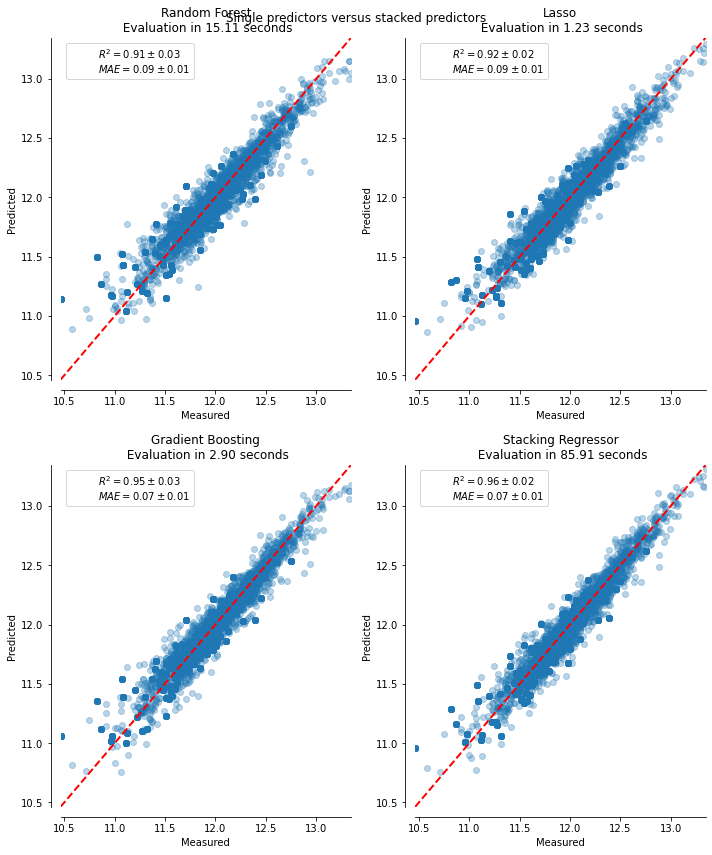

In [90]:
def plot_regression_results(ax, y_true, y_pred, title, scores, elapsed_time):
    """Scatter plot of the predicted vs true targets."""
    ax.plot(
        [y_true.min(), y_true.max()], [y_true.min(), y_true.max()], "--r", linewidth=2
    )
    ax.scatter(y_true, y_pred, alpha=0.3)

    ax.spines["top"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()
    ax.spines["left"].set_position(("outward", 10))
    ax.spines["bottom"].set_position(("outward", 10))
    ax.set_xlim([y_true.min(), y_true.max()])
    ax.set_ylim([y_true.min(), y_true.max()])
    ax.set_xlabel("Measured")
    ax.set_ylabel("Predicted")
    extra = plt.Rectangle(
        (0, 0), 0, 0, fc="w", fill=False, edgecolor="none", linewidth=0
    )
    ax.legend([extra], [scores], loc="upper left")
    title = title + "\n Evaluation in {:.2f} seconds".format(elapsed_time)
    ax.set_title(title)


fig, axs = plt.subplots(2, 2, figsize=(10, 12))
axs = np.ravel(axs)

for ax, (name, est) in zip(
    axs, estimators + [("Stacking Regressor", stacking_regressor)]
):
    start_time = time.time()
    score = cross_validate(
        est, X, y, scoring=["r2", "neg_mean_absolute_error"], n_jobs=2, verbose=1
    )
    elapsed_time = time.time() - start_time

    y_pred = cross_val_predict(est, X, y, n_jobs=2, verbose=0)

    plot_regression_results(
        ax,
        y,
        y_pred,
        name,
        (r"$R^2={:.2f} \pm {:.2f}$" + "\n" + r"$MAE={:.2f} \pm {:.2f}$").format(
            np.max(score["test_r2"]),
            np.std(score["test_r2"]),
            -np.max(score["test_neg_mean_absolute_error"]),
            np.std(score["test_neg_mean_absolute_error"]),
        ),
        elapsed_time,
    )

plt.suptitle("Single predictors versus stacked predictors")
plt.tight_layout()
plt.subplots_adjust(top=0.95)
plt.show()

In [77]:
## Load models
import pickle

with open("Pickle_SVR.pkl" , 'rb') as file:  
     svm = pickle.load(file)
        
with open("scaler.pkl" , 'rb') as file:  
     sc = pickle.load(file)

/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator SVR from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator GridSearchCV from version 0.24.1 when using version 1.0.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/modules/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/Users/maejok/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:329: UserWarning: Trying to unpickle estimator StandardScaler from version 0.24.1 when using version 1.0.2. This might lead to breaking

In [78]:
scores = pd.DataFrame()
scores['scores'] = [lasso_score, rand_score, xg_score]
scores['rmse'] = [lasso_rmse, rand_rmse, xg_rmse]
scores['model']= ['Lasso','RandomForest','XGBoost']
scores

,scores,rmse,model
0,0.940294,0.099092,Lasso
1,0.975008,0.025757,RandomForest
2,0.978867,0.062855,XGBoost


(0.9, 0.99)

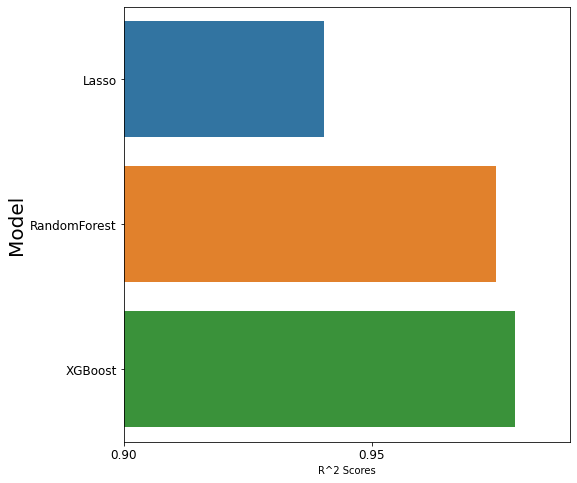

In [88]:
plt.figure(figsize=(8,8))

b = sns.barplot(y = scores['model'], x = scores['scores'])

b.set_xlabel("R^2 Scores")
b.set_ylabel("Model",fontsize = 20)
b.tick_params(labelsize = 12)
b.set_xticks([0.8,0.9, 0.95])
b.set_xlim(0.9,0.99)

# plt.savefig('./Figures/model_scores', bbox_inches = 'tight', dpi=350)


In [83]:
scores["rmse"]

0    0.099092
1    0.025757
2    0.062855
Name: rmse, dtype: float64

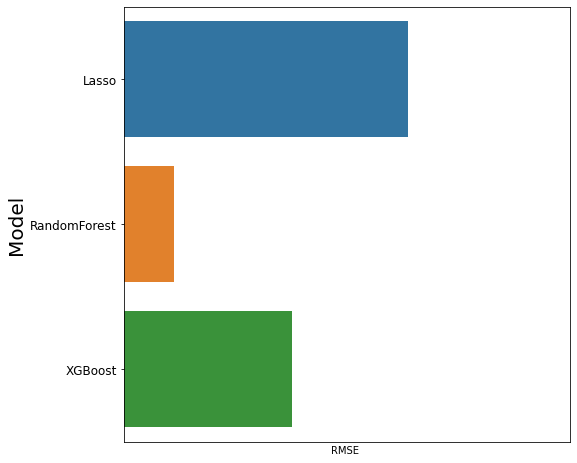

In [87]:
plt.figure(figsize=(8,8))

b = sns.barplot(y = scores['model'], x = scores['rmse'])

b.set_xlabel("RMSE ")
b.set_ylabel("Model",fontsize = 20)
b.tick_params(labelsize = 12)
b.set_xticks([6,6.5,7, 7.5, 8, 8.5, 9 ])
b.set_xlim(0.01,0.15)

plt.savefig('./Figures/model_rmse', bbox_inches = 'tight', dpi=350)
